In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/AI/SincNetSalimiFall2023/gait-in-parkinsons-disease-1.0.0

/content/drive/.shortcut-targets-by-id/1W80QmWSrr3gQsyatQQqoJnWS3-nlwn--/SincNetSalimiFall2023/gait-in-parkinsons-disease-1.0.0


In [ ]:
!pip install sincnet_tensorflow

  Preparing metadata (setup.py) ... done
  Created wheel for sincnet_tensorflow: filename=sincnet_tensorflow-0.0.2-py3-none-any.whl size=5405 sha256=abfa6cc0c15eccbd36bffbc7596edfaf30f95c5df924801ce236a7f7f92d8920
  Stored in directory: /root/.cache/pip/wheels/5b/33/d4/e06720531a144468feaef52783cc61e732bba7405780623fb3
Successfully built sincnet_tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D,Dropout
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Flatten, MaxPooling1D, Input,Concatenate
from tensorflow.keras.utils import plot_model
from sincnet_tensorflow import SincConv1D, LayerNorm
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib.font_manager import FontProperties

In [ ]:
font_path = 'times new roman bold.ttf'
font_prop = FontProperties(fname=font_path, size=14)

###Loading all of the models we,ve trained (in the rest of the code) so we don't have to retrain it again!

In [ ]:
recall=tf.keras.metrics.Recall()
precision=tf.keras.metrics.Precision()
model2=load_model("sicnet_old")
new_model=load_model("sicnet_new")
model_sevirity=load_model("model_sevirity")
model_sevirity_new=load_model("model_sevirity_new")

### Loading Dataset and Preprocessing


In [ ]:
files = os.listdir()

In [ ]:
exclude_files = {'gaitpd.png',
                 'demographics.html',
                 'demographics.xls',
                 'demographics.txt',
                 'format.txt',
                 'model_plot.png',
                 'model.png',
                 'new_model.png',
                 'SHA256SUMS.txt',
                 'sicnetmahan',
                 'sicnet_new1',
                 'sinc_conv1d_centroids.npy',
                 'sinc_conv1d_centroids_sevirity',
                 'sinc_conv1d_centroids_sevirity.npy',
                'sinc_conv1d_1_centroids.npy',
                'sinc_conv1d_2_centroids.npy',
                'sinc_conv1d_3_centroids.npy',
                'sinc_conv1d_4_centroids.npy',
                'sinc_conv1d_5_centroids.npy',
                'sinc_conv1d_6_centroids.npy',
                'sinc_conv1d_7_centroids.npy',
                'model_sevirity',"sicnet_old",
                'sicnet_new',
                "sicnet_old_1",
                'sicnet_old_for_mahan'
                'sinc_conv1d_centroids_sevirity.npy',
                'sinc_conv1d_1_centroids_sevirity.npy',
                'sinc_conv1d_2_centroids_sevirity.npy',
                'sinc_conv1d_3_centroids_sevirity.npy',
                'sinc_conv1d_4_centroids_sevirity.npy',
                'sinc_conv1d_5_centroids_sevirity.npy',
                'sinc_conv1d_6_centroids_sevirity.npy',
                'sinc_conv1d_7_centroids_sevirity.npy',
                'model_sevirity_new',
                'out_filters.jpg',
                'out_filters.jpg',
                 'sicnet_old_for_mahan',
                 'times new roman bold.ttf',
                 'images','label_distribution.pdf','my_history.npy',
 'Left_VGRF1_plot.pdf',
 'Left_VGRF1-Right_VGRF1.pdf','train.pdf','Left Gait Cycle.pdf',
 'Right Gait Cycle.pdf'}
raw_data = [file for file in files if file not in exclude_files]


In [ ]:
raw_data

['GaPt15_10.txt',
 'JuCo06_01.txt',
 'JuPt01_05.txt',
 'GaCo08_01.txt',
 'JuPt28_05.txt',
 'JuPt03_05.txt',
 'JuPt03_04.txt',
 'GaPt14_10.txt',
 'JuPt24_01.txt',
 'GaPt28_10.txt',
 'GaPt24_10.txt',
 'SiCo22_01.txt',
 'SiCo11_01.txt',
 'GaCo09_02.txt',
 'GaPt20_02.txt',
 'JuCo19_01.txt',
 'GaPt08_02.txt',
 'GaPt26_02.txt',
 'JuPt03_01.txt',
 'SiCo16_01.txt',
 'JuPt29_03.txt',
 'JuPt28_04.txt',
 'SiPt14_01.txt',
 'JuPt06_03.txt',
 'SiPt29_01.txt',
 'SiCo28_01.txt',
 'JuCo04_01.txt',
 'SiPt20_01.txt',
 'GaPt20_10.txt',
 'GaPt31_02.txt',
 'SiCo01_01.txt',
 'SiPt38_01.txt',
 'SiPt18_01.txt',
 'JuPt23_07.txt',
 'JuPt28_03.txt',
 'JuPt03_07.txt',
 'SiCo24_01.txt',
 'JuCo24_01.txt',
 'JuPt04_01.txt',
 'GaCo13_01.txt',
 'JuPt29_05.txt',
 'JuPt06_04.txt',
 'SiCo03_01.txt',
 'SiCo04_01.txt',
 'GaCo13_02.txt',
 'GaPt09_02.txt',
 'JuPt20_05.txt',
 'GaPt19_01.txt',
 'JuPt17_01.txt',
 'JuPt15_02.txt',
 'GaPt23_10.txt',
 'JuPt09_01.txt',
 'JuPt28_01.txt',
 'GaCo01_01.txt',
 'GaPt32_01.txt',
 'JuPt11_0

In [ ]:
len(raw_data)

306

In [ ]:
col_names=['Time', 'Left_VGRF1', 'Left_VGRF2', 'Left_VGRF3', 'Left_VGRF4', 'Left_VGRF5', 'Left_VGRF6', 'Left_VGRF7',
              'Left_VGRF8', 'Right_VGRF1', 'Right_VGRF2', 'Right_VGRF3', 'Right_VGRF4', 'Right_VGRF5', 'Right_VGRF6',
              'Right_VGRF7', 'Right_VGRF8', 'Force_Left', 'Force_Right']

In [ ]:
data_frames = {}
for file in raw_data:
    data_frames[file] = pd.read_csv(file, sep='\t', header=None, encoding='utf-8', names=col_names)
    # Extract label from the file name
    label = 0 if 'co' in file.lower() else 1 if 'pt' in file.lower() else None
    # Add a new column 'label' to the DataFrame with the extracted label
    data_frames[file]['label'] = label

In [ ]:
data_frames['SiCo18_01.txt']

Time  Left_VGRF1  Left_VGRF2  Left_VGRF3  Left_VGRF4  Left_VGRF5  \
0        0.0000       10.23       64.90       31.68       60.83       29.26   
1        0.0100       10.23       64.90       31.68       60.83       29.26   
2        0.0200       10.23       64.90       30.36       63.69       29.26   
3        0.0300       10.23       66.55       30.36       66.55       27.83   
4        0.0400       10.23       66.55       28.93       69.41       27.83   
...         ...         ...         ...         ...         ...         ...   
12114  121.1315        0.00        0.00        0.00        0.00        0.00   
12115  121.1415        0.00        0.00        0.00        0.00        0.00   
12116  121.1515        0.00        0.00        0.00        0.00        0.00   
12117  121.1615        8.58        0.00        0.00        0.00        0.00   
12118  121.1715       58.52        0.00        0.00        0.00        0.00   

       Left_VGRF6  Left_VGRF7  Left_VGRF8  Right_VGRF1  Right_VGRF2  \
0           20.90       37.62        5.50        76.67       220.00   
1           20.90       37.62        5.50        76.67       220.00   
2           23.54       36.19        5.50        74.03       218.35   
3           23.54       36.19        6.82        72.60       216.59   
4           23.54       33.22        6.82        72.60       214.94   
...           ...         ...         ...          ...          ...   
12114        0.00        0.00        0.00         0.00         8.25   
12115        0.00        0.00        0.00         0.00         8.25   
12116        0.00        0.00        0.00         0.00         8.25   
12117        0.00        0.00        0.00         0.00         6.60   
12118        0.00        0.00        0.00         0.00         6.60   

       Right_VGRF3  Right_VGRF4  Right_VGRF5  Right_VGRF6  Right_VGRF7  \
0            67.98         3.08         6.60         0.00         0.00   
1            67.98         3.08         6.60         0.00         0.00   
2            66.44         3.08         6.60         0.00         0.00   
3            69.52         3.08         6.60         0.00         0.00   
4            66.44         3.08         4.95         0.00         0.00   
...            ...          ...          ...          ...          ...   
12114         2.86       217.91        71.83       168.74       173.36   
12115         2.86       216.15        65.67       180.95       178.20   
12116         0.00       209.22        57.97       189.64       183.15   
12117         2.86       197.12        46.31       196.57       186.34   
12118         0.00       179.85        39.71       203.50       191.18   

       Right_VGRF8  Force_Left  Force_Right  label  
0             0.00      260.92       374.33      0  
1             0.00      260.92       374.33      0  
2             0.00      263.67       368.50      0  
3             0.00      268.07       368.39      0  
4             0.00      266.53       362.01      0  
...            ...         ...          ...    ...  
12114        33.66        0.00       676.61      0  
12115        36.63        0.00       688.71      0  
12116        39.60        0.00       687.83      0  
12117        49.83        8.58       685.63      0  
12118        58.74       58.52       679.58      0  

[12119 rows x 20 columns]

In [ ]:
data_frames['SiCo18_01.txt'].iloc[:, 1]

0        10.23
1        10.23
2        10.23
3        10.23
4        10.23
         ...  
12114     0.00
12115     0.00
12116     0.00
12117     8.58
12118    58.52
Name: Left_VGRF1, Length: 12119, dtype: float64

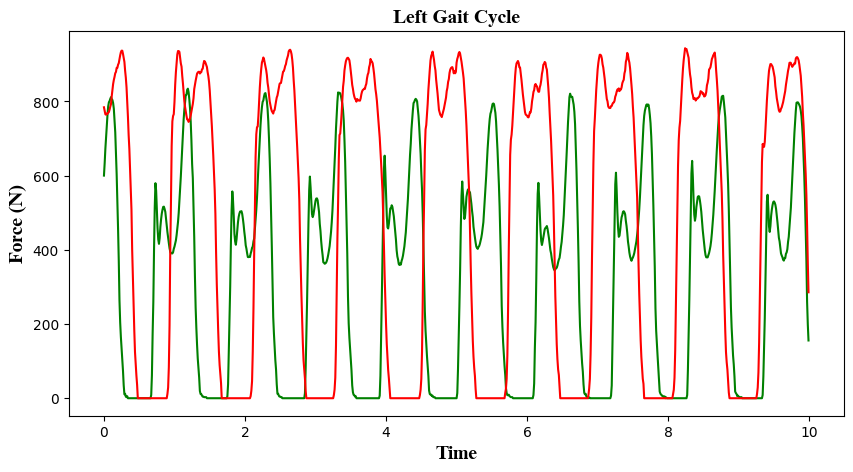

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(data_frames['SiCo18_01.txt'].iloc[:1000, 0],data_frames['SiCo18_01.txt'].iloc[1000:2000, 17],color='green')
plt.plot(data_frames['SiPt16_01.txt'].iloc[:1000, 0],data_frames['SiPt16_01.txt'].iloc[1000:2000, 17],color='red')
plt.xlabel('Time', fontproperties=font_prop)
plt.ylabel('Force (N)', fontproperties=font_prop)
plt.title('Left Gait Cycle', fontproperties=font_prop)
plt.savefig('Left Gait Cycle.pdf')


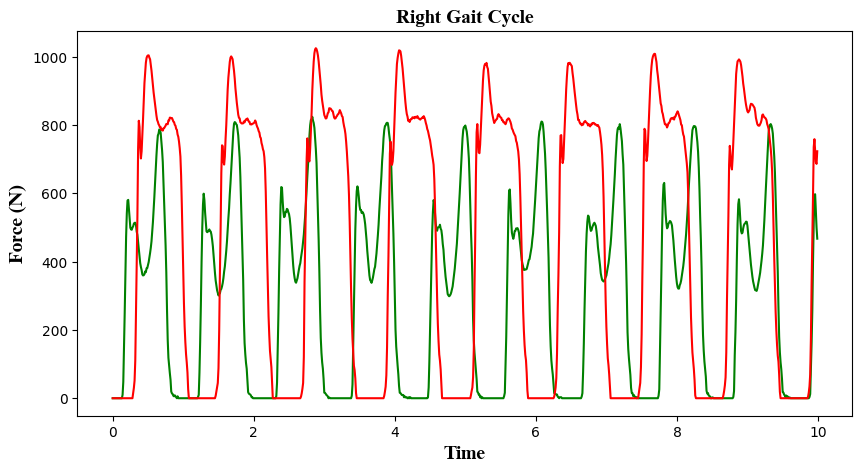

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(data_frames['SiCo18_01.txt'].iloc[:1000, 0],data_frames['SiCo18_01.txt'].iloc[1000:2000, 18],color='green')
plt.plot(data_frames['SiPt16_01.txt'].iloc[:1000, 0],data_frames['SiPt16_01.txt'].iloc[1000:2000, 18],color='red')
plt.xlabel('Time', fontproperties=font_prop)
plt.ylabel('Force (N)', fontproperties=font_prop)
plt.title('Right Gait Cycle', fontproperties=font_prop)
plt.savefig('Right Gait Cycle.pdf')


Text(0.5, 1.0, 'Left VGRF Sensor 1')

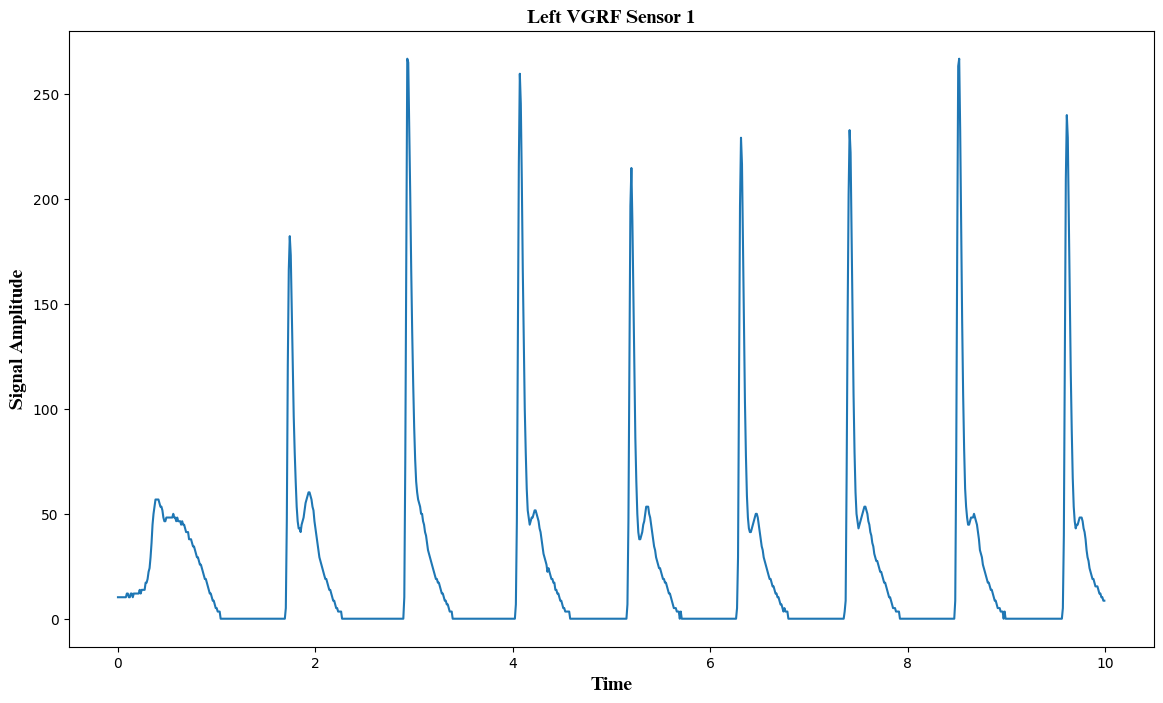

In [ ]:
plt.figure(figsize=(14, 8))

plt.plot(data_frames['SiCo18_01.txt'].iloc[:1000, 0],data_frames['SiCo18_01.txt'].iloc[:1000, 1])
plt.xlabel('Time', fontproperties=font_prop)
plt.ylabel('Signal Amplitude', fontproperties=font_prop)
plt.title('Left VGRF Sensor 1', fontproperties=font_prop)

In [ ]:
def split_dataframe(df, chunk_size=1000):
    return [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Split each DataFrame into chunks of 1000 rows
chunked_data_frames = {}
for file, df in data_frames.items():
    chunks = split_dataframe(df, chunk_size=1000)
    for i, chunk in enumerate(chunks):
        chunked_data_frames[f"{file}_chunk_{i + 1}"] = chunk


In [ ]:
filtered_data_frames = {}

# filtering
for key, chunk_df in chunked_data_frames.items():
    if chunk_df.shape == (1000, 20):
        filtered_data_frames[key] = chunk_df


result_array = np.empty((len(filtered_data_frames), *next(iter(filtered_data_frames.values())).shape), dtype=object)

# Iterate over the keys and values of chunked_data_frames
for i, (key, chunk_df) in enumerate(filtered_data_frames.items()):
    # Store the data in the numpy array
    result_array[i, ...] = chunk_df.values


# Print the shape of the resulting array
print(f"Shape of result_array: {result_array.shape}")


Shape of result_array: (3235, 1000, 20)


In [ ]:

# Example: Accessing the first chunk of the first file
first_chunk_of_first_file = result_array[0]
# first_chunk_of_first_file

In [ ]:
Left_VGRF1 = first_chunk_of_first_file[:,1]
time = first_chunk_of_first_file[:,0]


In [ ]:
# cd images

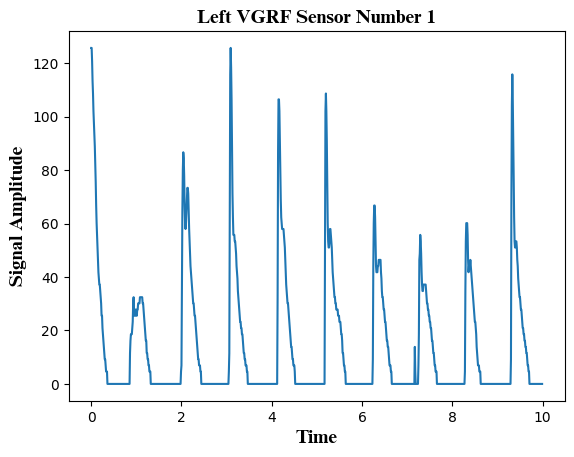

In [ ]:
plt.plot(time, Left_VGRF1)
plt.xlabel('Time', fontproperties=font_prop)
plt.ylabel('Signal Amplitude', fontproperties=font_prop)
plt.title('Left VGRF Sensor Number 1', fontproperties=font_prop)
plt.savefig('Left_VGRF1_plot.pdf')

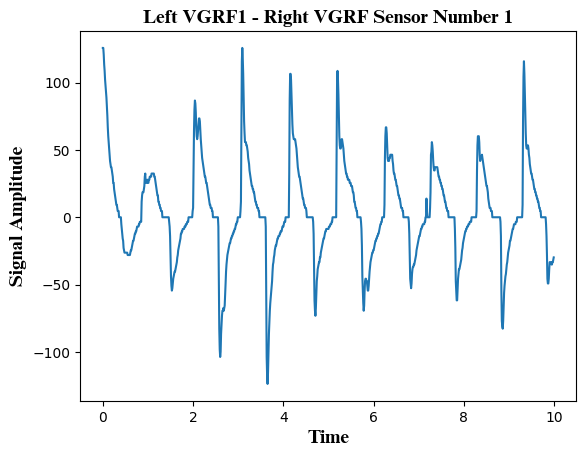

In [ ]:
Right_VGRF1 = first_chunk_of_first_file[:,9]
diffrence=Left_VGRF1-Right_VGRF1
plt.plot(time,diffrence)
plt.xlabel('Time', fontproperties=font_prop)
plt.ylabel('Signal Amplitude', fontproperties=font_prop)
plt.title('Left VGRF1 - Right VGRF Sensor Number 1', fontproperties=font_prop)
plt.savefig('Left_VGRF1-Right_VGRF1.pdf')

so let's create an array of the difference of each one

In [ ]:
left_minus_right = np.empty((len(filtered_data_frames), 1000,9),dtype=object)
for i in range(len(result_array)):
  for j in range(1, 9):
        Left_VGRF = result_array[i][:,j]
        Right_VGRF = result_array[i][:,j+8]
        diffrence=Left_VGRF - Right_VGRF
        left_minus_right[i][:,j-1]=diffrence
  left_minus_right[i][:,8]=result_array[i][:,19]
print(left_minus_right.shape)


(3235, 1000, 9)


so let's start the process of spliting

In [ ]:

# first exclude the label from the data
X = left_minus_right[:, :,:8]
y = left_minus_right[:, :,8]


In [ ]:
temp_y = np.empty((y.shape[0]))

In [ ]:

for i in range(y.shape[0]):
      temp_y[i] = y[i][0]

y = temp_y

balancing 0 and 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # uncomment if needed

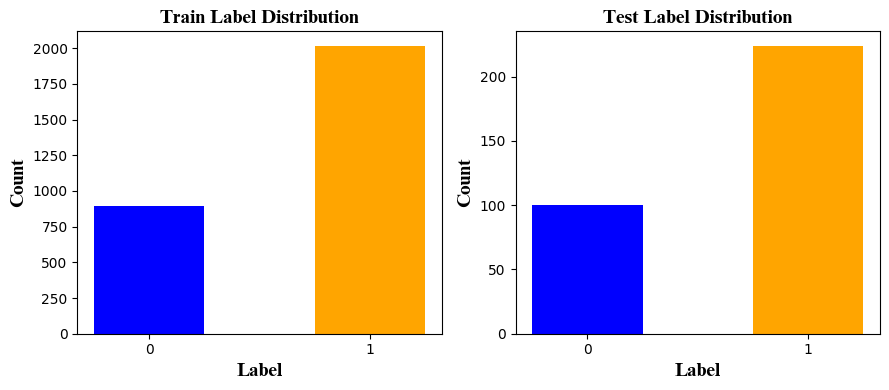

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_test are your label arrays
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

train_label_counts = np.bincount(y_train_int)
test_label_counts = np.bincount(y_test_int)

# Plotting histograms for visualization
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Adjusting xticks to be discrete
xticks = np.arange(2)  # Discrete ticks for 0 and 1
bar_width = 0.5  # Adjust the width of the bars

axs[0].bar(np.unique(y_train_int), train_label_counts, color=['blue', 'orange'], width=bar_width)
axs[0].set_title('Train Label Distribution', fontproperties=font_prop)
axs[0].set_xlabel('Label', fontproperties=font_prop)
axs[0].set_ylabel('Count', fontproperties=font_prop)
axs[0].set_xticks(xticks)
axs[0].set_xticklabels(['0', '1'])

axs[1].bar(np.unique(y_test_int), test_label_counts, color=['blue', 'orange'], width=bar_width)
axs[1].set_title('Test Label Distribution', fontproperties=font_prop)
axs[1].set_xlabel('Label', fontproperties=font_prop)
axs[1].set_ylabel('Count', fontproperties=font_prop)
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(['0', '1'])

plt.savefig('label_distribution.pdf')
plt.tight_layout()
plt.show()


In [ ]:
y_train=y_train.reshape((y_train.shape[0],1))
y_train.shape


(2911, 1)

In [ ]:
new_array = np.transpose(X_train, (0, 2, 1))
new_array=new_array.reshape((X_train.shape[0], 8000))

In [ ]:
X_train = np.asarray(new_array).astype('float32')
y_train = np.asarray(y_train).astype('float32')
print(X_train.shape)

(2911, 8000)


In [ ]:
def normalize_array(x):
    """
    Normalize a NumPy array using the formula:
    xn(t) = (x(t) - mean(x(t))) / std(x(t))

    Parameters:
    - x: NumPy array

    Returns:
    - Normalized array
    """
    mean_value = np.mean(x)
    std_value = np.std(x)

    normalized_array = (x - mean_value) / std_value

    return normalized_array

In [ ]:
X_train=normalize_array(X_train)

In [ ]:
test_reshaped = np.transpose(X_test, (0, 2, 1))
test_reshaped=test_reshaped.reshape((324, 8000))
X_test = np.asarray(test_reshaped).astype('float32')
print(X_test.shape)

(324, 8000)


In [ ]:
X_test=normalize_array(X_test)


### First Model

In [ ]:
#model 2 from sincNet atricle



out_dim = 2 #number of classes

inputs = Input((8000,1))
split_tensors = tf.split(inputs, num_or_size_splits=8, axis=1)
list_of_sincs=[]
for i in split_tensors:
  x = SincConv1D(N_filt=100,
                        Filt_dim=101,
                        fs=100, #freq
                        stride=5, #16,
                        padding="SAME")(i)
  x = LayerNorm()(x)
  # x = BatchNormalization(momentum=0.05)(x)
  x = LeakyReLU(alpha=0.2)(x)
  # x = Dropout(rate=0.5)(x)
  x = MaxPooling1D(pool_size=2)(x)
  list_of_sincs.append(x)
x = Concatenate(axis=-1)(list_of_sincs)



x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(rate=0.5)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(256, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(rate=0.5)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)

x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

prediction = Dense(1, activation='sigmoid')(x)

model2 = tf.keras.models.Model(inputs=inputs, outputs=prediction)

model2.summary()
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!mkdir ../results

In [ ]:
plot_model(model2, to_file='../results/model_plot.pdf', show_shapes=False, show_layer_names=False, rankdir='LR')

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy",precision,recall])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

history2 = model2.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2
                    ,callbacks=[early_stopping])

Epoch 1/4000
73/73 [==============================] - 28s 91ms/step - loss: 26.3354 - accuracy: 0.6263 - precision: 0.7029 - recall: 0.7843 - val_loss: 7.9099 - val_accuracy: 0.7376 - val_precision: 0.7615 - val_recall: 0.9344
Epoch 2/4000
73/73 [==============================] - 3s 42ms/step - loss: 4.7440 - accuracy: 0.7242 - precision: 0.7759 - recall: 0.8384 - val_loss: 2.5340 - val_accuracy: 0.7925 - val_precision: 0.7854 - val_recall: 0.9859
Epoch 3/4000
73/73 [==============================] - 3s 45ms/step - loss: 1.9345 - accuracy: 0.8028 - precision: 0.8400 - recall: 0.8786 - val_loss: 1.4458 - val_accuracy: 0.7822 - val_precision: 0.7727 - val_recall: 0.9953
Epoch 4/4000
73/73 [==============================] - 5s 69ms/step - loss: 1.1274 - accuracy: 0.8389 - precision: 0.8698 - recall: 0.8987 - val_loss: 1.2730 - val_accuracy: 0.8027 - val_precision: 0.7889 - val_recall: 0.9977
Epoch 5/4000
73/73 [==============================] - 3s 44ms/step - loss: 0.9800 - accuracy: 0.83

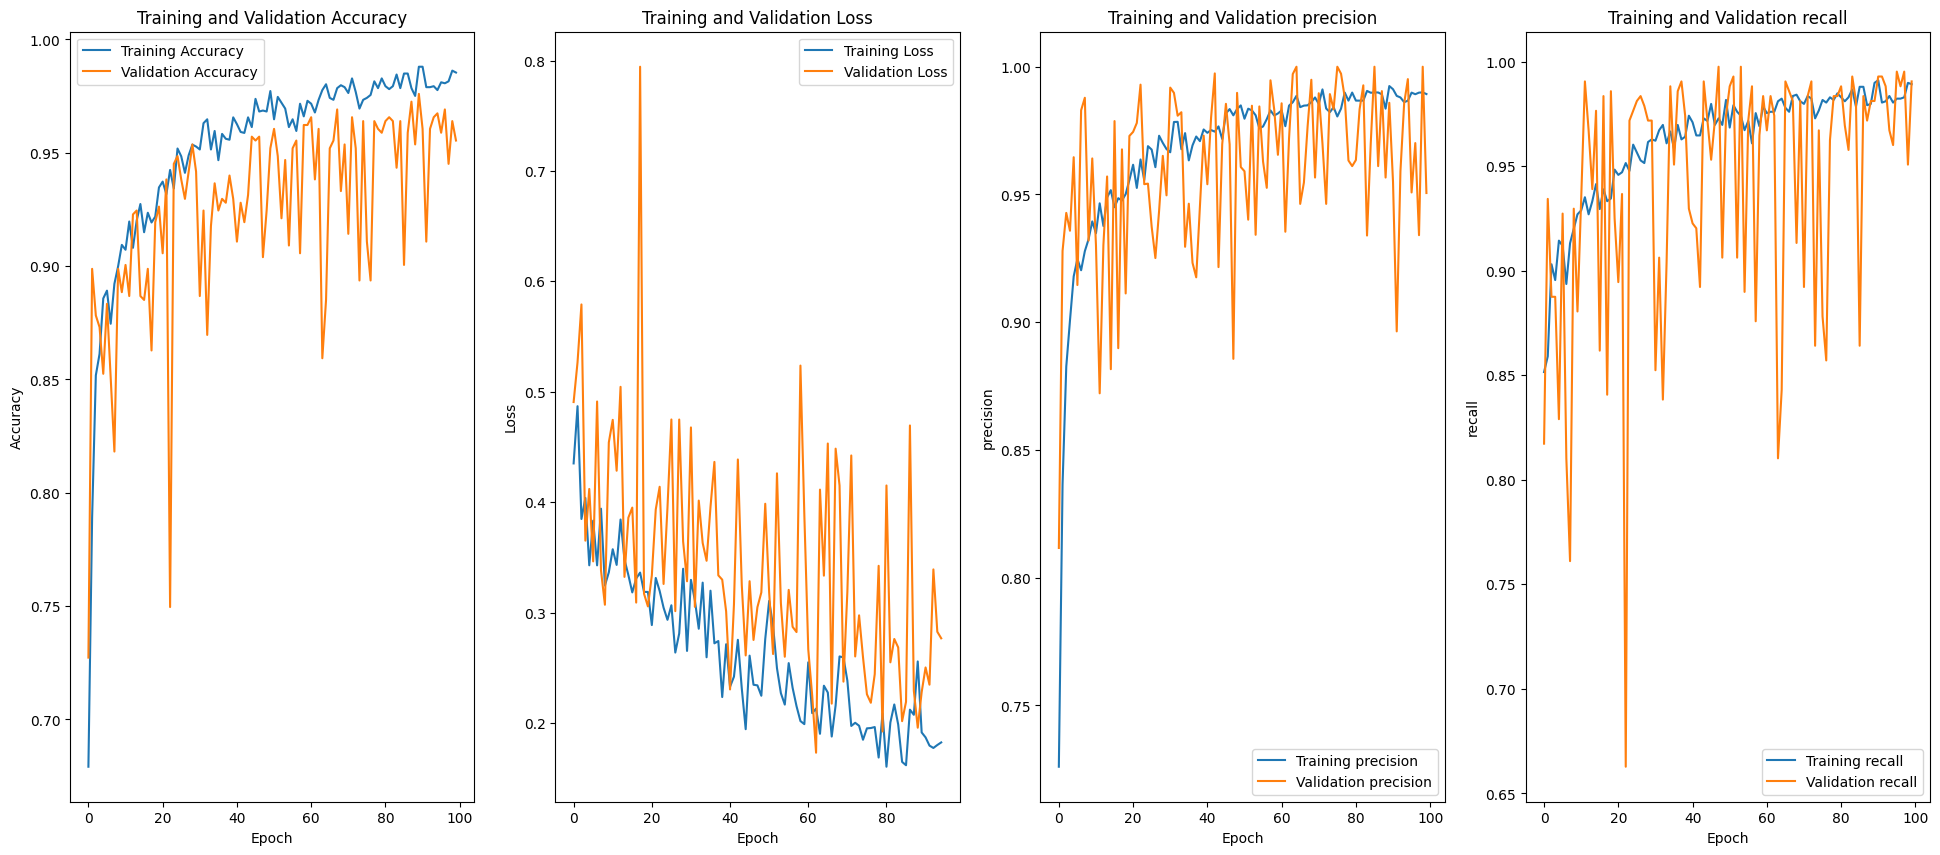

In [ ]:
plt.figure(figsize=(24, 10))

# Plot Training Accuracy 2
plt.subplot(1, 4, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 4, 2)
plt.plot(history2.history['loss'][5:], label='Training Loss')
plt.plot(history2.history['val_loss'][5:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(1, 4, 3)
plt.plot(history2.history['precision'], label='Training precision')
plt.plot(history2.history['val_precision'], label='Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.title('Training and Validation precision')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(history2.history['recall'], label='Training recall')
plt.plot(history2.history['val_recall'], label='Validation recall')
plt.xlabel('Epoch')
plt.ylabel('recall')
plt.title('Training and Validation recall')
plt.legend()

plt.show()

Model Eval

In [ ]:
# load
model2 = load_model('sicnet_old_for_mahan')

In [ ]:
predictions = model2.predict(X_test)


11/11 [==============================] - 2s 65ms/step


In [ ]:
# Convert the predictions to class labels (assuming binary classification)
predicted_labels = (predictions > 0.5).astype(int)

In [ ]:
y_test = y_test.astype(int)

In [ ]:
# Evaluate the model
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test, predicted_labels)
accuracy_result = accuracy.result().numpy()

# Print the accuracy
print(f"Accuracy on the test set: {accuracy_result}")

Accuracy on the test set: 0.9876543283462524


In [ ]:
results2 = model2.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", results2[0])
print("Test Accuracy:", results2[1])

11/11 [==============================] - 1s 70ms/step - loss: 0.1537 - accuracy: 0.9877 - precision: 0.9867 - recall: 0.9955
Test Loss: 0.15374848246574402
Test Accuracy: 0.9876543283462524


In [ ]:
results2

[0.10628394037485123,
 0.9845678806304932,
 0.9866666793823242,
 0.9910714030265808]

### Filter wights

let's first check the weights of the sinc layers.

tf.Tensor(
[0.21022366 0.5109711  0.5083105  0.5233501  0.598727   0.5052866
 0.5049744  0.5811434  0.5096542  0.5113008  0.5083928  0.5070342
 0.5073516  0.5094     0.5079055  0.5224477  0.54407686 0.5093995
 0.50030965 0.51954883 0.49331045 0.4814817  0.51241255 0.5248599
 0.5009912  0.47076598 0.6589281  0.46418405 0.4901972  0.50903916
 0.52447826 0.491466   0.5091727  0.5057655  0.50293916 0.5072497
 0.5071719  0.5094447  0.5077011  0.5077962  0.52449334 0.5086576
 0.509866   0.5004624  0.5093299  0.50729775 0.5199803  0.48288694
 0.52624255 0.49324852 0.5146142  0.4100521  0.52574754 0.5054573
 0.50738895 0.5090811  0.49243334 0.50160867 0.50679487 0.50712395
 0.5222138  0.5010777  0.49141383 0.5098215  0.49093693 0.49393222
 0.51333183 0.4917718  0.51085305 0.49383742 0.5779401  0.49298808
 0.5027941  0.50950605 0.49056742 0.49236763 0.5066585  0.5097645
 0.58454335 0.50914776 0.5090938  0.49206313 0.5084015  0.49234343
 0.63408387 0.5073015  0.49122205 0.49051628 0.491302   0.4

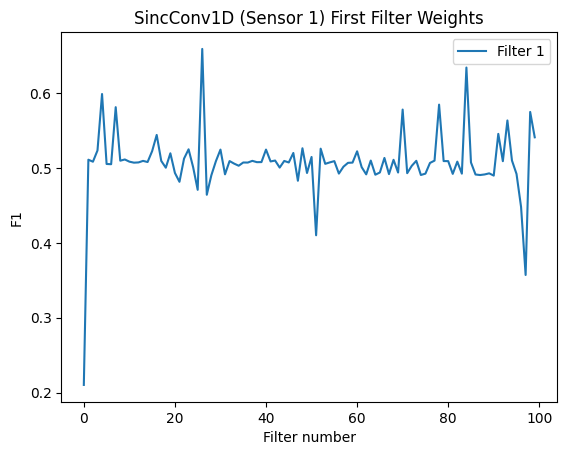

tf.Tensor(
[ 2.66269762e-02 -1.71441622e-02  3.43284011e-02 -2.21962318e-01
 -4.96385619e-03 -3.51230949e-01  2.00254649e-01 -3.42934668e-01
  9.63164587e-03 -2.18925998e-02  2.28962917e-02 -2.79265612e-01
  2.82377247e-02 -1.49173856e-01  3.49121314e-04  2.24395677e-01
  4.22661044e-02 -1.23969957e-01 -7.81556219e-03  3.54951054e-01
 -3.12422335e-01  2.84318686e-01  1.91669866e-01 -3.71539116e-01
 -3.15689365e-03 -3.40037912e-01 -3.49029042e-02 -4.40787107e-01
 -2.10157037e-02  9.30900313e-03 -3.97463590e-01  1.49998050e-02
  8.18223357e-02 -4.01891302e-03  2.78589517e-01 -7.40751438e-03
 -7.32034957e-03 -1.92729048e-02 -2.52648238e-02  1.81094632e-02
  2.31039286e-01  2.33867932e-02 -1.44435078e-01 -1.86500549e-02
  3.24150659e-02 -1.73423663e-02  4.81127024e-01  2.43938610e-01
 -5.13135374e-01 -2.30599985e-01 -5.76572958e-03  3.89883250e-01
 -3.08956683e-01  1.12403585e-02 -2.54307911e-02 -8.00406784e-02
  1.97170731e-02 -1.09286882e-01  8.96777213e-02  2.18999255e-02
  2.48533532e-

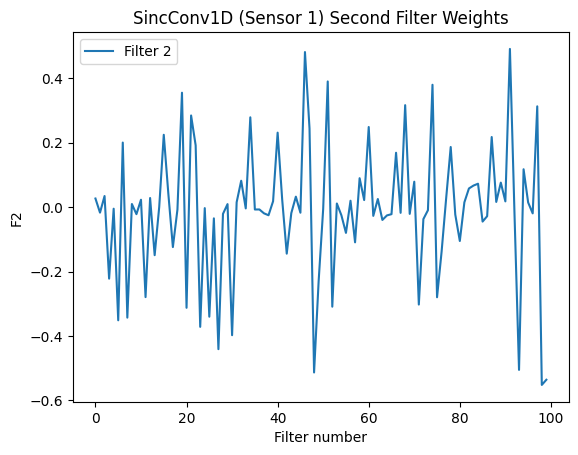

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already created the model (model2) as per your code

# Specify the name of the SincConv1D layer
sinc_conv_layer_name = 'sinc_conv1d'  # Replace with the actual name of your layer

# Access the SincConv1D layer by name
sinc_conv_layer = model2.get_layer(sinc_conv_layer_name)

# Get the filters' weights and biases
f1s = sinc_conv_layer.filt_b1
f2s = sinc_conv_layer.filt_band
# Visualize the weights of the filters
# num_filters = filters_weights.shape[2]
print(f1s[:, 0])
plt.plot(f1s[:, 0], label='Filter 1')
plt.title('SincConv1D (Sensor 1) First Filter Weights')
plt.xlabel('Filter number')
plt.ylabel('F1')
plt.legend()
plt.show()

print(f2s[:, 0])
plt.plot(f2s[:, 0], label='Filter 2')
plt.title('SincConv1D (Sensor 1) Second Filter Weights')
plt.xlabel('Filter number')
plt.ylabel('F2')
plt.legend()
plt.show()
# Visualize which filters are on
# filters_on = np.sum(filters_weights[:, 0, :] != 0, axis=1)

# print("Filters that are ON:")
# print(filters_on)


so you see that most of them are the same somehow

#  Clustered

here we try to decrease the number of filters of each sinc layer sensor

In [ ]:
def get_filter_data(model, layer_name):
  """Extracts `filt_b1` and `filt_band` values from a SincConv1D layer.

  Args:
    model: The Keras model containing the SincConv1D layer.
    layer_name: The name of the SincConv1D layer.

  Returns:
    A 2D numpy array where each row represents a filter (with values from `filt_b1` and `filt_band`).
  """
  layer = model.get_layer(layer_name)
  f1s = layer.filt_b1
  f2s = layer.filt_band
  return np.concatenate([f1s, f2s], axis=1)


trying to find the optimal for the first sensor

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

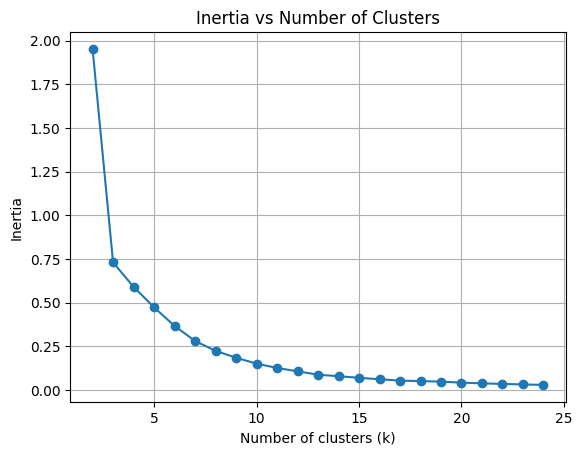

In [ ]:
# Extract filter data for the 'sinc_conv1d' layer
filter_data = get_filter_data(model2, 'sinc_conv1d')

# Calculate inertia for different values of k
def calculate_inertia(data, k_values):
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia = kmeans.inertia_
        inertias.append(inertia)
    return inertias

# Define range of k values to try
k_values = range(2, 25)

# Calculate inertia for each k value
inertias = calculate_inertia(filter_data, k_values)

# Plot inertia
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)
plt.show()

5 seems good in elbow method but for more precisement, we check it using silhouette

**finding the best k using silhouette**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

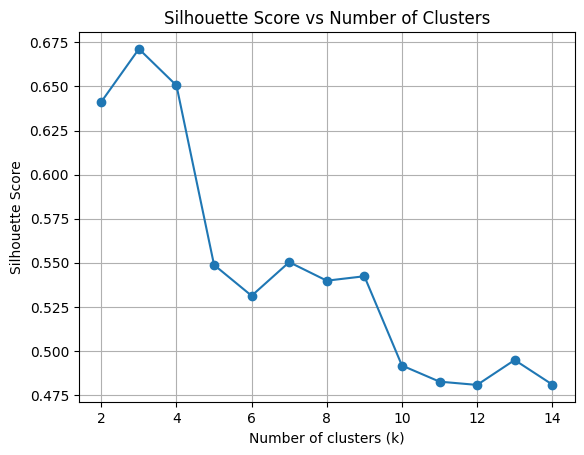

Optimal number of clusters (k) based on silhouette score: 3


In [ ]:
# Calculate silhouette scores for different values of k
def calculate_silhouette_scores(data, k_values):
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Define range of k values to try
k_values = range(2, 15)

# Calculate silhouette scores for each k value
silhouette_scores = calculate_silhouette_scores(filter_data, k_values)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Choose the optimal k value based on silhouette score
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (k) based on silhouette score:", optimal_k_silhouette)


so the optimal is just 3 filters for the first sensor (while it was 100 in the first model's structure!)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

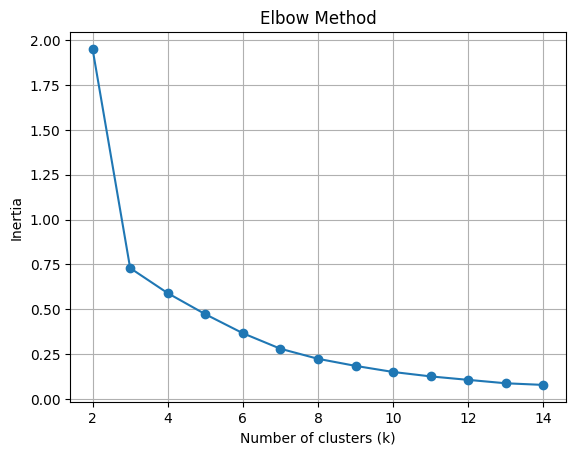

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
# to be run

def plot_elbow_method(data, k_values):
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia = kmeans.inertia_
        inertias.append(inertia)
    plt.plot(k_values, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()
# Define range of k values to try
k_values = range(2, 15)

# Plot the Elbow Method
plot_elbow_method(filter_data, k_values)

now let's try to find the optimal number for all of the sensors by visuling with silhouette

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Function to calculate silhouette scores for different values of k
def calculate_silhouette_scores(data, k_values):
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Suppress warning by setting n_init
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Function to plot silhouette diagrams for different values of k
def plot_silhouette_diagrams(data, k_values, layer_name):
    num_plots = len(k_values)
    num_cols = min(3, num_plots)  # Maximum 3 columns
    num_rows = (num_plots - 1) // num_cols + 1
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows))
    for i, k in enumerate(k_values):
        ax = axs[i // num_cols, i % num_cols] if num_plots > 1 else axs
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Suppress warning by setting n_init
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)
        y_lower = 10
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(data) + (k + 1) * 10])
        ax.set_title(f'Silhouette Plot for k={k}')
        ax.set_xlabel("Silhouette coefficient")
        ax.set_ylabel("Cluster label")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        for j in range(k):
            cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
            cluster_silhouette_values.sort()
            size_cluster_j = cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            color = plt.cm.tab10(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
            y_lower = y_upper + 10
    plt.suptitle(f"Silhouette Plot for Layer {layer_name}")
    plt.tight_layout()
    plt.show()




so this way we can visually be confident about what number of k is the best choise

Optimal number of clusters (k) for layer sinc_conv1d: 3


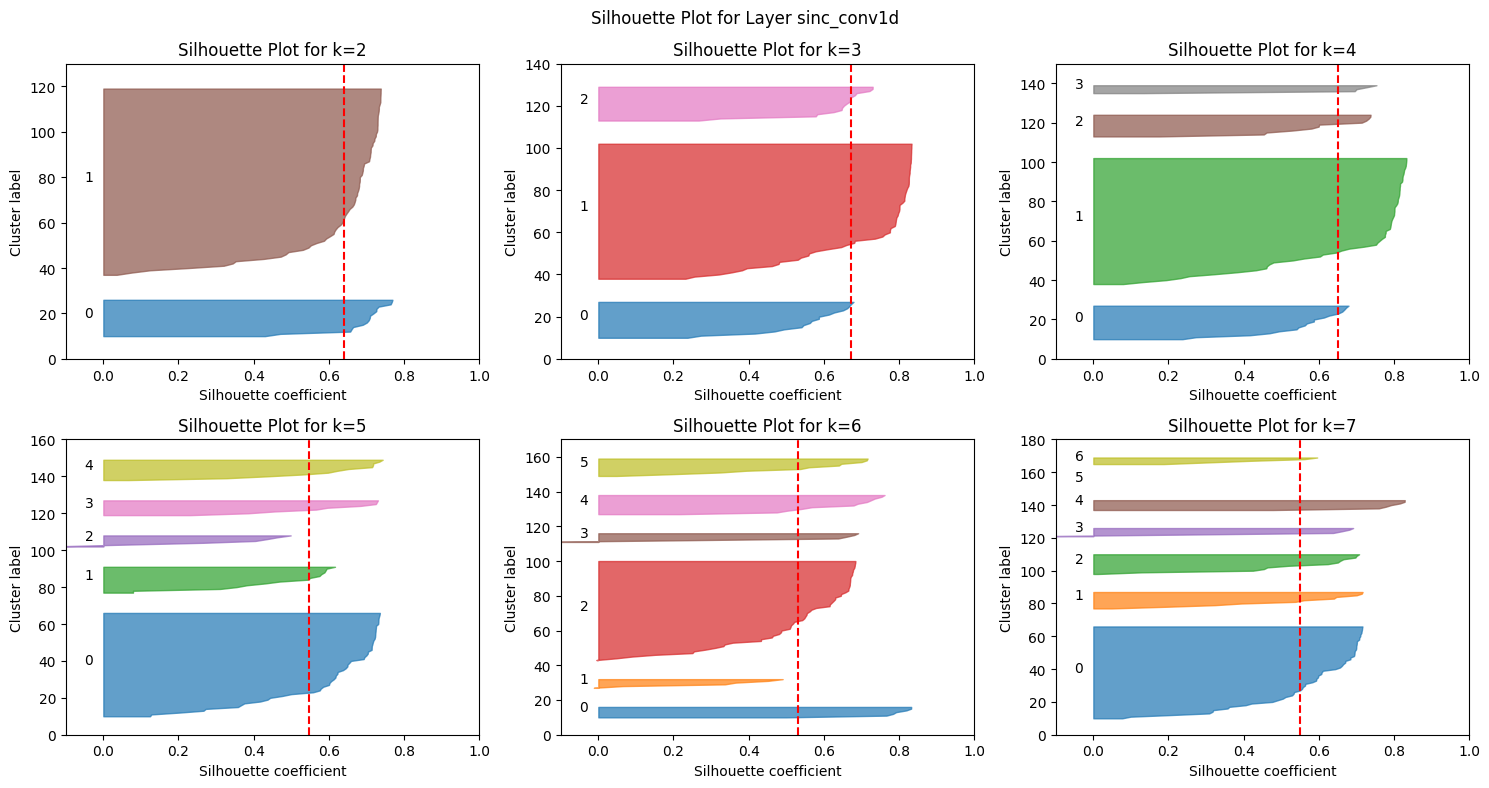

Optimal number of clusters (k) for layer sinc_conv1d_1: 4


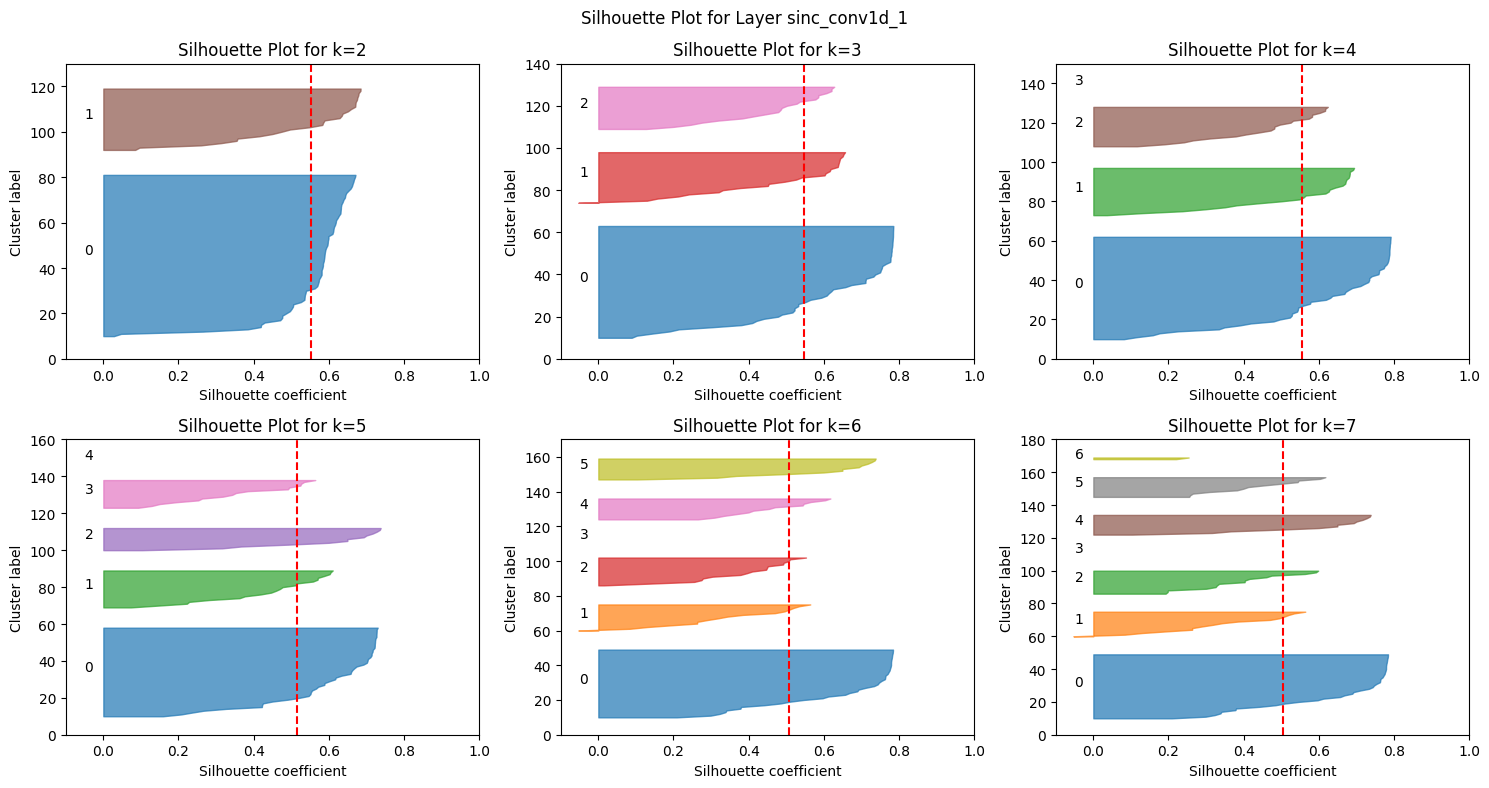

Optimal number of clusters (k) for layer sinc_conv1d_2: 3


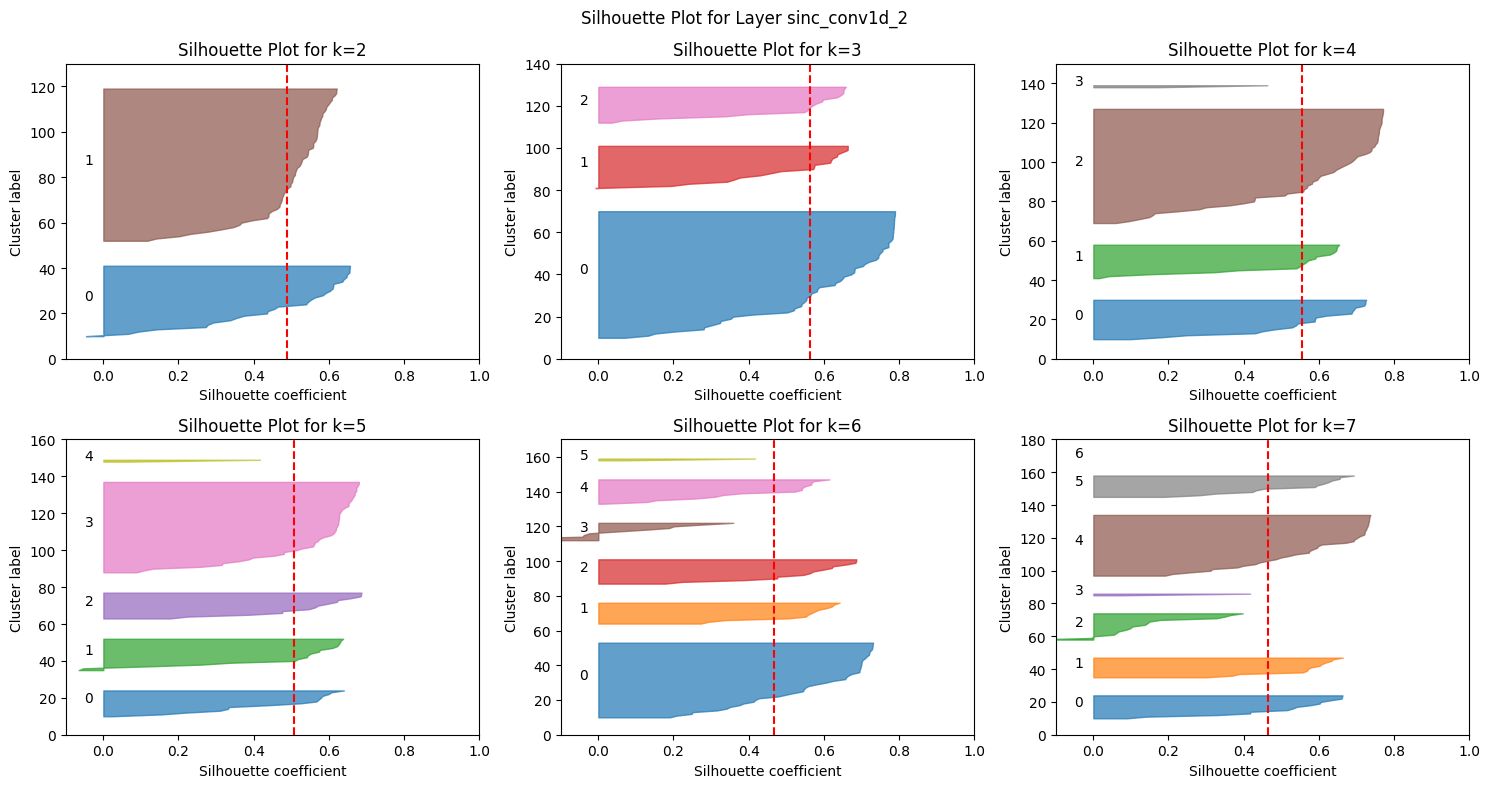

Optimal number of clusters (k) for layer sinc_conv1d_3: 4


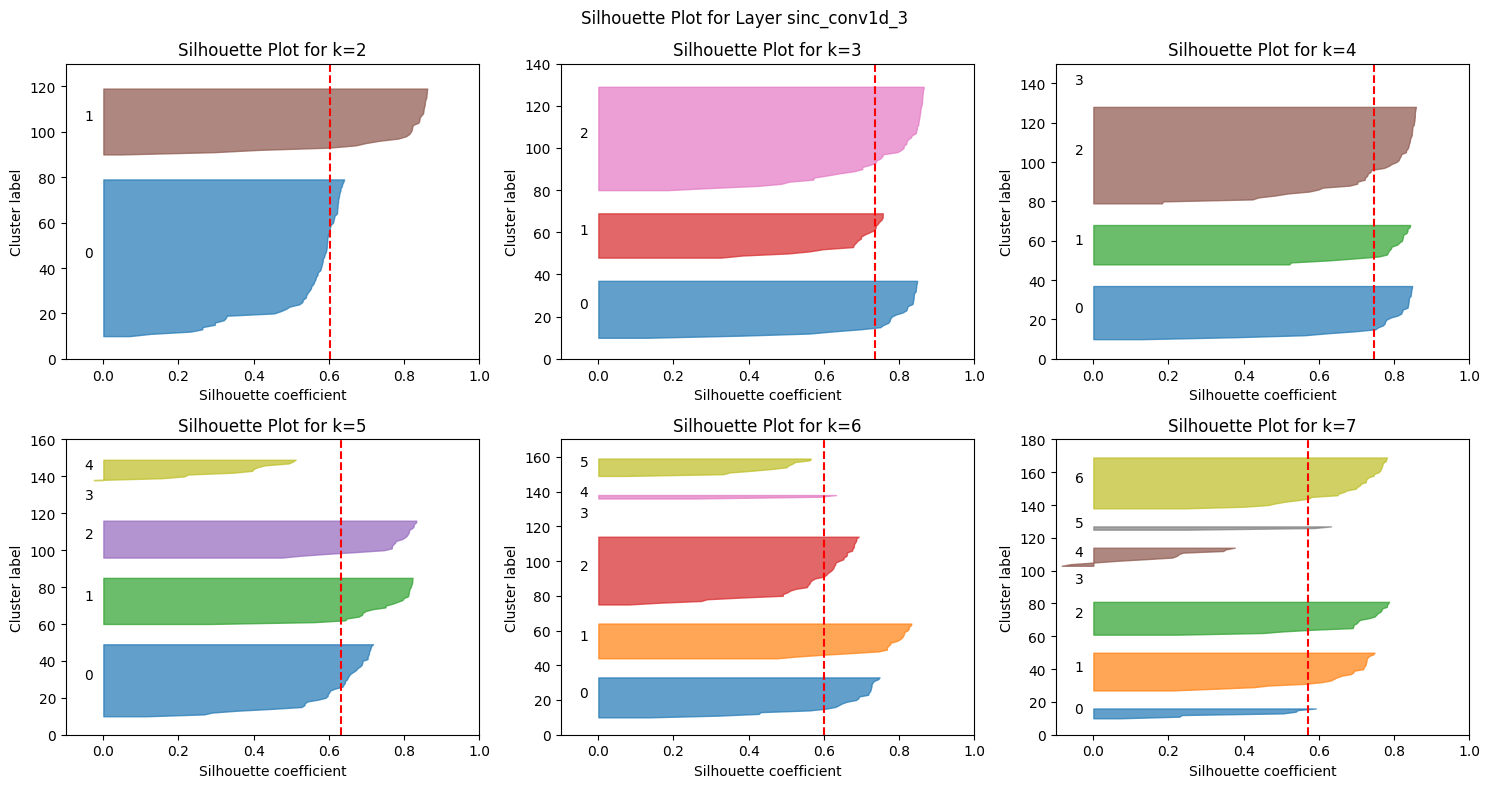

Optimal number of clusters (k) for layer sinc_conv1d_4: 3


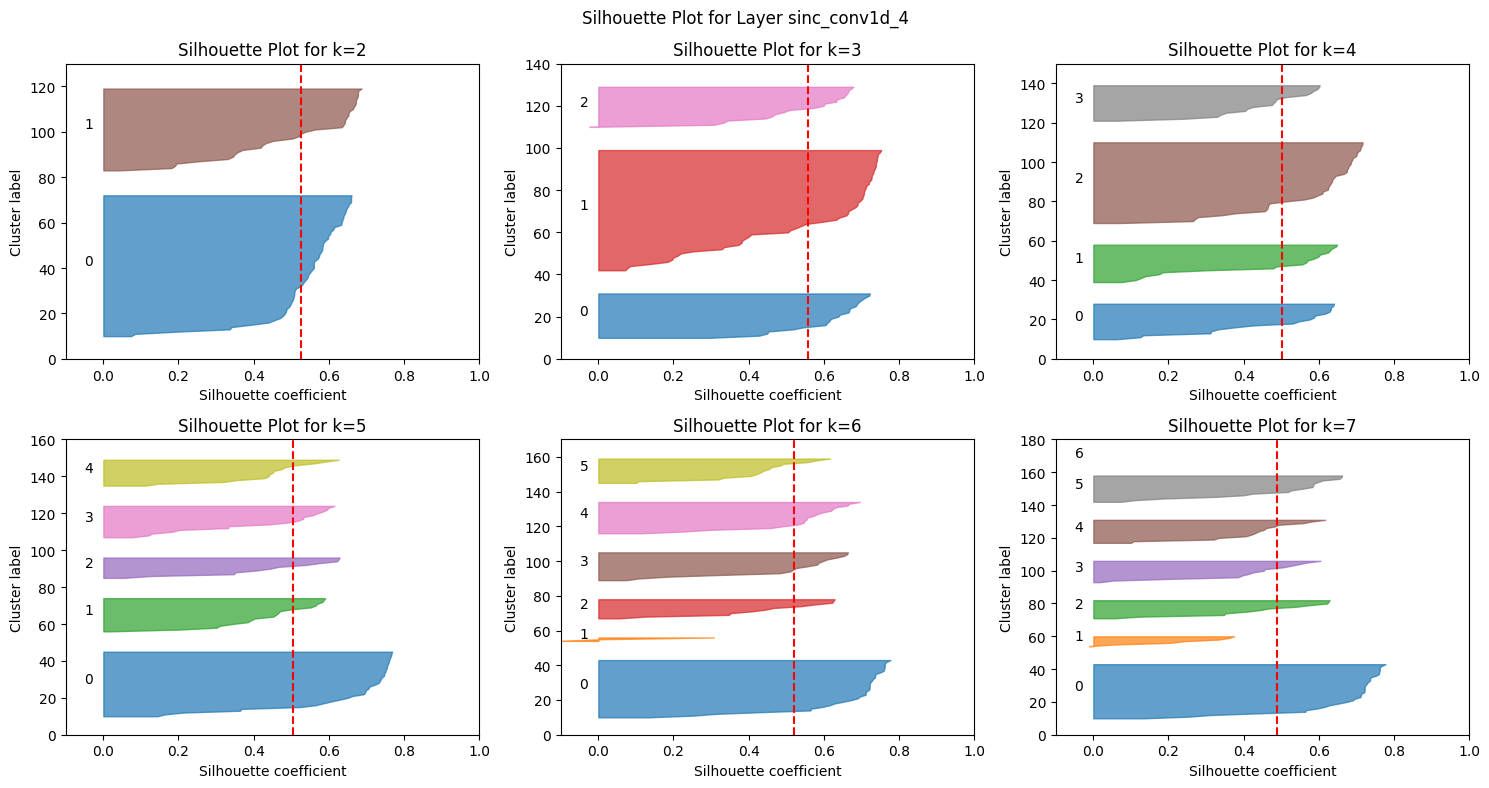

Optimal number of clusters (k) for layer sinc_conv1d_5: 6


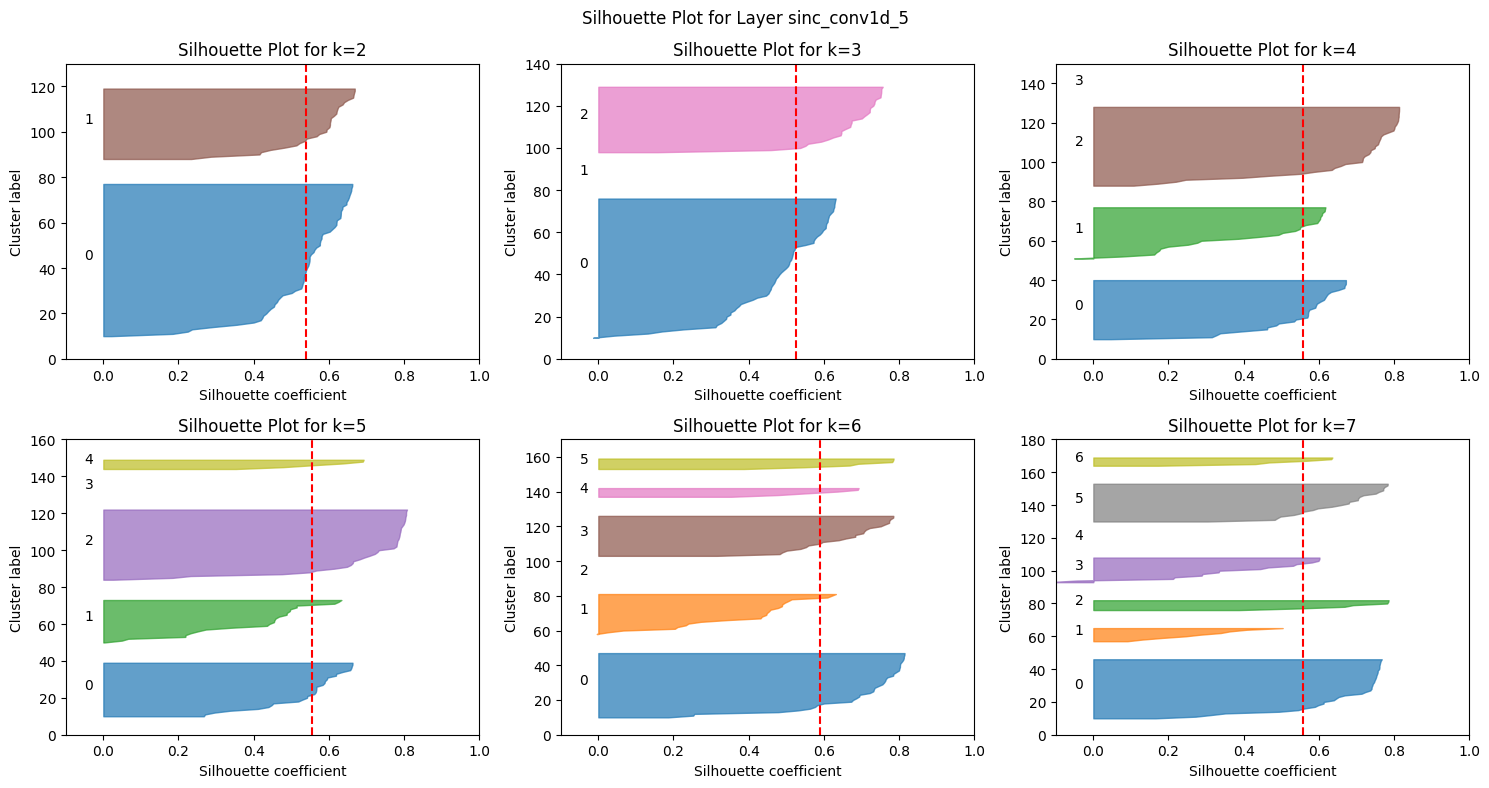

Optimal number of clusters (k) for layer sinc_conv1d_6: 3


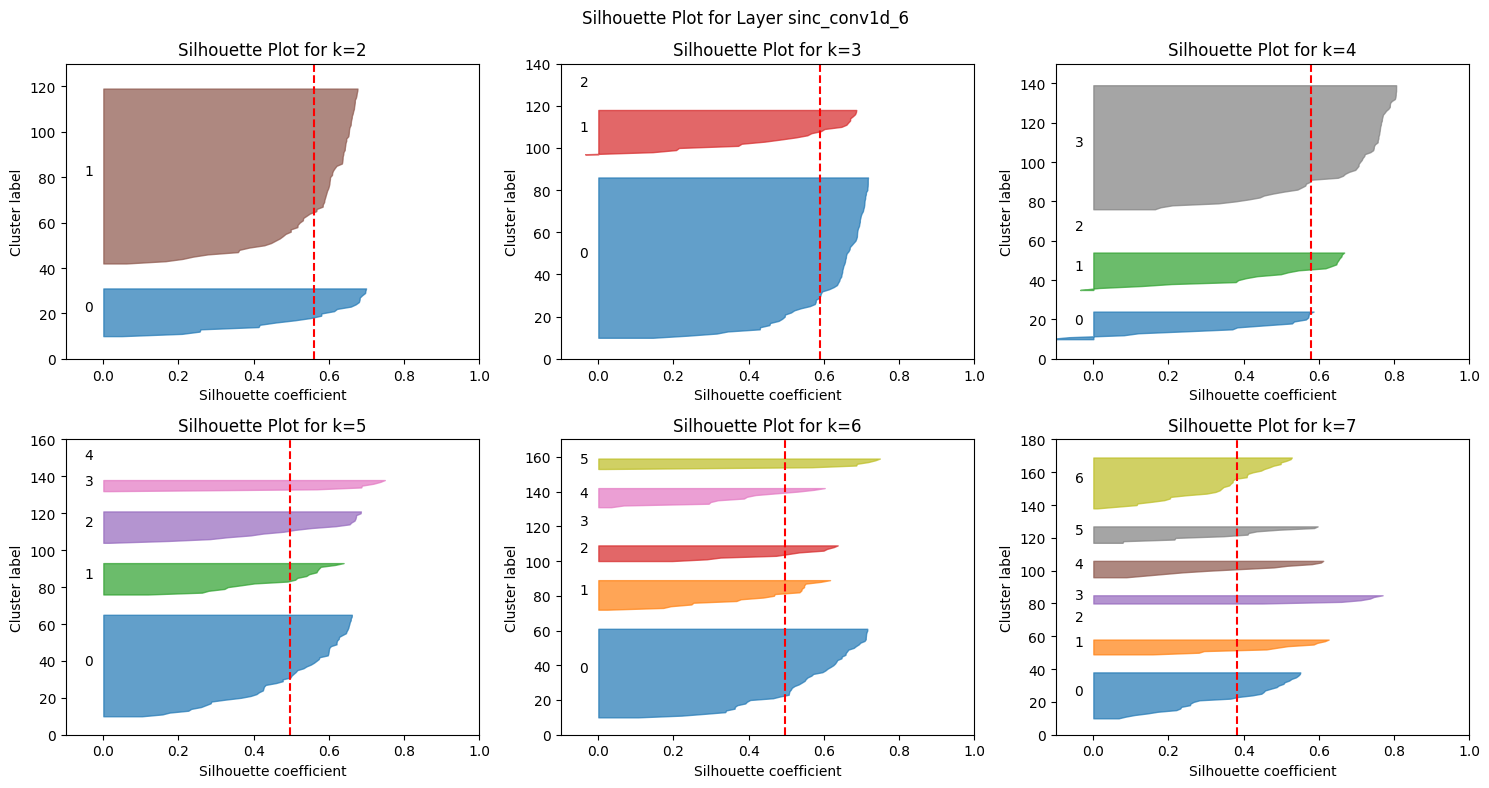

Optimal number of clusters (k) for layer sinc_conv1d_7: 4


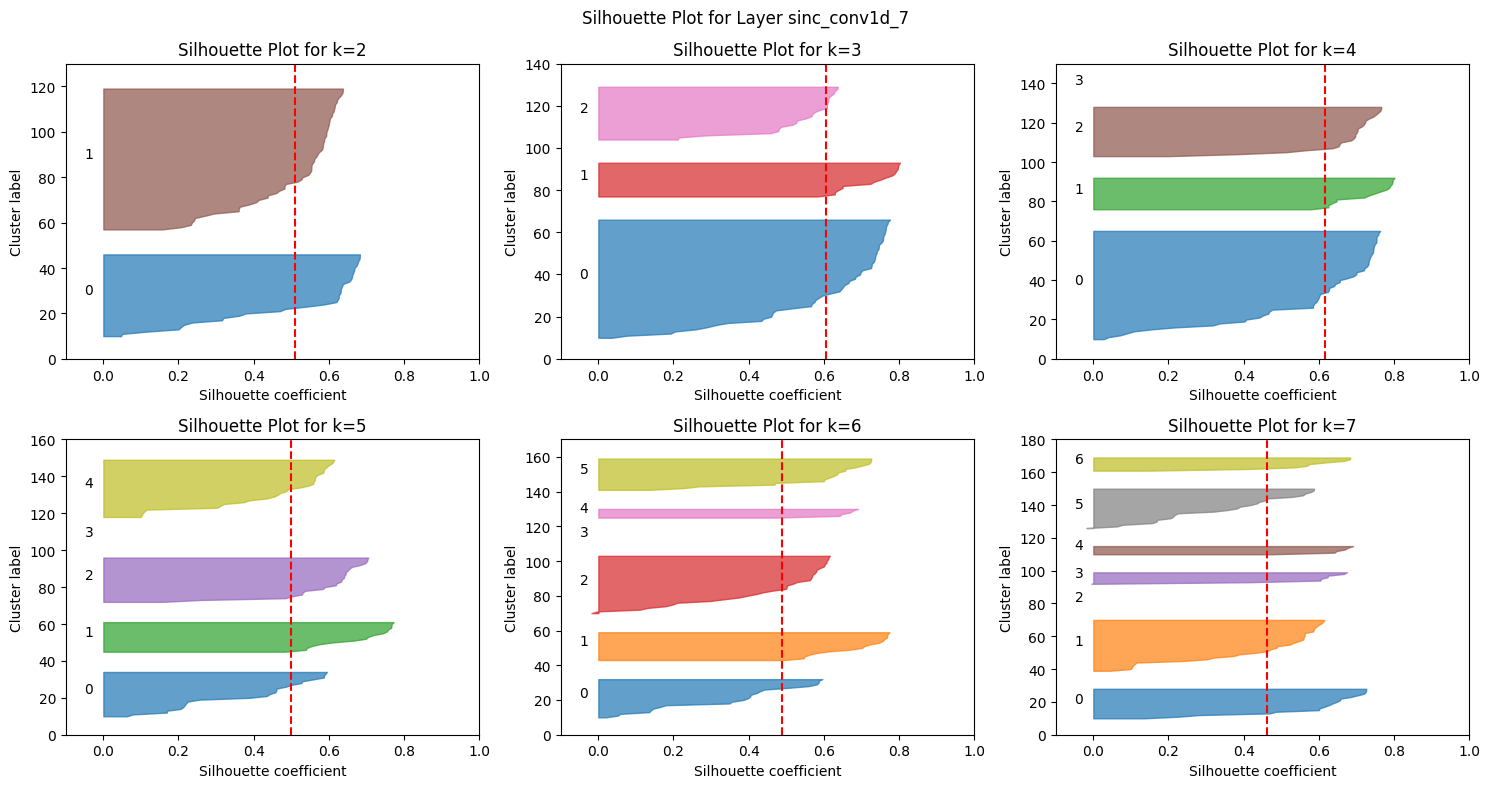

In [ ]:
# Load the filter data for each layer and find optimal k for each layer
all_optimal_k_values = {}
for layer_name in ['sinc_conv1d', 'sinc_conv1d_1', 'sinc_conv1d_2',
                   'sinc_conv1d_3', 'sinc_conv1d_4', 'sinc_conv1d_5', 'sinc_conv1d_6', 'sinc_conv1d_7']:
    layer_data = get_filter_data(model2, layer_name)
    k_values = range(2, 8)  # Define range of k values to try
    silhouette_scores = calculate_silhouette_scores(layer_data, k_values)
    optimal_k = k_values[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters (k) for layer {layer_name}: {optimal_k}")
    all_optimal_k_values[layer_name] = optimal_k
    plot_silhouette_diagrams(layer_data, k_values, layer_name)

In [ ]:
all_optimal_k_values

{'sinc_conv1d': 3,
 'sinc_conv1d_1': 4,
 'sinc_conv1d_2': 3,
 'sinc_conv1d_3': 4,
 'sinc_conv1d_4': 3,
 'sinc_conv1d_5': 6,
 'sinc_conv1d_6': 3,
 'sinc_conv1d_7': 4}

In [ ]:
# after visualizations lets set the right values based on the plots
all_optimal_k_values = {}

all_optimal_k_values['sinc_conv1d'] = 3
all_optimal_k_values['sinc_conv1d_1'] = 3
all_optimal_k_values['sinc_conv1d_2'] = 3
all_optimal_k_values['sinc_conv1d_3'] = 3
all_optimal_k_values['sinc_conv1d_4'] = 4
all_optimal_k_values['sinc_conv1d_5'] = 2
all_optimal_k_values['sinc_conv1d_6'] = 2
all_optimal_k_values['sinc_conv1d_7'] = 3


now have selecting best number of k for each of the sensors, let's find the cluster of them and try to visulize them along side all of their group to see what have we done in clustering

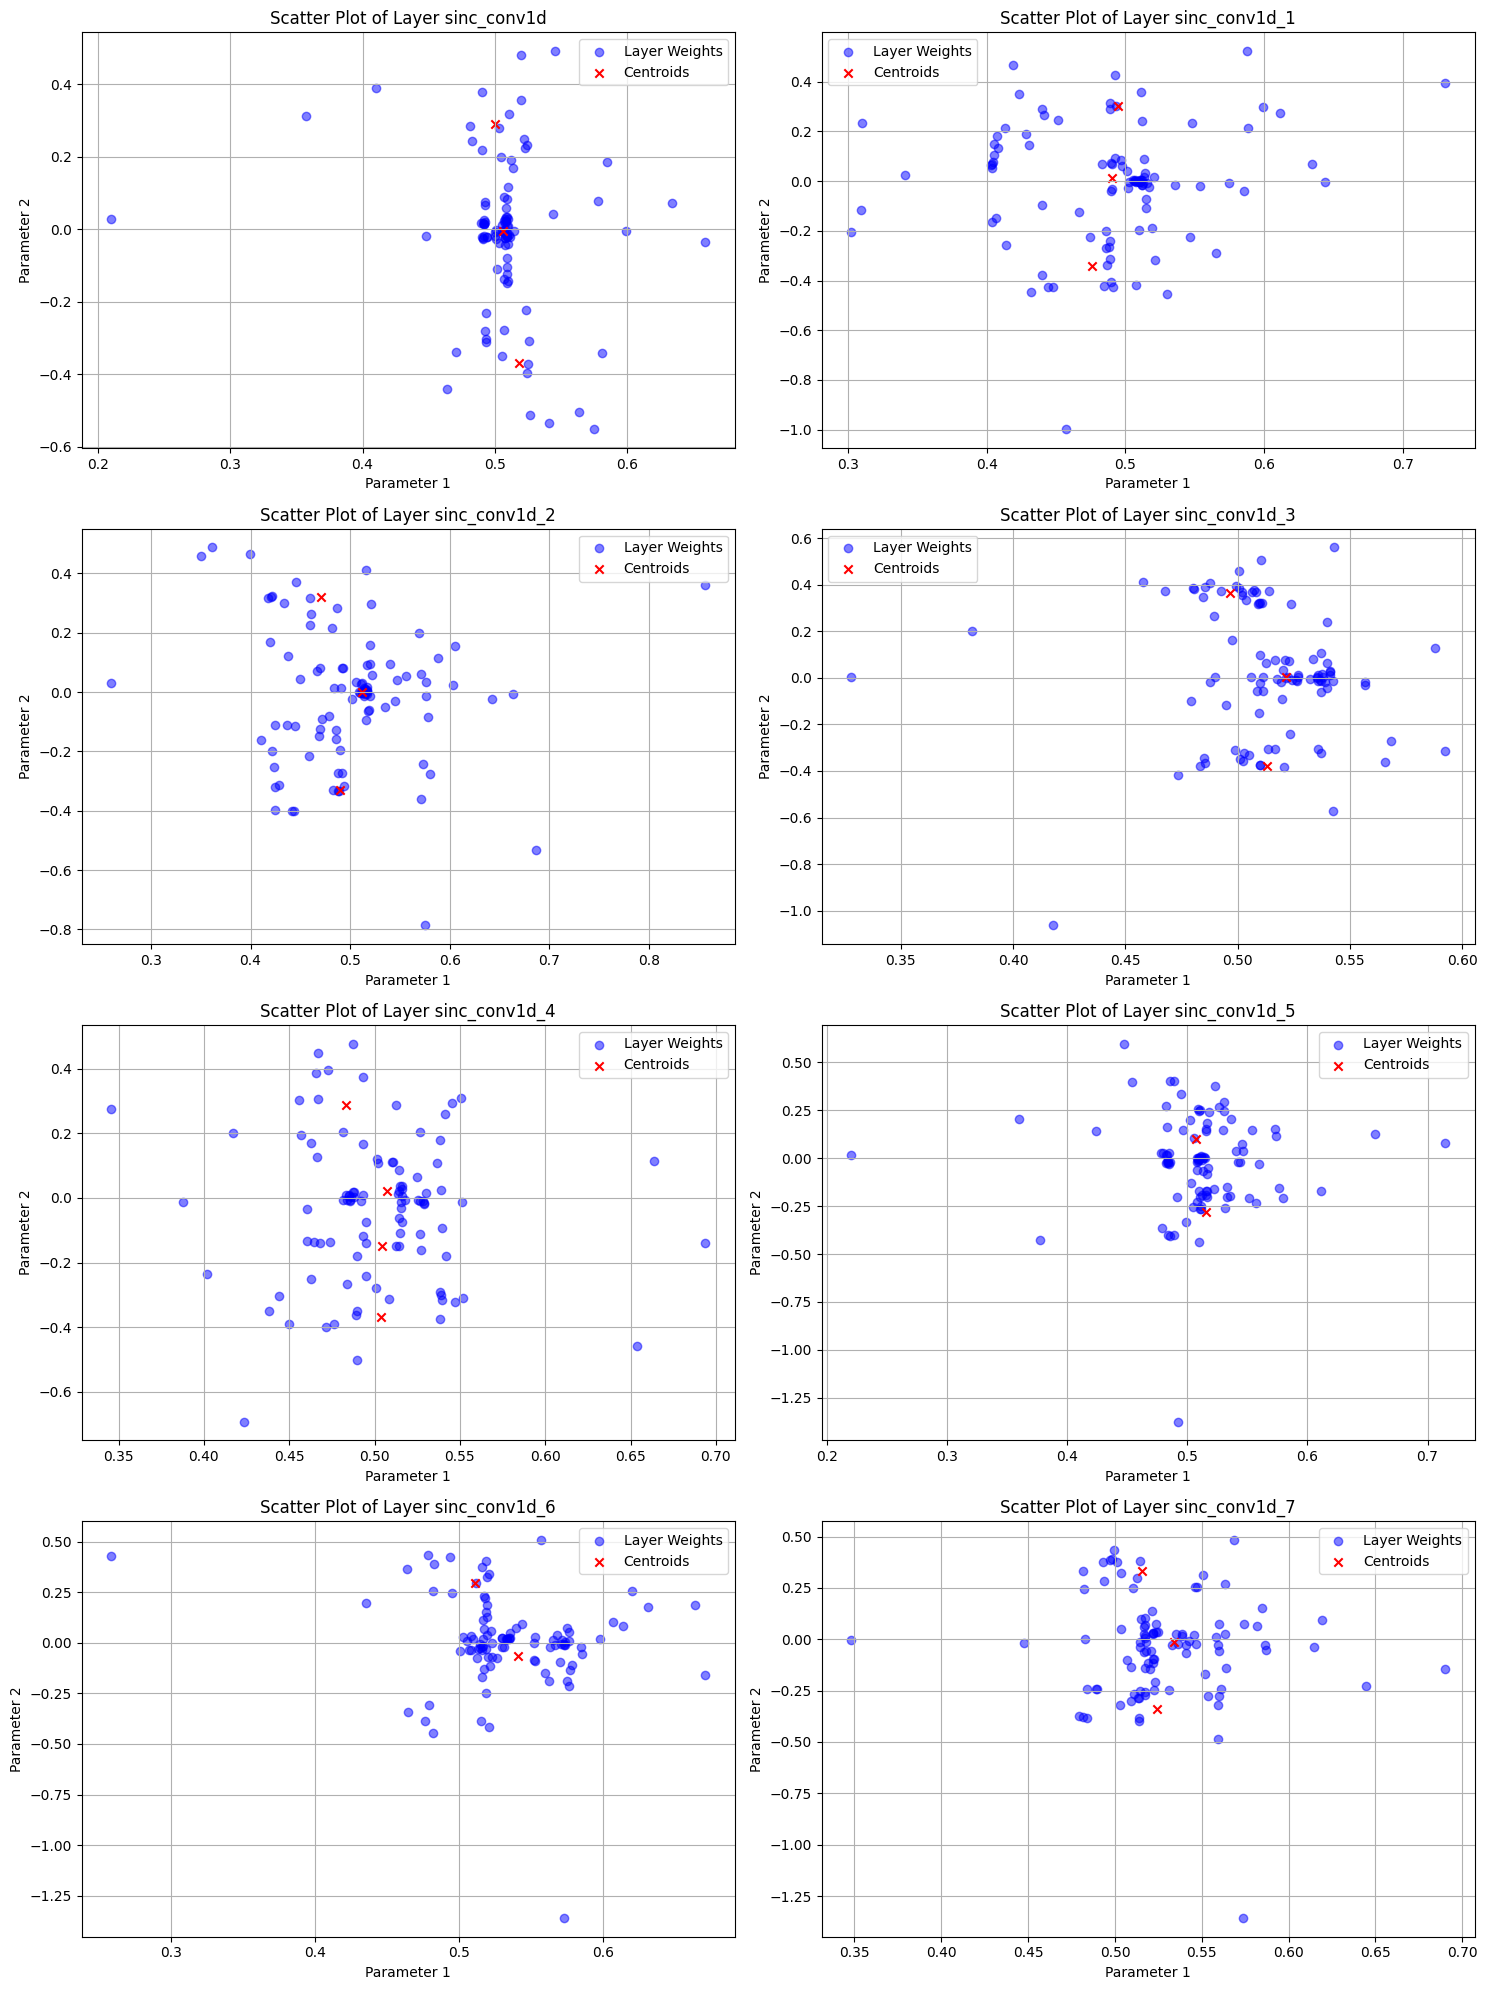

In [ ]:
# Fit KMeans with the optimal k for each layer
all_centroids = {}
for layer_name, optimal_k in all_optimal_k_values.items():
    layer_data = get_filter_data(model2, layer_name)
    kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Suppress warning by setting n_init
    kmeans.fit(layer_data)
    centroids = kmeans.cluster_centers_
    all_centroids[layer_name] = centroids

# Plot scatter plot for each layer
num_centroids = 3
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for layer_index, layer_name in enumerate(all_centroids.keys()):
    layer_data = get_filter_data(model2, layer_name)
    centroids = all_centroids[layer_name]  # Get centroids for the layer
    row = layer_index // 2
    col = layer_index % 2
    axs[row, col].scatter(layer_data[:, 0], layer_data[:, 1], c='blue', alpha=0.5, label='Layer Weights')
    axs[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    axs[row, col].set_title(f'Scatter Plot of Layer {layer_name}')
    axs[row, col].set_xlabel('Parameter 1')
    axs[row, col].set_ylabel('Parameter 2')
    axs[row, col].legend()
    axs[row, col].grid(True)
plt.tight_layout()
plt.show()

now it's time to create our minimal model

# Model with Clustered

In [ ]:
# Define the new model architecture with centroids for each SincConv1D layer
def create_new_model(input_shape):
    inputs = Input(shape=input_shape)
    split_tensors = tf.split(inputs, num_or_size_splits=8, axis=1)
    list_of_sincs = []

    for i, split_tensor in enumerate(split_tensors):
        if i == 0:
            layer_name = 'sinc_conv1d'
        else:
            layer_name = f'sinc_conv1d_{i}'
        x = SincConv1D(N_filt=all_optimal_k_values[layer_name],
                       Filt_dim=101,
                       fs=100,
                       stride=5,
                       padding="SAME", name=layer_name)(split_tensor)
        x = LayerNorm()(x)
        x = LeakyReLU(alpha=0.2)(x)
        x = MaxPooling1D(pool_size=2)(x)
        list_of_sincs.append(x)

    x = Concatenate(axis=-1)(list_of_sincs)
    x = Conv1D(128, 3, strides=1, padding='valid')(x)
    x = BatchNormalization(momentum=0.05)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(rate=0.5)(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(256, 3, strides=1, padding='valid')(x)
    x = BatchNormalization(momentum=0.05)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(rate=0.5)(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Flatten()(x)

    x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
    x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
    x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
    x = LeakyReLU(alpha=0.2)(x)

    prediction = Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=prediction)
    return model

# Create the new model
input_shape = (8000, 1)  # Adjust according to your input shape
new_model = create_new_model(input_shape)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8000, 1)]            0         []                            
                                                                                                  
 tf.split_4 (TFOpLambda)     [(None, 1000, 1),            0         ['input_2[0][0]']             
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                              

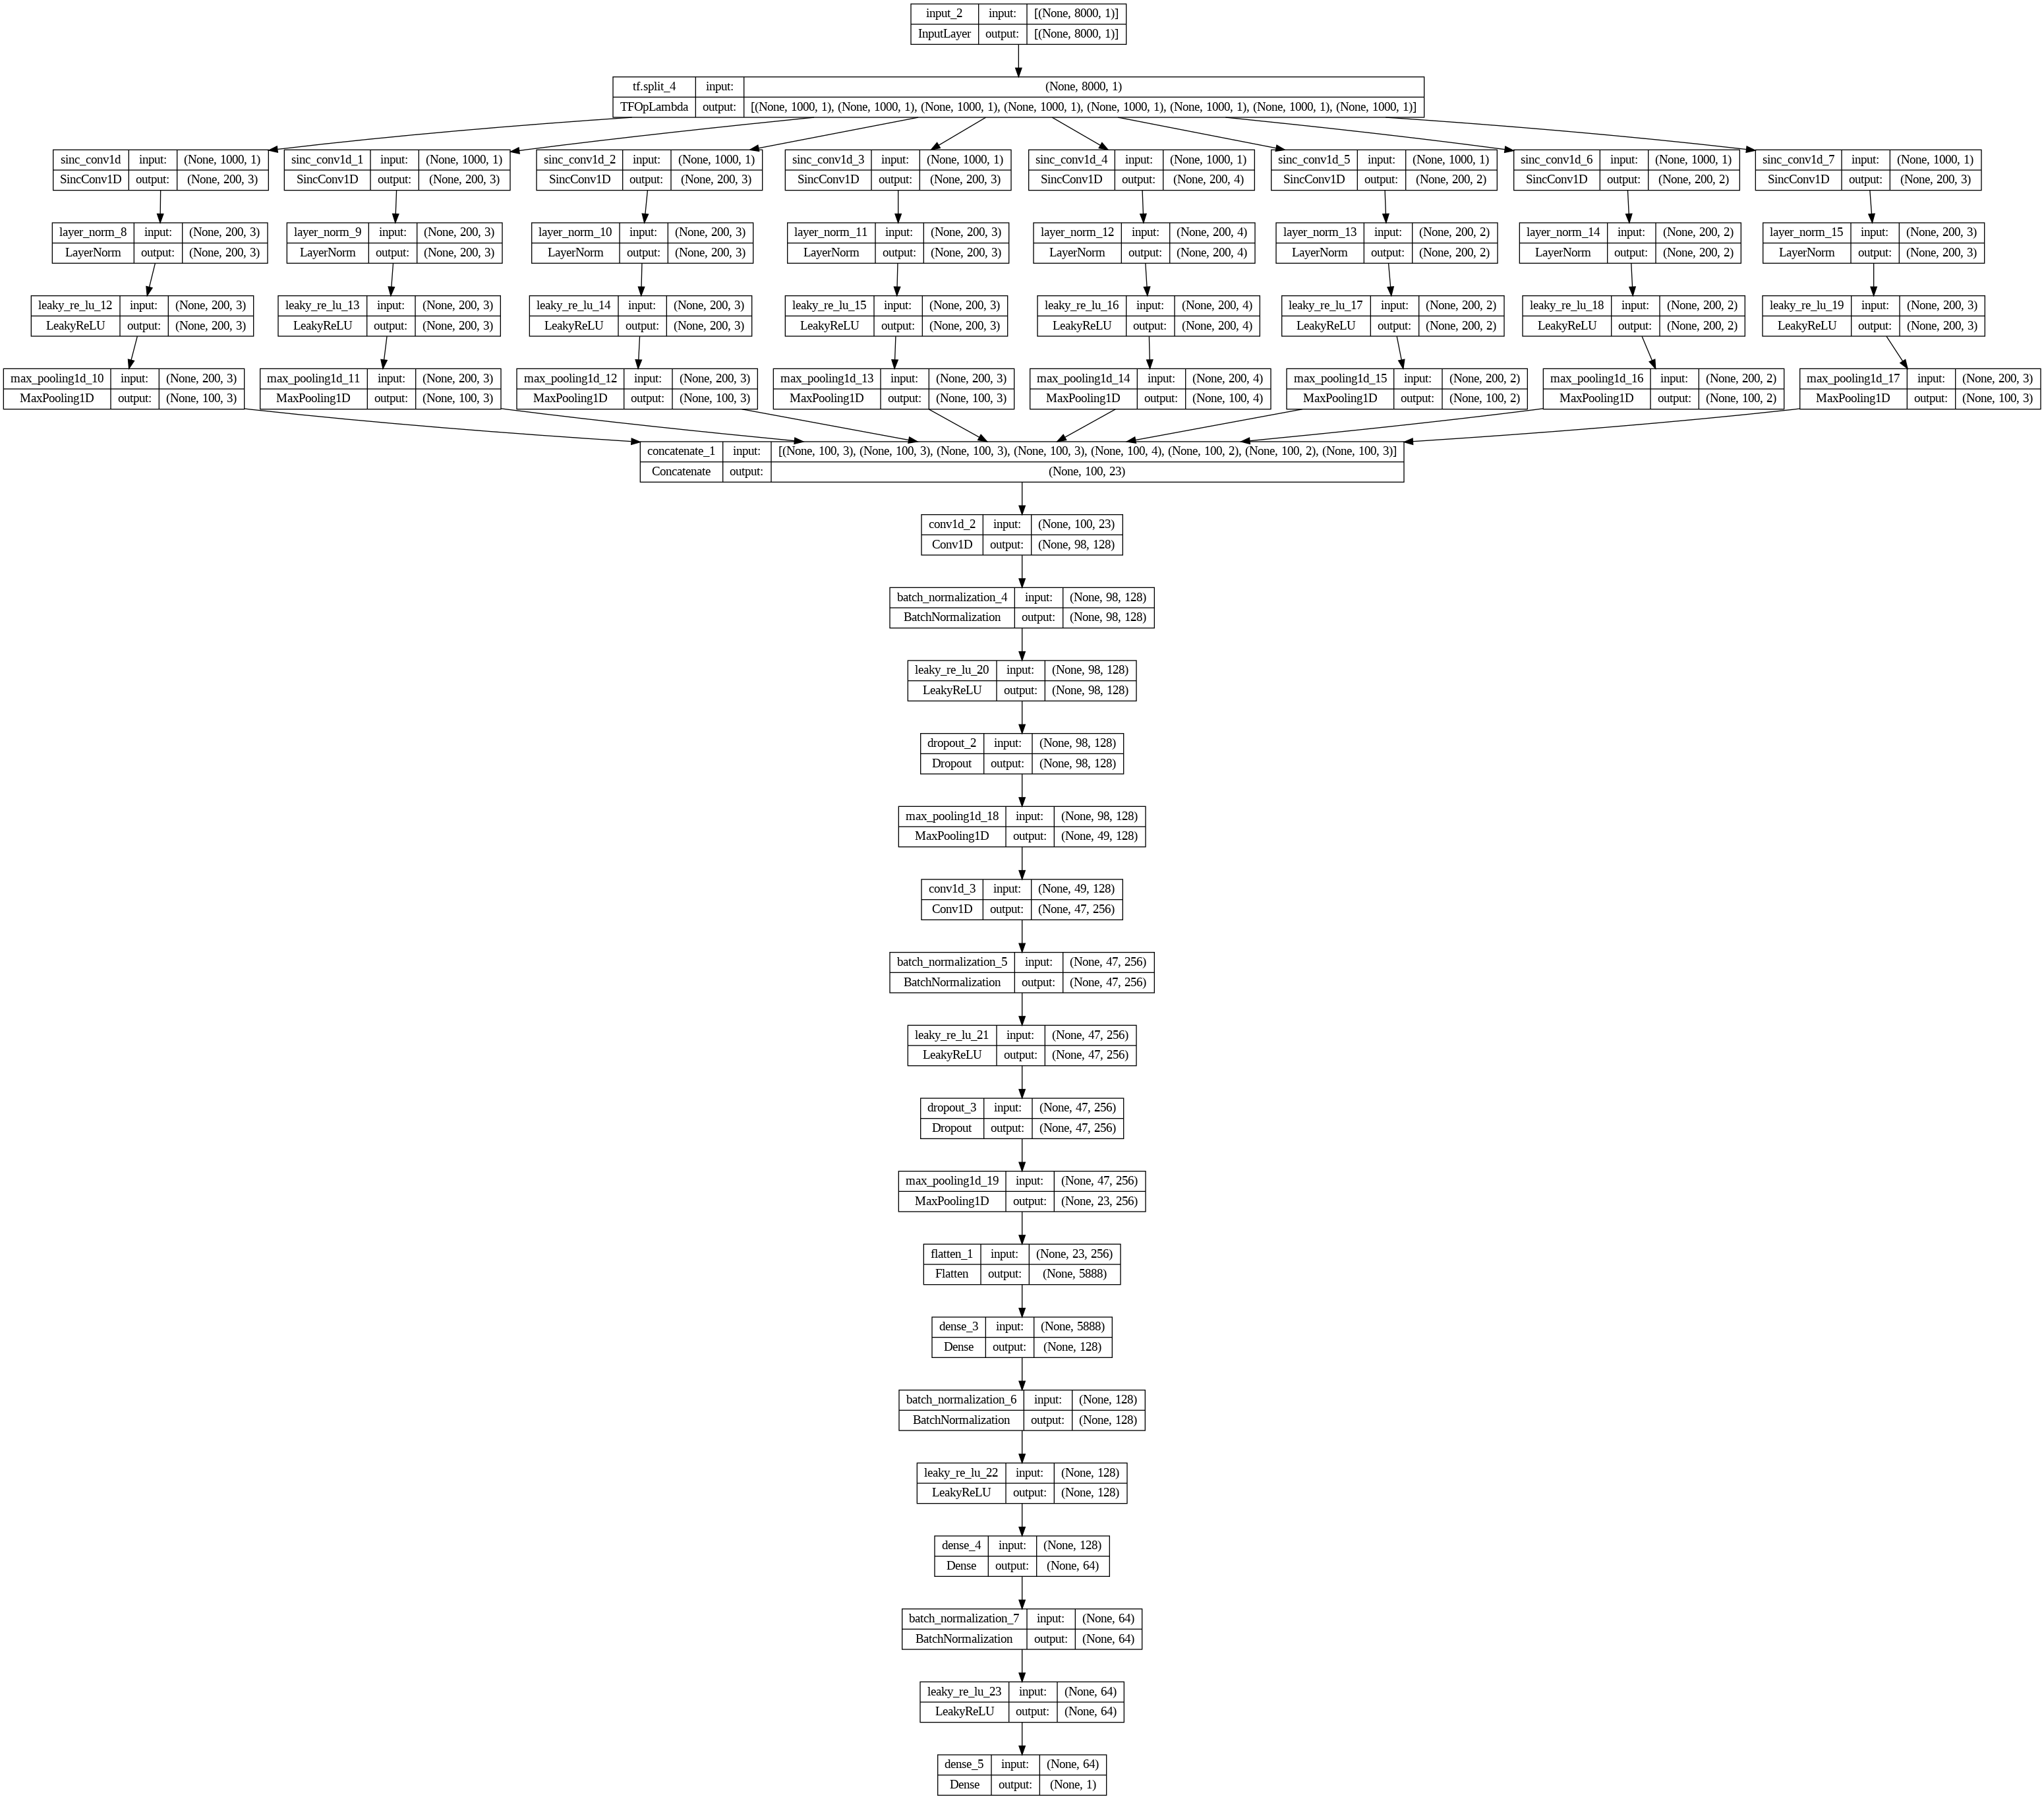

In [ ]:
new_model.summary()
plot_model(new_model, to_file='new_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Load the weights of the centroids for each layer and set them as initial weights for the corresponding SincConv1D layers
for layer_index, layer_name in enumerate(['sinc_conv1d'] + [f'sinc_conv1d_{i}' for i in range(1, 8)]):
    centroids = all_centroids[layer_name]  # Retrieve centroids from the dictionary
    filt_b1 = centroids[:, 0].reshape(-1, 1)
    filt_band = centroids[:, 1].reshape(-1, 1)
    sinc_conv_layer = new_model.get_layer(layer_name)
    sinc_conv_layer.set_weights([filt_b1, filt_band])


In [ ]:
# save
## do not run these cells again!!!!

new_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy",precision,recall])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2000, restore_best_weights=True)

new_history = new_model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=5000,
                    validation_split=0.2
                    ,callbacks=[early_stopping])

new_model.save("sicnet_new")

Streaming output truncated to the last 5000 lines.
73/73 [==============================] - 3s 40ms/step - loss: 0.1489 - accuracy: 0.9845 - precision_2: 0.9912 - recall_2: 0.9862 - val_loss: 0.1780 - val_accuracy: 0.9760 - val_precision_2: 0.9769 - val_recall_2: 0.9906
Epoch 1263/5000
73/73 [==============================] - 2s 28ms/step - loss: 0.1142 - accuracy: 0.9815 - precision_2: 0.9886 - recall_2: 0.9843 - val_loss: 0.1557 - val_accuracy: 0.9846 - val_precision_2: 0.9883 - val_recall_2: 0.9906
Epoch 1264/5000
73/73 [==============================] - 2s 29ms/step - loss: 0.1205 - accuracy: 0.9875 - precision_2: 0.9931 - recall_2: 0.9887 - val_loss: 0.1320 - val_accuracy: 0.9828 - val_precision_2: 0.9860 - val_recall_2: 0.9906
Epoch 1265/5000
73/73 [==============================] - 2s 29ms/step - loss: 0.0796 - accuracy: 0.9931 - precision_2: 0.9962 - recall_2: 0.9937 - val_loss: 0.0873 - val_accuracy: 0.9880 - val_precision_2: 0.9976 - val_recall_2: 0.9859
Epoch 1266/5000
73/73

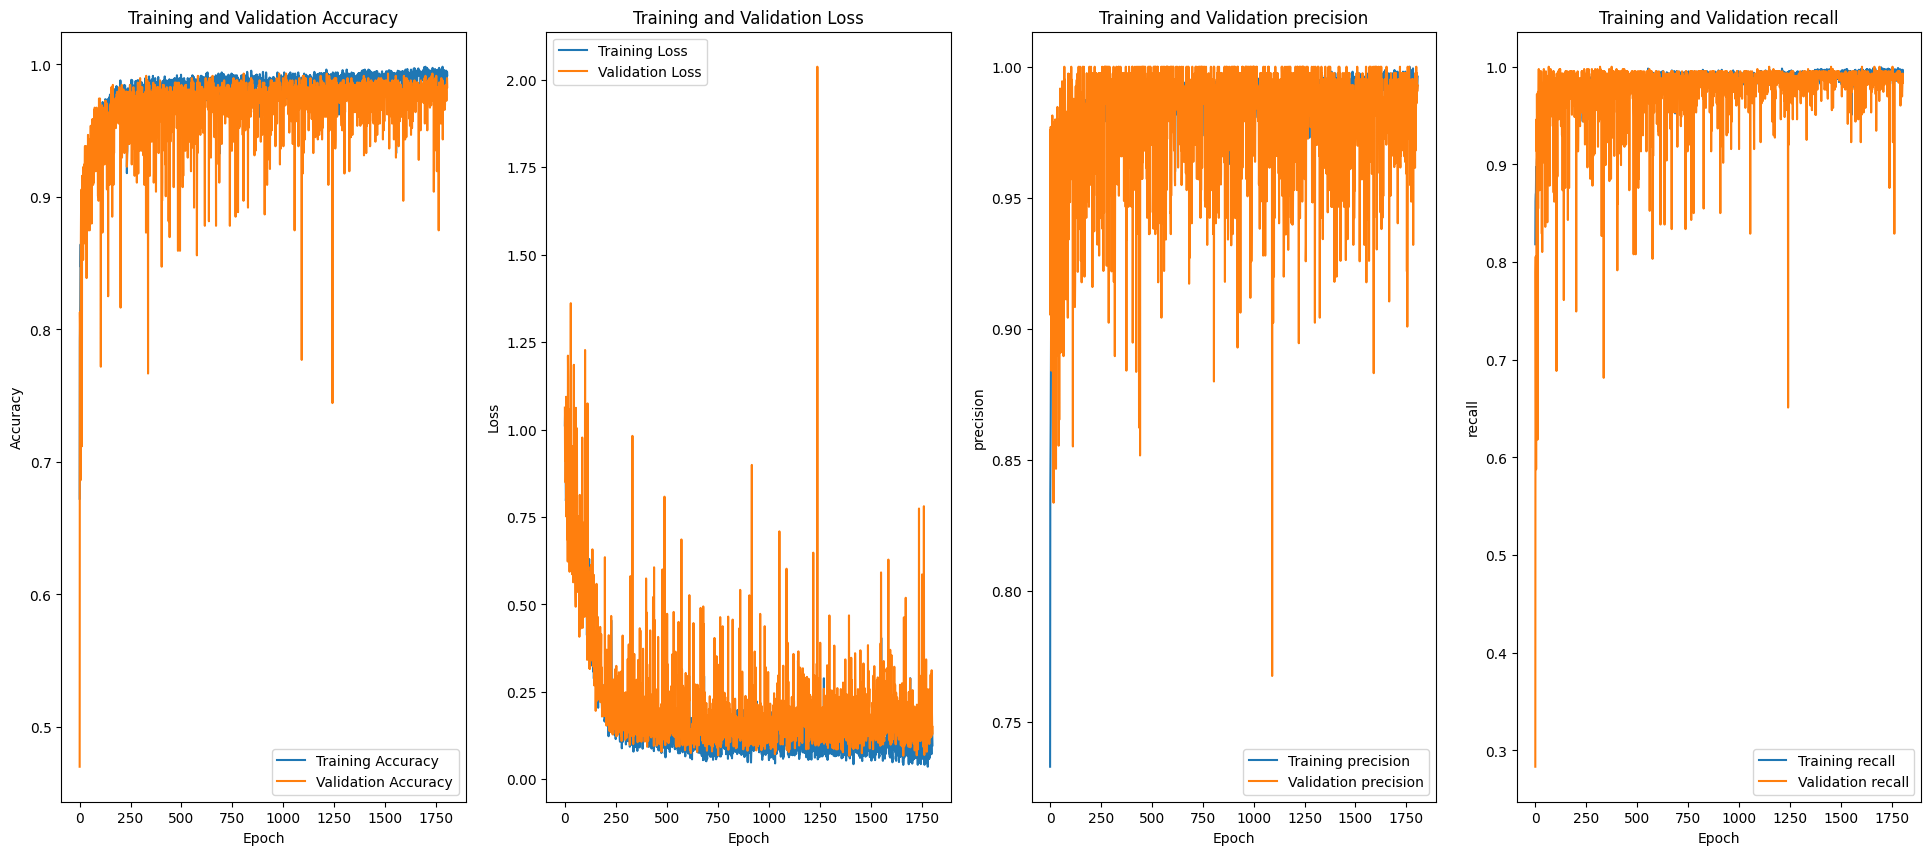

In [ ]:
## do not run these cells again!!!!

plt.figure(figsize=(24, 10))

# Plot Training Accuracy 2
plt.subplot(1, 4, 1)
plt.plot(new_history.history['accuracy'], label='Training Accuracy')
plt.plot(new_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 4, 2)
plt.plot(new_history.history['loss'][5:], label='Training Loss')
plt.plot(new_history.history['val_loss'][5:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(1, 4, 3)
plt.plot(new_history.history['precision'], label='Training precision')
plt.plot(new_history.history['val_precision'], label='Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.title('Training and Validation precision')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(new_history.history['recall'], label='Training recall')
plt.plot(new_history.history['val_recall'], label='Validation recall')
plt.xlabel('Epoch')
plt.ylabel('recall')
plt.title('Training and Validation recall')
plt.legend()

plt.show()

In [ ]:
new_predictions = new_model.predict(X_test)
# Convert the new_predictions to class labels (assuming binary classification)
new_predicted_labels = (new_predictions > 0.5).astype(int)

# Evaluate the model
new_accuracy = tf.keras.metrics.Accuracy()
new_accuracy.update_state(y_test, new_predicted_labels)
new_accuracy_result = new_accuracy.result().numpy()

# Print the accuracy
print(f"Accuracy on the test set: {new_accuracy_result}")

11/11 [==============================] - 1s 20ms/step
Accuracy on the test set: 0.9814814925193787


In [ ]:
# # Load
new_model = load_model("sicnet_new")

# Explainability

let's make our model more interpretable.

We try to check how our model actually predicts whether the signal is from a patient or healthy. having 15 chosen filters for each 8 sensors, we want to plot the energy of the output signal when goes through the SincNet layers.

the first idea is to find the average of all the calculated patient and healthy energy signals, then try to plot it and we want to see some difference!

In [ ]:
cd ..

/content/drive/.shortcut-targets-by-id/1W80QmWSrr3gQsyatQQqoJnWS3-nlwn--/SincNetSalimiFall2023


In [ ]:
cd images

/content/drive/.shortcut-targets-by-id/1W80QmWSrr3gQsyatQQqoJnWS3-nlwn--/SincNetSalimiFall2023/images


In [ ]:
y_train = np.ravel(y_train) #flatting y_train for ploting porpose

In [ ]:
y_train[0]

In [ ]:
# find energies of the sincnets
def find_energies_2d(x_target, y_target):
    test_input = x_target
    arr_list = []

    # output of first sinc
    partial_model_first_sinc = tf.keras.models.Model(inputs=new_model.input, outputs=new_model.get_layer('sinc_conv1d').output)
    output_of_first_sinc_layer = partial_model_first_sinc.predict(test_input)
    output_of_first_sinc_layer = np.transpose(output_of_first_sinc_layer, (0, 2, 1))
    arr_list.append(output_of_first_sinc_layer)

    # output of other sincs
    for i in range(1, 8):
        partial_model_first_sinc_i = tf.keras.models.Model(inputs=new_model.input, outputs=new_model.get_layer(f'sinc_conv1d_{i}').output)
        temp_signal = partial_model_first_sinc_i.predict(test_input)
        temp_signal = np.transpose(temp_signal, (0, 2, 1))
        arr_list.append(temp_signal)

    # Calculate energy for each output separately
    energy_not_PD_list = []
    energy_PD_list = []

    for output_signal in arr_list:
        energy_per_7 = np.sum(output_signal ** 2, axis=2)  # Sum along axis 2
        not_PD = np.mean(energy_per_7[y_target == 0], axis=0)  # Calculate mean for not_PD
        PD = np.mean(energy_per_7[y_target == 1], axis=0)  # Calculate mean for PD

        energy_not_PD_list.append(not_PD)
        energy_PD_list.append(PD)

    return energy_not_PD_list, energy_PD_list

In [ ]:
energy_not_PD, energy_PD = find_energies_2d(X_test, y_test)
#op2

In [ ]:
# Plot energy for PDs and not_PD in the same figure for each sample
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(8):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index

    axs[row, col].plot(energy_PD[i], label="Patient", color='red')
    axs[row, col].plot(energy_not_PD[i], label="Healthy", color='green')
    axs[row, col].set_title(f"Energies for Sensor {i+1}")
    axs[row, col].set_xlabel("Filter Number")
    axs[row, col].set_ylabel("Energy Value")
    # axs[row, col].set_ylim(0, 1200)  # Set y-axis limits to [0, 1]

    axs[row, col].legend()
    axs[row, col].legend(loc='upper left')
    axs[row, col].set_xticks(np.arange(len(energy_not_PD[i])))  # Set x-axis ticks to discrete integers


plt.tight_layout()
# plt.savefig("energy_filters_using_mean_2D.jpg")
plt.savefig('energy_filters_using_mean_2D.pdf')


they are so similar.

something must be wrong.

our idea is when we use average for all these energy signals, there all lots of noises that the end they seem so identical.

so the best approch is to find the core of the patient, also the core of the healthy, and just find the energy of these two.

In [ ]:
mask_0 = (y_test == 0) #mask for healthy
mask_1 = (y_test == 1)  #mask for patient
# Create variables for healthy and patient signals using the masks
healthy_signals = X_test[mask_0]
patient_signals = X_test[mask_1]

# Check the shapes of the new variables
print("Shape of healthy_signals:", healthy_signals.shape)
print("Shape of patient_signals:", patient_signals.shape)


Shape of healthy_signals: (100, 8000)
Shape of patient_signals: (224, 8000)


In [ ]:
# Fit K-means clustering to healthy signals
def kmeans_clustering(healthy_signals, patient_signals):
    kmeans_healthy = KMeans(n_clusters=1, random_state=42).fit(healthy_signals)
    kmeans_patient = KMeans(n_clusters=1, random_state=42).fit(patient_signals)
    centroid_healthy = kmeans_healthy.cluster_centers_[0]
    centroid_patient = kmeans_patient.cluster_centers_[0]
    return centroid_healthy, centroid_patient

In [ ]:
# K-means clustering
centroid_healthy_kmeans, centroid_patient_kmeans = kmeans_clustering(healthy_signals, patient_signals)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Visualize the healthy and patient signals and save the plot as an image
def plot_signals(healthy_signals, patient_signals, title, save_path=None):
    plt.figure(figsize=(10, 6))
    plt.plot(healthy_signals.T, color='green', alpha=0.5, label='Healthy Signals')
    plt.plot(patient_signals.T, color='red', alpha=0.5, label='Patient Signals')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.legend(loc='upper left')

    # Save the plot as an image if save_path is provided
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [ ]:
# Plot the signals corresponding to the centroids obtained from K-means clustering
plot_signals(centroid_healthy_kmeans, centroid_patient_kmeans,
             title='Signals Corresponding to Centroids (K-means)',
             save_path='healthy&patient_centroids_k-means.PDF')

now let's use DBSCAN for double checking the correctness the centroids

In [ ]:
# Fit DBSCAN clustering to healthy signals
def dbscan_clustering(healthy_signals, patient_signals):
    dbscan_healthy = DBSCAN(eps=200, min_samples=5).fit(healthy_signals)
    dbscan_patient = DBSCAN(eps=200, min_samples=5).fit(patient_signals)
    labels_healthy = dbscan_healthy.labels_
    labels_patient = dbscan_patient.labels_

    # Exclude noise points (label = -1)
    labels_healthy = labels_healthy[labels_healthy != -1]
    labels_patient = labels_patient[labels_patient != -1]

    most_frequent_label_healthy = np.argmax(np.bincount(labels_healthy))
    most_frequent_label_patient = np.argmax(np.bincount(labels_patient))

    centroid_healthy = np.mean(healthy_signals[labels_healthy == most_frequent_label_healthy], axis=0)
    centroid_patient = np.mean(patient_signals[labels_patient == most_frequent_label_patient], axis=0)

    return centroid_healthy, centroid_patient

In [ ]:
# DBSCAN clustering
centroid_healthy_dbscan, centroid_patient_dbscan = dbscan_clustering(healthy_signals, patient_signals)

In [ ]:
# Plot the signals corresponding to the centroids obtained from DBSCAN clustering
plot_signals(centroid_healthy_dbscan, centroid_patient_dbscan,
             title='Signals Corresponding to Centroids (DBSCAN)',
             save_path='healthy&patient_centroids_DBSCAN.PDF')


great!!now we see that a commom Healthy and Patient signal have some important differences!

Now let's use these two centroids as our input to energy calculator in the output of our sincnet layers

In [ ]:
X_stacked_centroids=np.stack([centroid_healthy_kmeans,centroid_patient_kmeans],axis=0)
y_stacked_centroids=np.stack([0,1],axis=0)

In [ ]:
energy_not_PD, energy_PD = find_energies_2d(X_stacked_centroids, y_stacked_centroids)
#op2

1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 82ms/step


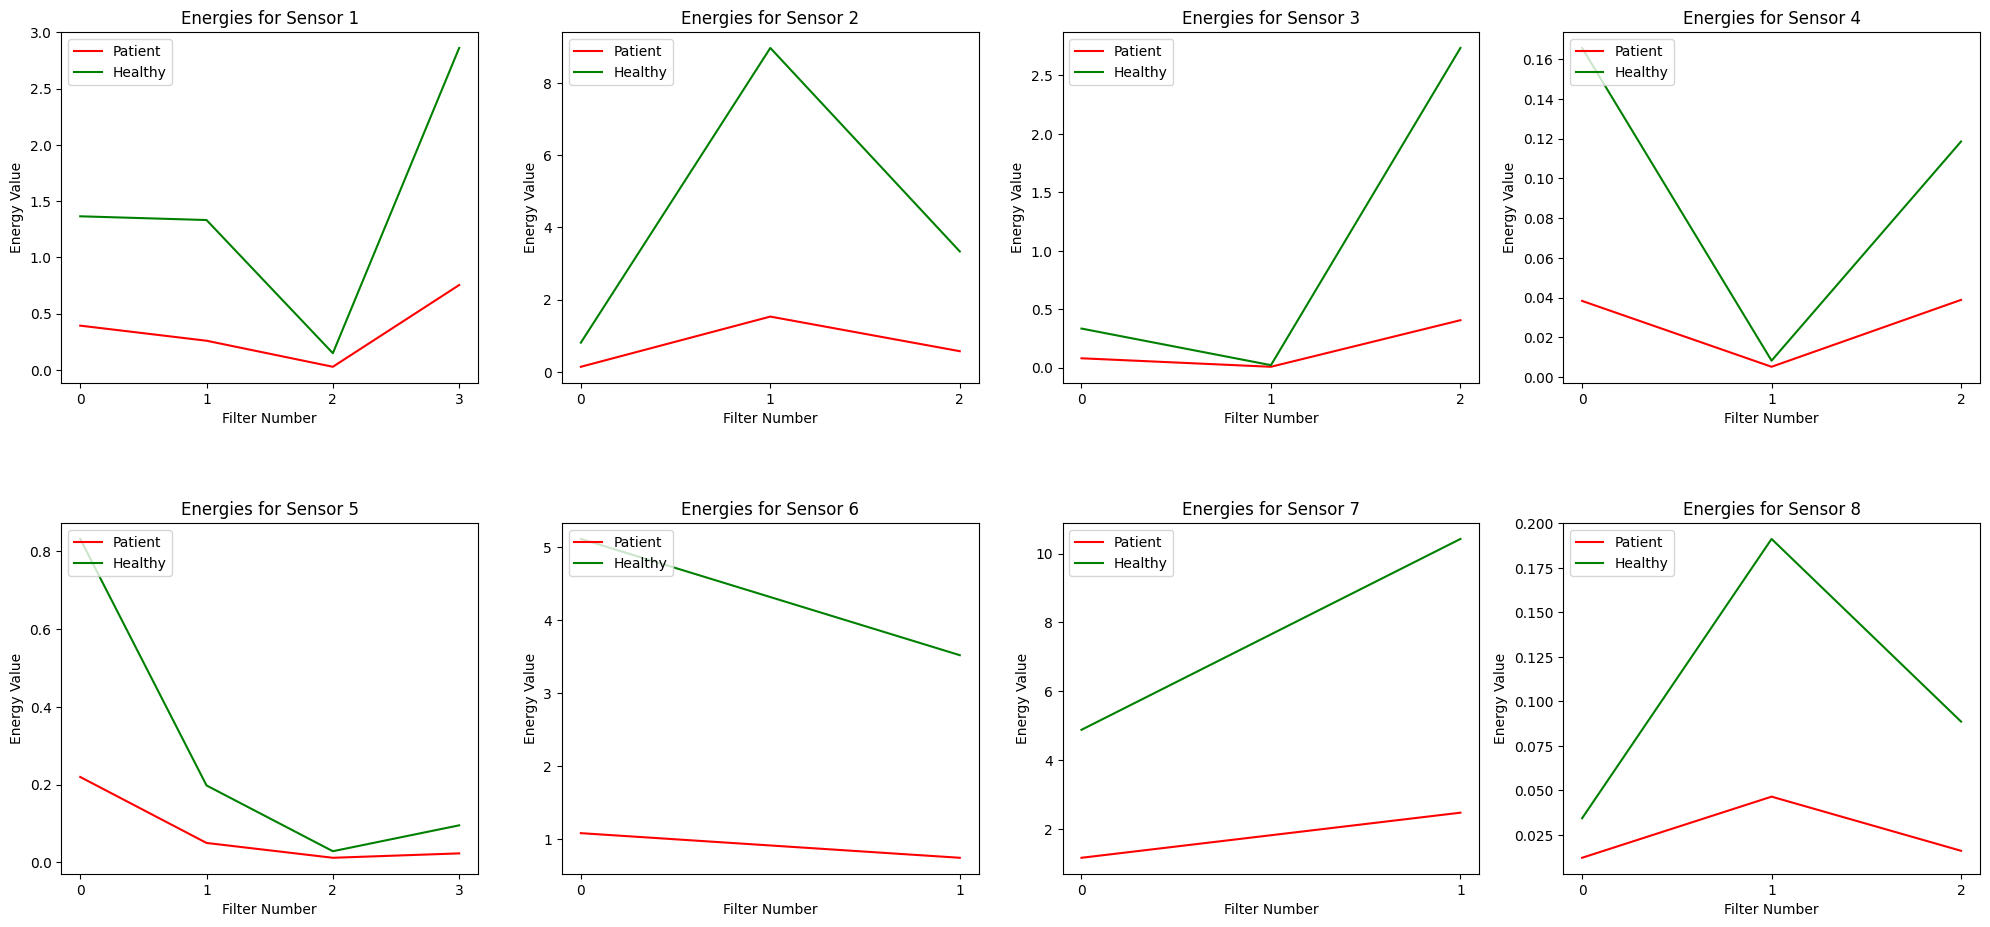

In [ ]:
# Plot energy for PDs and not_PD in the same figure for each sample
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(8):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index

    axs[row, col].plot(energy_PD[i], label="Patient", color='red')
    axs[row, col].plot(energy_not_PD[i], label="Healthy", color='green')
    axs[row, col].set_title(f"Energies for Sensor {i+1}")
    axs[row, col].set_xlabel("Filter Number")
    axs[row, col].set_ylabel("Energy Value")
    axs[row, col].legend(loc='upper left')
    axs[row, col].set_xticks(np.arange(len(energy_not_PD[i])))  # Set x-axis ticks to discrete integers


plt.tight_layout()

plt.savefig("energy_filters_using_centroids_2rows.PDF")


as we see Healthy singnal enegies ouput from the sinc layers are usually more powerful.

but we want to know what makes the difference so we substract patient from Healthy and then try to find in which signal and sensor they have more distinct energy that the rest of the model (the CNN) is going to detect it.

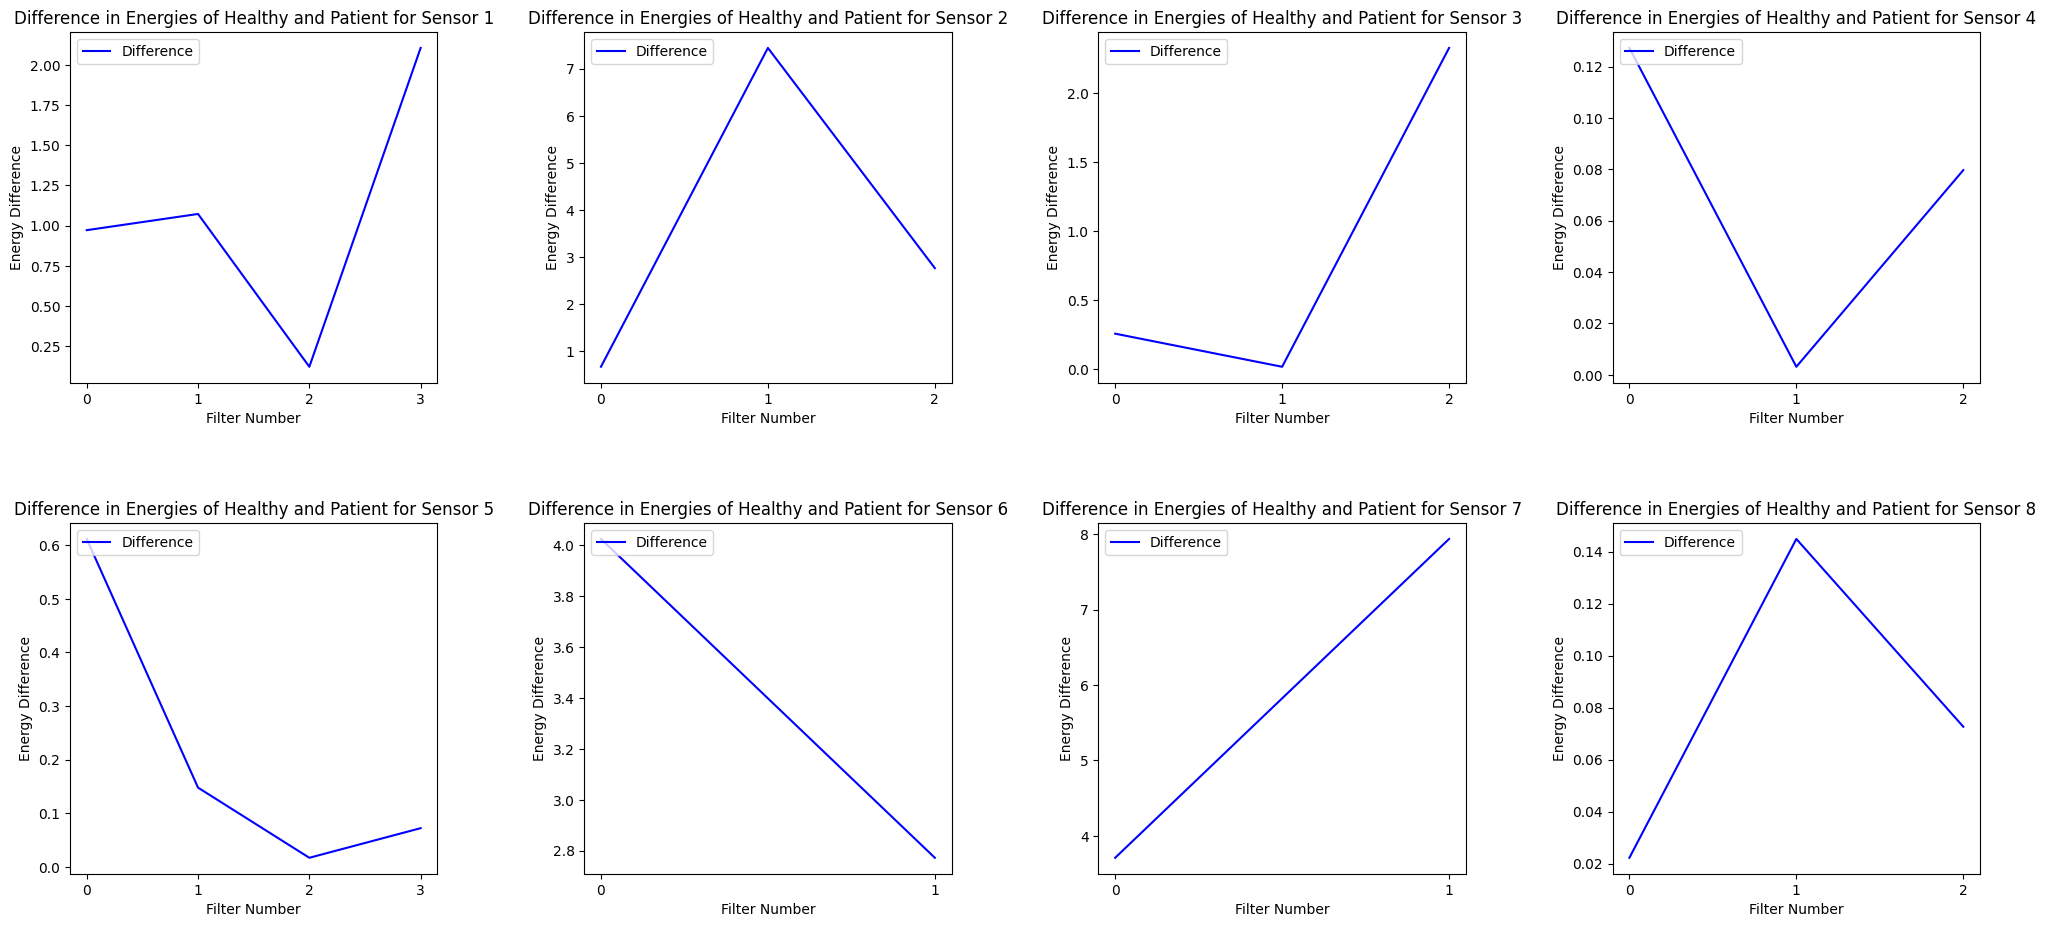

In [ ]:
# Calculate the difference in energy values between healthy and patient signals for each filter
energy_diff = [np.array(energy_not_PD[i] - np.array(energy_PD[i])) for i in range(8)]

# Plot the difference in energy values for each filter
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(8):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index

    axs[row, col].plot(energy_diff[i], label="Difference", color='blue')
    axs[row, col].set_title(f"Difference in Energies of Healthy and Patient for Sensor {i+1}")
    axs[row, col].set_xlabel("Filter Number")
    axs[row, col].set_ylabel("Energy Difference")
    axs[row, col].legend(loc='upper left')
    axs[row, col].set_xticks(np.arange(len(energy_diff[i])))  # Set x-axis ticks to discrete integers

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4,wspace=0.4)

plt.savefig("energy_difference_between_not_PD_and_PD_new_2rows.PDF")


In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1W80QmWSrr3gQsyatQQqoJnWS3-nlwn--/SincNetSalimiFall2023/images'

ok now let's put them all together and try to find the top 20% of the most energy difference.
after finding them we try to find those filters and their sensor numbers and after gething their paramters from the SINC layers, we try to visualize those signals

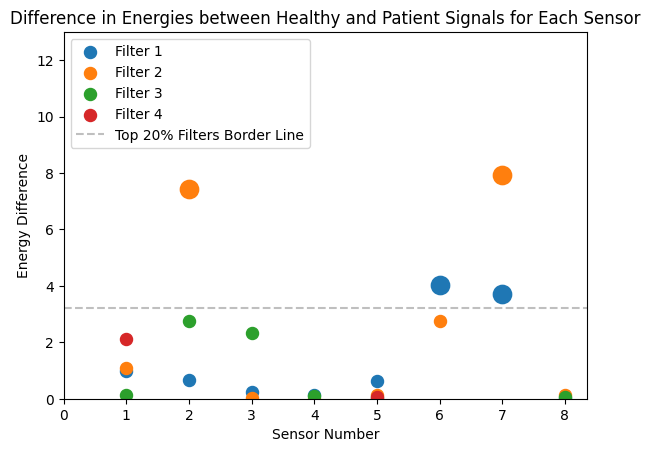

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_energy_difference(energy_diff):
    fig, ax = plt.subplots(figsize=(6, 5))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, orange, green, red

    # Flatten the list of energy differences
    flattened_diff = np.concatenate(energy_diff)

    # Find the indices of the top 20 percent energies
    top_20_percent_indices = np.argsort(flattened_diff)[-int(len(flattened_diff) * 0.2):]

    # Flatten the indices of energy differences
    indices = [(i, j) for i in range(len(energy_diff)) for j in range(len(energy_diff[i]))]

    # Plot energy differences
    for idx, (i, j) in enumerate(indices):
        label = f"Filter {j+1}" if i == 0 else None  # Label only for the first iteration
        color = colors[j % len(colors)]  # Cycle through colors if more than 4 filters
        linewidth = 1  # Default linewidth
        size = 75  # Default size of dots
        marker = 'o'  # Default marker

        if idx in top_20_percent_indices:
            # color = 'gray'  # Highlight top 20 percent with gray color
            linewidth = 3  # Increase linewidth for top 20 percent
            size = 125  # Increase size of dots for top 20 percent
            marker = 'o'  # Use circle marker for top 20 percent

        ax.scatter(i+1, energy_diff[i][j], label=label, marker=marker, color=color, s=size, linewidth=linewidth)

    # Draw a line below the top 20 percent energy difference
    sorted_diff_indices = np.argsort(flattened_diff)
    twenties_top_index = sorted_diff_indices[-int(len(flattened_diff) * 0.2)]
    y_coord = flattened_diff[twenties_top_index] - 0.5  # Subtract a small value for positioning the line below the dot
    ax.axhline(y=y_coord, linestyle='--', color='gray', alpha=0.5, label='Top 20% Filters Border Line')

    # Add labels and legend
    ax.set_xlabel('Sensor Number')
    ax.set_ylabel('Energy Difference')
    ax.set_title('Difference in Energies between Healthy and Patient Signals for Each Sensor')
    ax.legend(loc='upper left')
    ax.set_xticks(np.arange(9))  # Set x-axis ticks to discrete integers
    ax.set_ylim(0, 13)  # Set y-axis limits to [0, 1]

    plt.tight_layout()
    fig.subplots_adjust(top=0.85)

    plt.savefig("energy_difference_between_not_PD_and_PD_combined_one_figure.PDF", bbox_inches='tight')
    plt.show()

# Assuming energy_diff is provided as a list of differences for each filter
plot_energy_difference(energy_diff)


In [ ]:
energy_difference = energy_diff

In [ ]:
# Flatten the energy_diff list and sort the flattened array in descending order
energy_difference_flat = np.concatenate([item.flatten() for item in energy_diff])

sorted_indices = np.argsort(energy_difference_flat)[::-1]

# Calculate the index corresponding to the 20th percentile
percentile_index = int(0.2 * len(sorted_indices))

# Get the indices of the top 20 percent energy differences
top_20_percent_indices = sorted_indices[:percentile_index]

In [ ]:
# Initialize an empty list to store the original indices of the top 20 percent energy differences
top_20_percent_indices_original = []

# Iterate over the flattened indices and convert them back to their original format
for idx in top_20_percent_indices:
    total_size = 0
    for i, item in enumerate(energy_diff):
        size = np.prod(item.shape)
        if idx < total_size + size:
            sub_idx = idx - total_size
            layer_indices = np.unravel_index(sub_idx, item.shape)
            top_20_percent_indices_original.append((i,) + layer_indices)
            break
        total_size += size

# Print the original indices of the top 20 percent energy differences
print("Original indices of the top 20 percent energy differences:")
for item in top_20_percent_indices_original:
    print(item)
    print(f"Sensor Number: {item[0] + 1}, Filter Number: {item[1] + 1}, Energy Diff: {energy_diff[item[0]][item[1]]}")

In [ ]:
# Define a function to retrieve filter parameters from the model for all layers
def get_all_filter_parameters(model):
    filter_parameters = []
    for i in range(8):  # Assuming 8 layers named sinc_conv1d to sinc_conv1d_7
        layer_name = f'sinc_conv1d_{i}' if i > 0 else 'sinc_conv1d'
        layer = model.get_layer(layer_name)
        center_freq, bandwidth = layer.get_weights()
        # Convert center frequency and bandwidth to numpy arrays
        center_freq = np.array(center_freq)
        bandwidth = np.array(bandwidth)
        filter_parameters.append(( bandwidth,center_freq))
    return filter_parameters

# Get the model instance
model = new_model  # Assuming new_model is your model instance

# Retrieve filter parameters for all layers
filter_parameters_all_layers = get_all_filter_parameters(model)

# Verify the shape of the retrieved parameters
print("Shape of filter parameters for each layer:")
for i, (center_freq, bandwidth) in enumerate(filter_parameters_all_layers):
    print(f"Layer {i + 1}: {center_freq.shape}, {bandwidth.shape}")


In [ ]:
def plot_filters_times1(filter_parameters, fs=100, duration_seconds=1, num_samples=None, save_path=None):
    if num_samples is None:
        num_samples = int(duration_seconds * fs)  # Calculate num_samples based on duration

    t = np.linspace(0, duration_seconds, num_samples)  # Time axis scaled to represent seconds
    freqs = np.fft.fftfreq(num_samples, 1/fs)

    fig, axs = plt.subplots(len(filter_parameters), 1, figsize=(10, 5 * len(filter_parameters)))
    for i, (center_freq, bandwidth) in enumerate(filter_parameters):
        filt_beg_freq = np.abs(center_freq) - bandwidth / 2
        filt_end_freq = filt_beg_freq + bandwidth
        low_pass1 = 2 * filt_beg_freq * np.sinc(2 * filt_beg_freq * (t - duration_seconds/2))
        low_pass2 = 2 * filt_end_freq * np.sinc(2 * filt_end_freq * (t - duration_seconds/2))
        band_pass = low_pass2 - low_pass1
        for j in range(len(center_freq)):
            if len(center_freq)==1:
              line, = axs[i].plot(t, band_pass)
              break
            line, = axs[i].plot(t, band_pass[j])
            # axs[i].text(freqs[-1] + 1, np.abs(np.fft.fft(band_pass[j]))[-1], f'Filter {j+1}', verticalalignment='center')
        axs[i].set_title(f'7 Sinc Filter Responses - Sensor Number {i+1}')
        axs[i].set_xlabel('Time in Samples')
        axs[i].set_ylabel('Amplitude')
        # axs[i].set_xlim(0, fs/10)

    plt.tight_layout()
    if save_path:
      plt.savefig(save_path)

    plt.show()

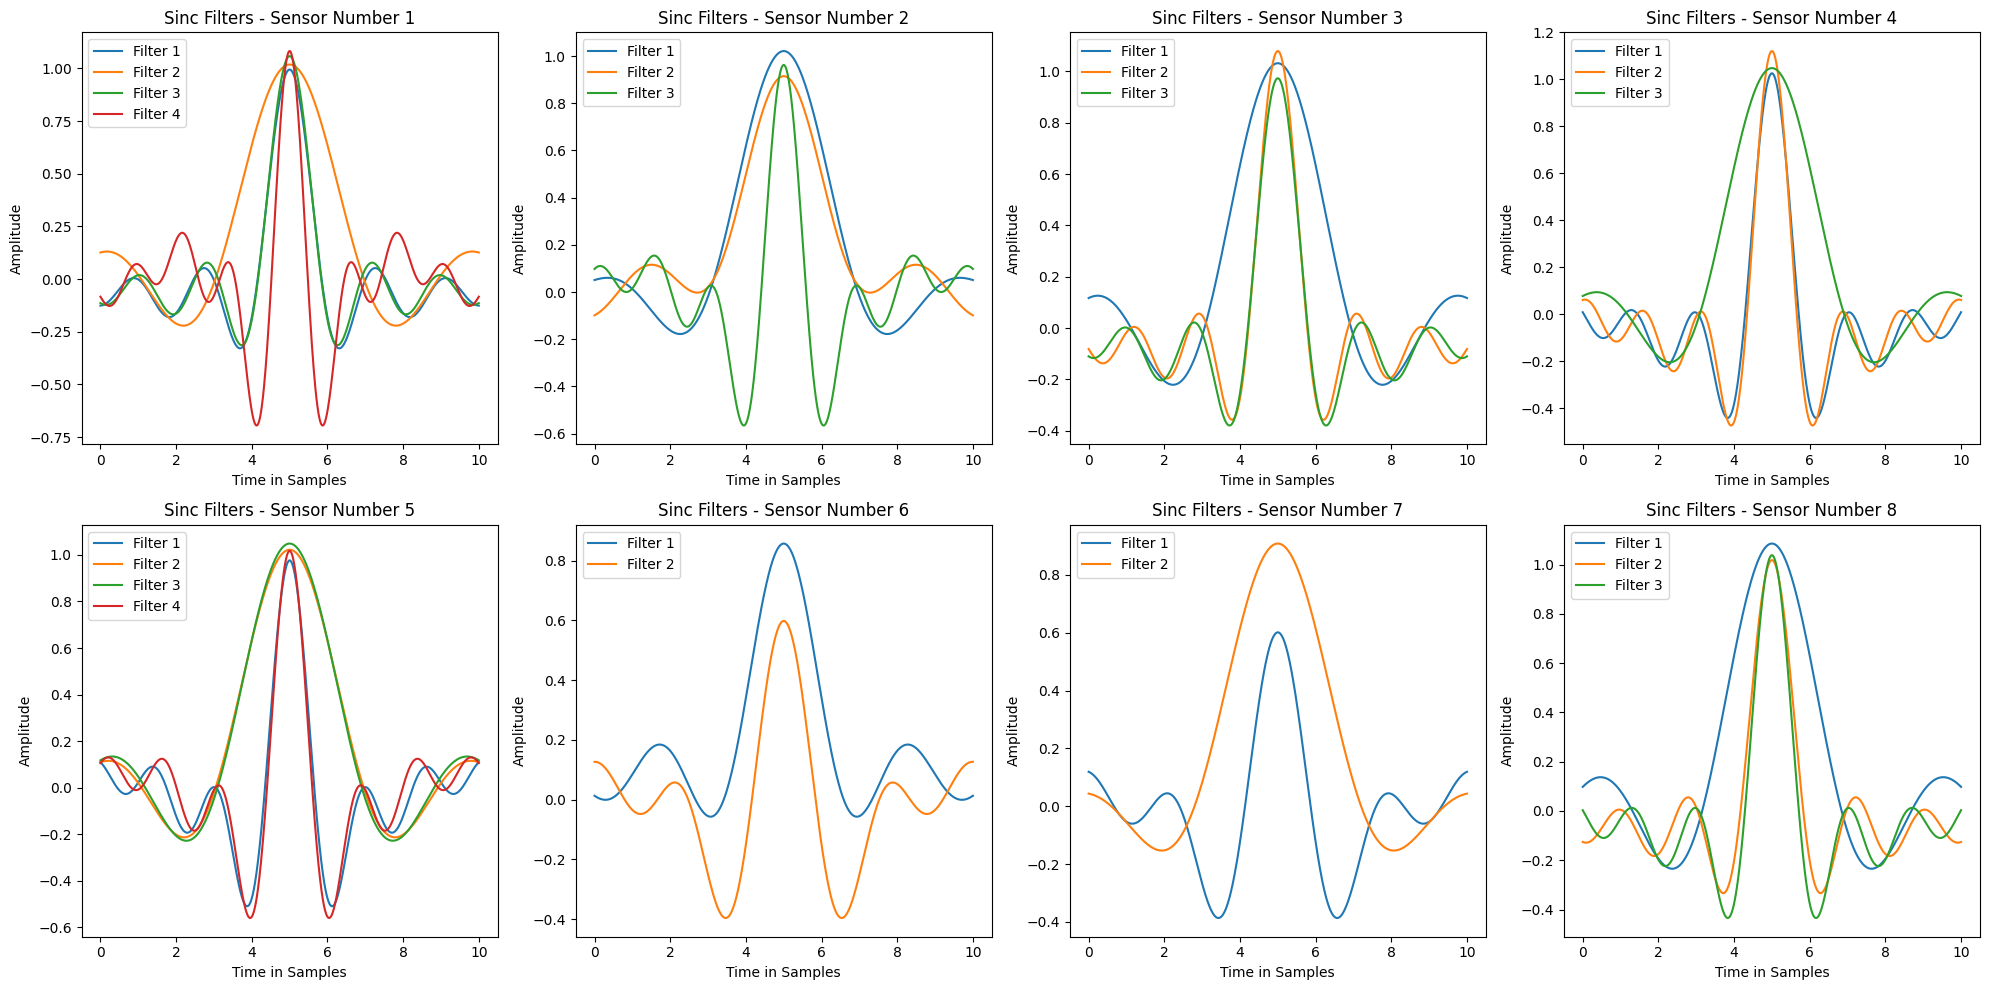

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_filters_times(filter_parameters, fs=100, duration_seconds=1, num_samples=None, save_path=None):
    if num_samples is None:
        num_samples = int(duration_seconds * fs)  # Calculate num_samples based on duration

    t = np.linspace(0, duration_seconds, num_samples)  # Time axis scaled to represent seconds
    freqs = np.fft.fftfreq(num_samples, 1/fs)

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i, (center_freq, bandwidth) in enumerate(filter_parameters):
        filt_beg_freq = np.abs(center_freq) - bandwidth / 2
        filt_end_freq = filt_beg_freq + bandwidth
        low_pass1 = 2 * filt_beg_freq * np.sinc(2 * filt_beg_freq * (t - duration_seconds/2))
        low_pass2 = 2 * filt_end_freq * np.sinc(2 * filt_end_freq * (t - duration_seconds/2))
        band_pass = low_pass2 - low_pass1
        row = i // 4
        col = i % 4
        for j in range(len(center_freq)):
            if len(center_freq)==1:
                line, = axs[row, col].plot(t, band_pass, label=f'Filter {j+1}', color=f'C{j}')
                # Add legend for the filter numbers
                axs[row, col].legend(loc='upper left')
                break
            line, = axs[row, col].plot(t, band_pass[j], label=f'Filter {j+1}', color=f'C{j}')
            # Add legend for the filter numbers
            axs[row, col].legend(loc='upper left')
            # axs[row, col].text(freqs[-1] + 1, np.abs(np.fft.fft(band_pass[j]))[-1], f'Filter {j+1}', verticalalignment='center')
        axs[row, col].set_title(f'Sinc Filters - Sensor Number {i+1}')
        axs[row, col].set_xlabel('Time in Samples')
        axs[row, col].set_ylabel('Amplitude')
        # axs[row, col].set_xlim(0, fs/10)

    plt.tight_layout()
    if save_path:
      plt.savefig(save_path)
    plt.show()

# Assuming you have filter_parameters_all_layers obtained from the previous code block
plot_filters_times(filter_parameters_all_layers, fs=100, duration_seconds=10, save_path="plot_Sinc_filters_times.PDF")

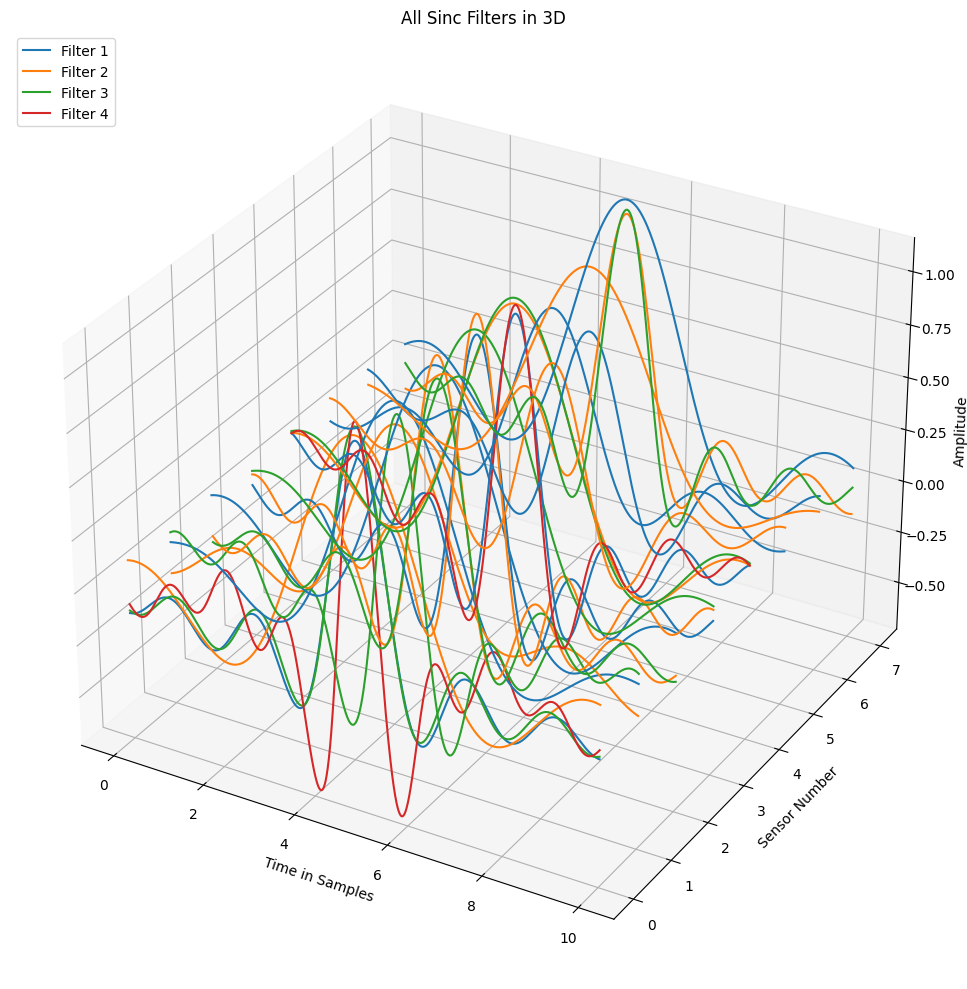

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_filters_3d(filter_parameters, fs=100, duration_seconds=1, num_samples=None, save_path=None):
    if num_samples is None:
        num_samples = int(duration_seconds * fs)  # Calculate num_samples based on duration

    t = np.linspace(0, duration_seconds, num_samples)  # Time axis scaled to represent seconds
    freqs = np.fft.fftfreq(num_samples, 1/fs)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i, (center_freq, bandwidth) in enumerate(filter_parameters):
        filt_beg_freq = np.abs(center_freq) - bandwidth / 2
        filt_end_freq = filt_beg_freq + bandwidth
        low_pass1 = 2 * filt_beg_freq * np.sinc(2 * filt_beg_freq * (t - duration_seconds/2))
        low_pass2 = 2 * filt_end_freq * np.sinc(2 * filt_end_freq * (t - duration_seconds/2))
        band_pass = low_pass2 - low_pass1

        if i == 0:
          for j in range(len(center_freq)):
              ax.plot(t, np.full_like(t, i), band_pass[j], label=f'Filter {j+1}', color=f'C{j}')
        else:
            for j in range(len(center_freq)):
              ax.plot(t, np.full_like(t, i), band_pass[j], color=f'C{j}')

    ax.set_xlabel('Time in Samples')
    ax.set_ylabel('Sensor Number')
    ax.set_zlabel('Amplitude')
    ax.legend(loc='upper left')
    ax.set_title('All Sinc Filters in 3D')
    # plt.legend()
    plt.tight_layout()
    if save_path:
      plt.savefig(save_path)
    plt.show()

# Assuming you have filter_parameters obtained from your code
# Call the function with your filter parameters
plot_filters_3d(filter_parameters_all_layers, fs=100, duration_seconds=10, save_path="plot_Sinc_filters_3d_times.PDF")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_filters(filter_parameters, fs=100, duration_seconds=1, num_samples=None, save_path=None):
    if num_samples is None:
        num_samples = int(duration_seconds * fs)  # Calculate num_samples based on duration

    t = np.linspace(0, duration_seconds, num_samples)  # Time axis scaled to represent seconds
    freqs = np.fft.fftfreq(num_samples, 1/fs)

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i, (bandwidth, center_freq) in enumerate(filter_parameters):
        filt_beg_freq = np.abs(center_freq) - bandwidth / 2
        filt_end_freq = filt_beg_freq + bandwidth
        low_pass1 = 2 * filt_beg_freq * np.sinc(2 * filt_beg_freq * (t - duration_seconds/2))
        low_pass2 = 2 * filt_end_freq * np.sinc(2 * filt_end_freq * (t - duration_seconds/2))
        band_pass = low_pass2 - low_pass1
        row = i // 4
        col = i % 4

        for j in range(len(center_freq)):
            if len(center_freq)==1:
              line, = axs[row, col].plot(freqs, np.abs(np.fft.fft(band_pass)), label=f'Filter {j+1}', color=f'C{j}')
              break
            line, = axs[row, col].plot(freqs, np.abs(np.fft.fft(band_pass[j])), label=f'Filter {j+1}', color=f'C{j}')
            # axs[row, col].text(freqs[-1] + 1, np.abs(np.fft.fft(band_pass[j]))[-1], f'Filter {j+1}', verticalalignment='center')
            axs[row, col].legend(loc='upper left')
        axs[row, col].set_title(f'Frequency Filter Responses - Sensor Number {i+1}')
        axs[row, col].set_xlabel('Frequency (Hz)')
        axs[row, col].set_xlim(0, 1)  # Set y-axis limits to [0, 1]
        axs[row, col].set_ylabel('Amplitude')
        # axs[row, col].set_xlim(0, fs/20)


    plt.tight_layout()
    if save_path:
      plt.savefig(save_path)
    plt.show()


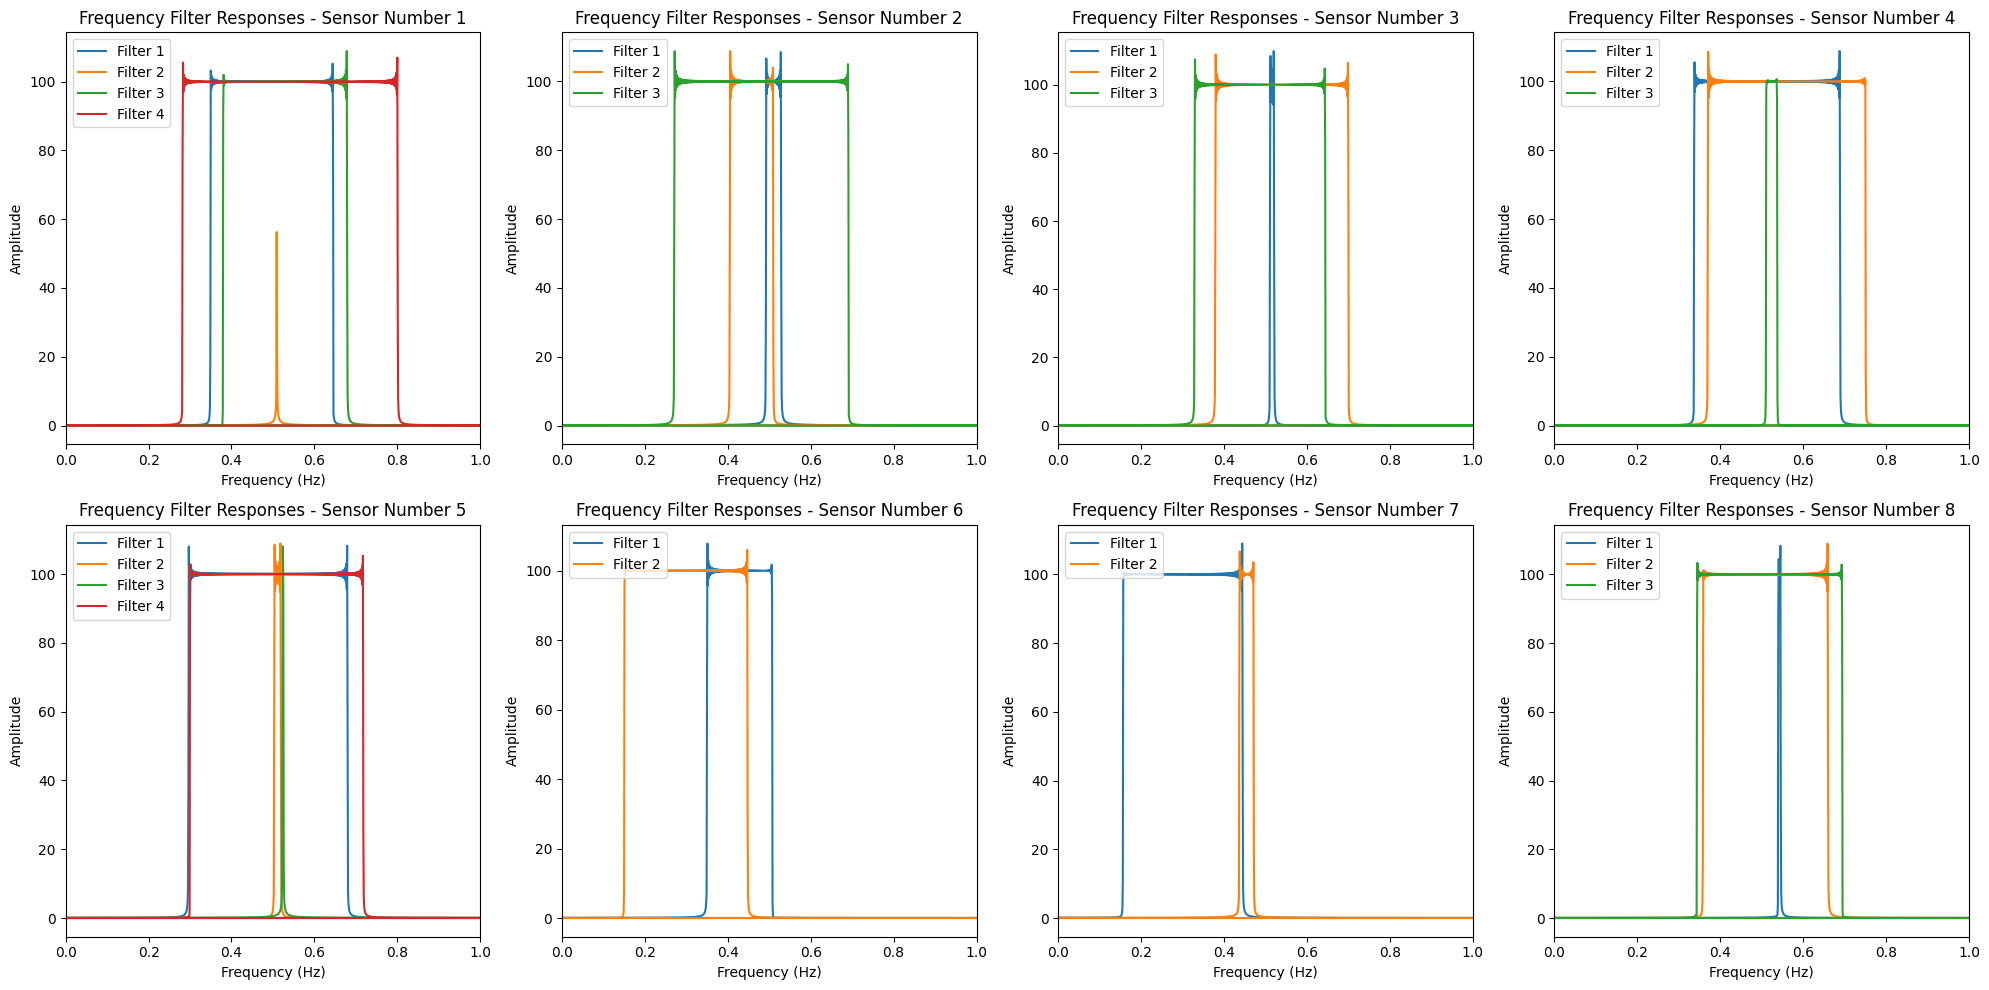

In [ ]:
# Assuming you have filter_parameters_all_layers obtained from the previous code block
plot_filters(filter_parameters_all_layers, fs=100, duration_seconds=1000, save_path="plot_Sinc_filters_Frequency.PDF")

In [ ]:
top_weights = []

# Print the original indices of the top 20 percent energy differences
print("Original indices of the top 20 percent energy differences:")
for item in top_20_percent_indices_original:
    print(item)
    print(f"Sensor Number: {item[0] + 1}, Filter Number: {item[1] + 1}, Energy Diff: {energy_diff[item[0]][item[1]]}")
    center_frequency, bandwidth = filter_parameters_all_layers[item[0]][0][item[1]], filter_parameters_all_layers[item[0]][1][item[1]]
    print(f"Center Frequency: {center_frequency}, Bandwidth: {bandwidth}")
    print()

    top_weights.append((center_frequency, bandwidth))

Original indices of the top 20 percent energy differences:
(6, 1)
Sensor Number: 7, Filter Number: 2, Energy Diff: 7.936375141143799
Center Frequency: [0.03492282], Bandwidth: [0.4542342]

(1, 1)
Sensor Number: 2, Filter Number: 2, Energy Diff: 7.440013885498047
Center Frequency: [-0.10473162], Bandwidth: [0.45733836]

(5, 0)
Sensor Number: 6, Filter Number: 1, Energy Diff: 4.025304794311523
Center Frequency: [0.15763022], Bandwidth: [0.42865327]

(6, 0)
Sensor Number: 7, Filter Number: 1, Energy Diff: 3.7101683616638184
Center Frequency: [0.28856203], Bandwidth: [0.3007079]



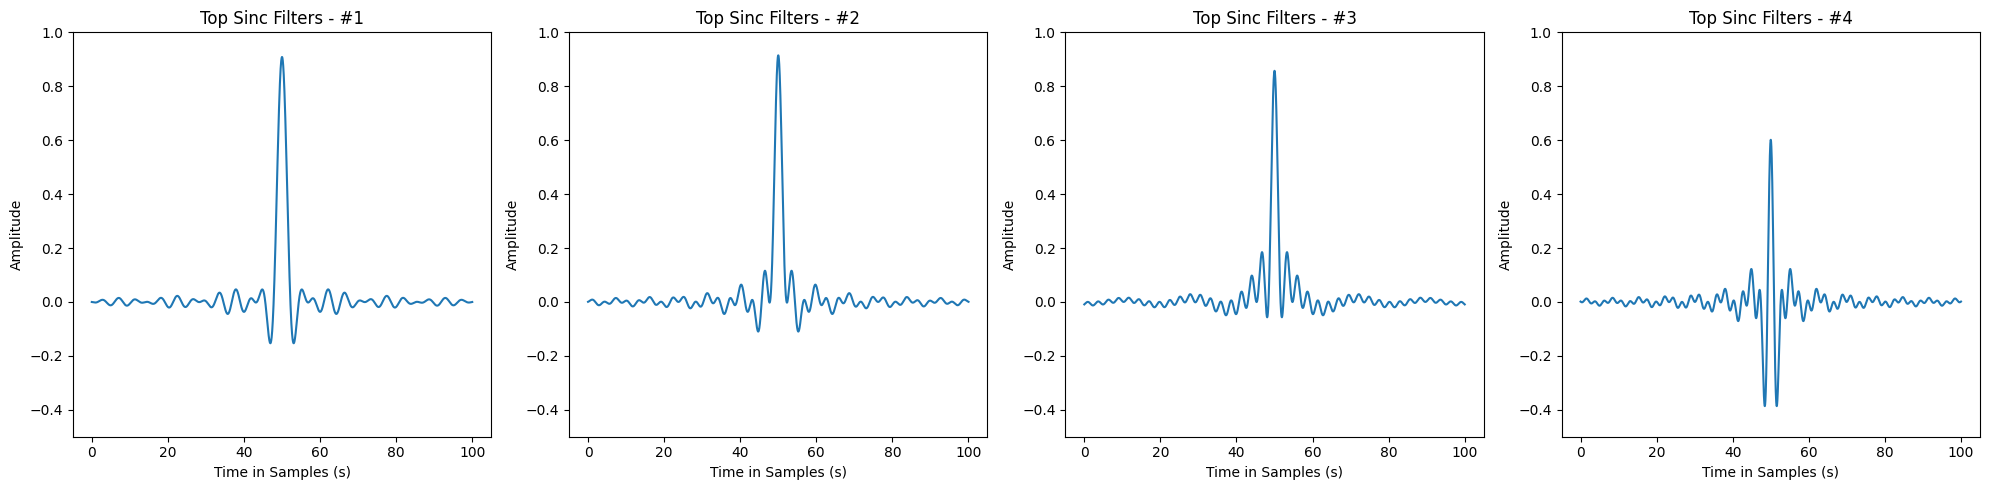

In [ ]:
def plot_top_filters_in_times(filter_parameters, fs=100, duration_seconds=1, num_samples=None, save_path=None):
    if num_samples is None:
        num_samples = int(duration_seconds * fs)  # Calculate num_samples based on duration

    t = np.linspace(0, duration_seconds, num_samples)  # Time axis scaled to represent seconds
    freqs = np.fft.fftfreq(num_samples, 1/fs)

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, (center_freq, bandwidth) in enumerate(filter_parameters):
        filt_beg_freq = np.abs(center_freq) - bandwidth / 2
        filt_end_freq = filt_beg_freq + bandwidth
        low_pass1 = 2 * filt_beg_freq * np.sinc(2 * filt_beg_freq * (t - duration_seconds/2))
        low_pass2 = 2 * filt_end_freq * np.sinc(2 * filt_end_freq * (t - duration_seconds/2))
        band_pass = low_pass2 - low_pass1
        for j in range(len(center_freq)):
            if len(center_freq) == 1:
                line, = axs[i].plot(t, band_pass)
                break
            line, = axs[i].plot(t, band_pass[j])
        axs[i].set_title(f'Top Sinc Filters - #{i+1}')
        axs[i].set_xlabel('Time in Samples (s)')
        axs[i].set_ylabel('Amplitude')
        axs[i].set_ylim(-0.5, 1)


    plt.tight_layout()
    if save_path:
      plt.savefig(save_path)
    plt.show()

# Assuming you have top_weights obtained from your code
# Call the function with your top filter parameters
plot_top_filters_in_times(top_weights, fs=100, duration_seconds=100, save_path="top__Sinc_filters_in_times.PDF")


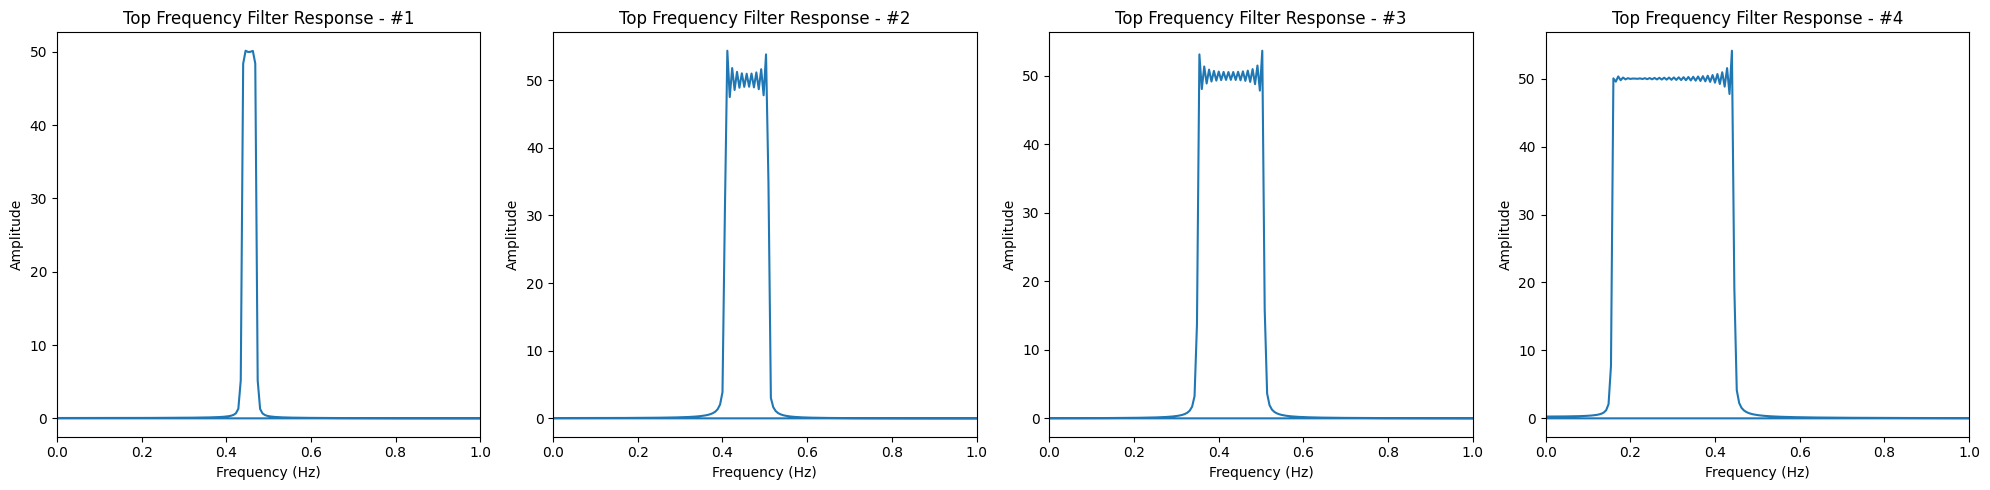

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_top_filters_in_frequency(filter_parameters, fs=100, duration_seconds=1, num_samples=None, save_path=None):
    if num_samples is None:
        num_samples = int(duration_seconds * fs)  # Calculate num_samples based on duration

    t = np.linspace(0, duration_seconds, num_samples)  # Time axis scaled to represent seconds
    freqs = np.fft.fftfreq(num_samples, 1/fs)

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, (bandwidth, center_freq) in enumerate(filter_parameters):
        filt_beg_freq = np.abs(center_freq) - bandwidth / 2
        filt_end_freq = filt_beg_freq + bandwidth
        low_pass1 = 2 * filt_beg_freq * np.sinc(2 * filt_beg_freq * (t - duration_seconds/2))
        low_pass2 = 2 * filt_end_freq * np.sinc(2 * filt_end_freq * (t - duration_seconds/2))
        band_pass = low_pass2 - low_pass1
        for j in range(len(center_freq)):
            if len(center_freq) == 1:
                line, = axs[i].plot(freqs, np.abs(np.fft.fft(band_pass)))
                break
            line, = axs[i].plot(freqs, np.abs(np.fft.fft(band_pass[j])))
        axs[i].set_title(f'Top Frequency Filter Response - #{i+1}')
        axs[i].set_xlabel('Frequency (Hz)')
        axs[i].set_ylabel('Amplitude')
        axs[i].set_xlim(0, 1)

    plt.tight_layout()
    if save_path:
      plt.savefig(save_path)
    plt.show()

# Assuming you have top_weights obtained from your code
# Call the function with your top filter parameters
plot_top_filters_in_frequency(top_weights, fs=50, duration_seconds=175, save_path="top_filters_in_frequency.PDF")


# Sevirity Model

##PreProcessing


In [ ]:
demographics = pd.read_excel('demographics.xls')
data_frames2=data_frames

In [ ]:
demographics['ID']

In [ ]:
for file in raw_data:
   data_frames2[file]['label']=demographics[demographics['ID'] == file[:-7]]['HoehnYahr'].values[0]

In [ ]:
def split_dataframe(df, chunk_size=1000):
    return [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Split each DataFrame into chunks of 1000 rows
chunked_data_frames_2 = {}
for file, df in data_frames2.items():
    chunks = split_dataframe(df, chunk_size=1000)
    for i, chunk in enumerate(chunks):
        chunked_data_frames_2[f"{file}_chunk_{i + 1}"] = chunk

In [ ]:
import numpy as np

filtered_data_frames_2 = {}

# filtering
for key, chunk_df in chunked_data_frames_2.items():
    if chunk_df.shape == (1000, 20):
        filtered_data_frames_2[key] = chunk_df



result_array_2 = np.empty((len(filtered_data_frames_2), *next(iter(filtered_data_frames_2.values())).shape), dtype=object)

# Iterate over the keys and values of chunked_data_frames
for i, (key, chunk_df) in enumerate(filtered_data_frames_2.items()):
    # Store the data in the numpy array
    result_array_2[i, ...] = chunk_df.values


# Print the shape of the resulting array
print(f"Shape of result_array: {result_array_2.shape}")


In [ ]:
left_minus_right_2 = np.empty((len(filtered_data_frames_2), 1000,9),dtype=object)
for i in range(len(result_array_2)):
  for j in range(1, 9):
        Left_VGRF = result_array_2[i][:,j]
        Right_VGRF = result_array_2[i][:,j+8]
        diffrence=Left_VGRF - Right_VGRF
        left_minus_right_2[i][:,j-1]=diffrence
  left_minus_right_2[i][:,8]=result_array_2[i][:,19]
print(left_minus_right_2.shape)


In [ ]:
X_2 = left_minus_right_2[:, :,:8]
y_2 = left_minus_right_2[:, :,8]
temp_y_2 = np.empty((y_2.shape[0]))
for i in range(y_2.shape[0]):
      temp_y_2[i] = y_2[i][0] if not None else 0

y_2 = temp_y_2

In [ ]:
y_2

In [ ]:
from collections import Counter

y_2 = np.nan_to_num(y_2, nan=0)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.1, random_state=42, stratify=y_2)

# Assuming y_train and y_test are your label arrays
y_train_int_2 = y_train_2.astype(float)
y_test_int_2 = y_test_2.astype(float)

train_label_counts = Counter(y_train_int_2)
test_label_counts = Counter(y_test_int_2)

numbers = [1, 2, 3, 4]
labels = ['1', '2', '2.5', '3']

train_count= list(train_label_counts.values())
test_count=list(test_label_counts.values())



print("Train Label Distribution:")
print(train_label_counts)

print("\nTest Label Distribution:")
print(test_label_counts)

# Plotting histograms for visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(numbers,train_count)
plt.title('Train Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(numbers, labels)


plt.subplot(1, 2, 2)
plt.bar(numbers,test_count)
plt.title('Test Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(numbers, labels)

plt.show()


In [ ]:
new_array_2 = np.transpose(X_train_2, (0, 2, 1))
new_array_2=new_array_2.reshape((X_train_2.shape[0], 8000))
X_train_2 = np.asarray(new_array_2).astype('float32')
y_train_2 = np.asarray(y_train_2).astype('float32')
print(X_train_2.shape)
X_train_2=normalize_array(X_train_2)

In [ ]:
y_train_2.shape
from sklearn.preprocessing import OneHotEncoder

arr_reshaped = y_train_2.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the array
one_hot_encoded = encoder.fit_transform(arr_reshaped)
print(one_hot_encoded[0],y_train_2[0])

In [ ]:

X_test_2=normalize_array(X_test_2)
new_array_2 = np.transpose(X_test_2, (0, 2, 1))
new_array_2=new_array_2.reshape((X_test_2.shape[0], 8000))
X_test_2 = np.asarray(new_array_2).astype('float32')

arr_reshaped = y_test_2.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)

one_hot_encoded_test = encoder.fit_transform(arr_reshaped)

##Creting Model (not transform)

In [ ]:
#model 2 from sincNet atricle for sevirity
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D,Dropout
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Flatten, MaxPooling1D, Input,Concatenate
from tensorflow.keras.utils import plot_model
from sincnet_tensorflow import SincConv1D, LayerNorm
import numpy as np


out_dim = 2 #number of classes

inputs = Input((8000,1))
split_tensors = tf.split(inputs, num_or_size_splits=8, axis=1)
list_of_sincs=[]
for i in split_tensors:
  x = SincConv1D(N_filt=100,
                        Filt_dim=101,
                        fs=100, #freq
                        stride=5, #16,
                        padding="SAME")(i)
  x = LayerNorm()(x)
  # x = BatchNormalization(momentum=0.05)(x)
  x = LeakyReLU(alpha=0.2)(x)
  # x = Dropout(rate=0.5)(x)
  x = MaxPooling1D(pool_size=2)(x)
  list_of_sincs.append(x)
x = Concatenate(axis=-1)(list_of_sincs)



x = Conv1D(32, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)




x = Flatten()(x)

x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

prediction = Dense(4, activation='softmax')(x)
model_sevirity = tf.keras.models.Model(inputs=inputs, outputs=prediction)

model_sevirity.summary()
plot_model(model_sevirity, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_sevirity.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

history2_2 = model_sevirity.fit(X_train_2,
                    one_hot_encoded,
                    batch_size=32,
                    epochs=200,
                    validation_split=0.2
                    ,callbacks=[early_stopping])

In [ ]:
plt.figure(figsize=(24, 10))

# Plot Training Accuracy 2
plt.subplot(1, 4, 1)
plt.plot(history2_2.history['accuracy'], label='Training Accuracy')
plt.plot(history2_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 4, 2)
plt.plot(history2_2.history['loss'][5:], label='Training Loss')
plt.plot(history2_2.history['val_loss'][5:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(1, 4, 3)
# plt.plot(history2_2.history['precision'], label='Training precision')
# plt.plot(history2_2.history['val_precision'], label='Validation precision')
# plt.xlabel('Epoch')
# plt.ylabel('precision')
# plt.title('Training and Validation precision')
# plt.legend()

# plt.subplot(1, 4, 4)
# plt.plot(history2_2.history['recall'], label='Training recall')
# plt.plot(history2_2.history['val_recall'], label='Validation recall')
# plt.xlabel('Epoch')
# plt.ylabel('recall')
# plt.title('Training and Validation recall')
# plt.legend()

plt.show()

Test acc

In [ ]:


results_sevirity = model_sevirity.evaluate(X_test_2, one_hot_encoded_test, batch_size=32)


Train acc

In [ ]:
model_sevirity.evaluate(X_train_2, one_hot_encoded, batch_size=32)


In [ ]:
model_sevirity.save("model_sevirity")

## Clustering for Sevirity

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract filter data for the 'sinc_conv1d' layer
filter_data = get_filter_data(model_sevirity, 'sinc_conv1d')

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Calculate inertia for different values of k
def calculate_inertia(data, k_values):
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia = kmeans.inertia_
        inertias.append(inertia)
    return inertias

# Define range of k values to try
k_values = range(5, 41)

# Calculate inertia for each k value
inertias = calculate_inertia(filter_data, k_values)

# Plot inertia
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)
plt.show()

NameError: name 'get_filter_data' is not defined

In [ ]:
# Choose the optimal k value
optimal_k = 15

# Fit KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(filter_data)

# Get centroids (cluster centers)
centroids = kmeans.cluster_centers_

In [ ]:
# Plot each filter's frequency response curve
plt.figure(figsize=(15, 6))
for i, centroid in enumerate(centroids):
    # Extract f1 and f2 parameters for the current filter
    f1 = centroid[0]
    f2 = centroid[1]

    # Create the frequency response curve for the current filter
    t = np.linspace(0, 1, 101)
    h = np.sinc(2 * f2 * (t - 0.5)) * np.hamming(101)  # Sinc filter
    h *= 0.5 * (1 + np.cos(2 * np.pi * f1 * (t - 0.5)))  # Bandpass modulation

    # Plot the frequency response curve
    plt.subplot(3, 5, i + 1)
    plt.plot(t, h)
    plt.title(f'Centroid {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Weight Value')
plt.tight_layout()
plt.show()


In [ ]:
# Plot the centroids and the main 100 filters using scatter plot
plt.figure(figsize=(8, 6))

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', label='Centroids')

# Plot main 100 filters
plt.scatter(filter_data[:, 0], filter_data[:, 1], color='blue', label='Main Filters', alpha=0.3)

plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Centroids and Main Filters')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Save the centroids for the current layer
np.save('sinc_conv1d_centroids_sevirity.npy', centroids)


In [ ]:
# Create an empty list to store centroids for all layers
all_centroids = []

# Loop through all layers from sinc_conv1d_1 to sinc_conv1d_7
for layer_name in ['sinc_conv1d_1', 'sinc_conv1d_2', 'sinc_conv1d_3',
                   'sinc_conv1d_4', 'sinc_conv1d_5', 'sinc_conv1d_6', 'sinc_conv1d_7']:
    # Extract filter data for the current layer
    filter_data = get_filter_data(model_sevirity, layer_name)

    # Fit KMeans to find centroids for the current layer
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(filter_data)

    # Get centroids (cluster centers) for the current layer
    centroids = kmeans.cluster_centers_

    # Save centroids for the current layer
    np.save(f'{layer_name}_centroids_sevirity.npy', centroids)

    # Append centroids to the list of all centroids
    all_centroids.append(centroids)

# Convert the list of centroids to a numpy array
all_centroids = np.array(all_centroids)


In [ ]:
import matplotlib.pyplot as plt

# Define the number of centroids
num_centroids = 15

# Create subplots with two plots per row
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Loop through each layer
for layer_index, layer_name in enumerate(['sinc_conv1d'] + [f'sinc_conv1d_{i}' for i in range(1, 8)]):
    # Load the layer weights
    layer_weights = get_filter_data(model2, layer_name)

    # Load the centroids
    centroids = np.load(f'{layer_name}_centroids.npy')

    # Calculate subplot index
    row = layer_index // 2
    col = layer_index % 2

    # Create a scatter plot
    axs[row, col].scatter(layer_weights[:, 0], layer_weights[:, 1], c='blue', alpha=0.5, label='Layer Weights')
    axs[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    axs[row, col].set_title(f'Scatter Plot of Layer {layer_name}')
    axs[row, col].set_xlabel('Parameter 1')
    axs[row, col].set_ylabel('Parameter 2')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


#Transfer sevirity

In [ ]:
  # Define the new model architecture with 15 filters in each SincConv1D layer
all_optimal_k_values={}
all_optimal_k_values['sinc_conv1d']=4
all_optimal_k_values['sinc_conv1d_1'] = 3
all_optimal_k_values['sinc_conv1d_2'] = 3
all_optimal_k_values['sinc_conv1d_3'] = 3
all_optimal_k_values['sinc_conv1d_4'] = 4
all_optimal_k_values['sinc_conv1d_5'] = 2
all_optimal_k_values['sinc_conv1d_6'] = 2
all_optimal_k_values['sinc_conv1d_7'] = 3
def create_new_model_sevirity(input_shape):
    inputs = Input(shape=input_shape)
    split_tensors = tf.split(inputs, num_or_size_splits=8, axis=1)
    list_of_sincs = []
    for i, split_tensor in enumerate(split_tensors):
        if i == 0:
            layer_name = 'sinc_conv1d'
        else:
            layer_name = f'sinc_conv1d_{i}'
        x = SincConv1D(N_filt=all_optimal_k_values[layer_name],
                       Filt_dim=101,
                       fs=100,
                       stride=5,
                       padding="SAME", name=layer_name)(split_tensor)
        x = LayerNorm()(x)
        x = LeakyReLU(alpha=0.2)(x)
        x = MaxPooling1D(pool_size=2)(x)
        list_of_sincs.append(x)

    x = Concatenate(axis=-1)(list_of_sincs)
    x = Conv1D(512, 3, strides=1, padding='valid')(x)
    x = BatchNormalization(momentum=0.05)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(rate=0.5)(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(1024, 3, strides=1, padding='valid')(x)
    x = BatchNormalization(momentum=0.05)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(rate=0.5)(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Flatten()(x)

    x = Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
    x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
    x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
    x = LeakyReLU(alpha=0.2)(x)

    prediction = Dense(4, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=prediction)
    return model

# def create_new_model_sevirity(input_shape):
#       inputs = Input(shape=input_shape)
#       split_tensors = tf.split(inputs, num_or_size_splits=8, axis=1)
#       list_of_sincs = []

#       for i, split_tensor in enumerate(split_tensors):
#           if i == 0:
#               layer_name = 'sinc_conv1d'
#           else:
#               layer_name = f'sinc_conv1d_{i}'
#           x = SincConv1D(N_filt=15,
#                         Filt_dim=101,
#                         fs=100,
#                         stride=5,
#                         padding="SAME", name=layer_name)(split_tensor)
#           x = LayerNorm()(x)
#           x = LeakyReLU(alpha=0.2)(x)
#           x = MaxPooling1D(pool_size=2)(x)
#           list_of_sincs.append(x)

#       x = Concatenate(axis=-1)(list_of_sincs)
#       x = Conv1D(32, 3, strides=1, padding='valid')(x)
#       x = BatchNormalization(momentum=0.05)(x)
#       x = LeakyReLU(alpha=0.2)(x)
#       x = MaxPooling1D(pool_size=2)(x)

#       x = Conv1D(64, 3, strides=1, padding='valid')(x)
#       x = BatchNormalization(momentum=0.05)(x)
#       x = LeakyReLU(alpha=0.2)(x)
#       x = MaxPooling1D(pool_size=2)(x)




#       x = Flatten()(x)

#       x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
#       x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
#       x = LeakyReLU(alpha=0.2)(x)

#       x = Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
#       x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
#       x = LeakyReLU(alpha=0.2)(x)

#       x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.3))(x)
#       x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
#       x = LeakyReLU(alpha=0.2)(x)

#       prediction = Dense(4, activation='softmax')(x)

#       model = tf.keras.models.Model(inputs=inputs, outputs=prediction)
#       return model

  # Create the new model
input_shape = (8000, 1)  # Adjust according to your input shape
new_model_sevirity = create_new_model_sevirity(input_shape)

In [ ]:
pre_train=load_model("sicnet_new1")

In [ ]:
#pure transfer
for i in range(len(pre_train.layers)-1):
    new_model_sevirity.layers[i].set_weights(pre_train.layers[i].get_weights())
for layer in new_model_sevirity.layers[:36]:
    layer.trainable = False

ValueError: Layer conv1d_4 weight shape (3, 24, 512) is not compatible with provided weight shape (3, 24, 128).

In [ ]:
pre_train.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8000, 1)]            0         []                            
                                                                                                  
 tf.split_5 (TFOpLambda)     [(None, 1000, 1),            0         ['input_3[0][0]']             
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                

In [ ]:
#complex model
for i in range(35):
    new_model_sevirity.layers[i].set_weights(pre_train.layers[i].get_weights())
for layer in new_model_sevirity.layers[:35]:
    layer.trainable = False

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8000, 1)]            0         []                            
                                                                                                  
 tf.split_6 (TFOpLambda)     [(None, 1000, 1),            0         ['input_3[0][0]']             
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                              

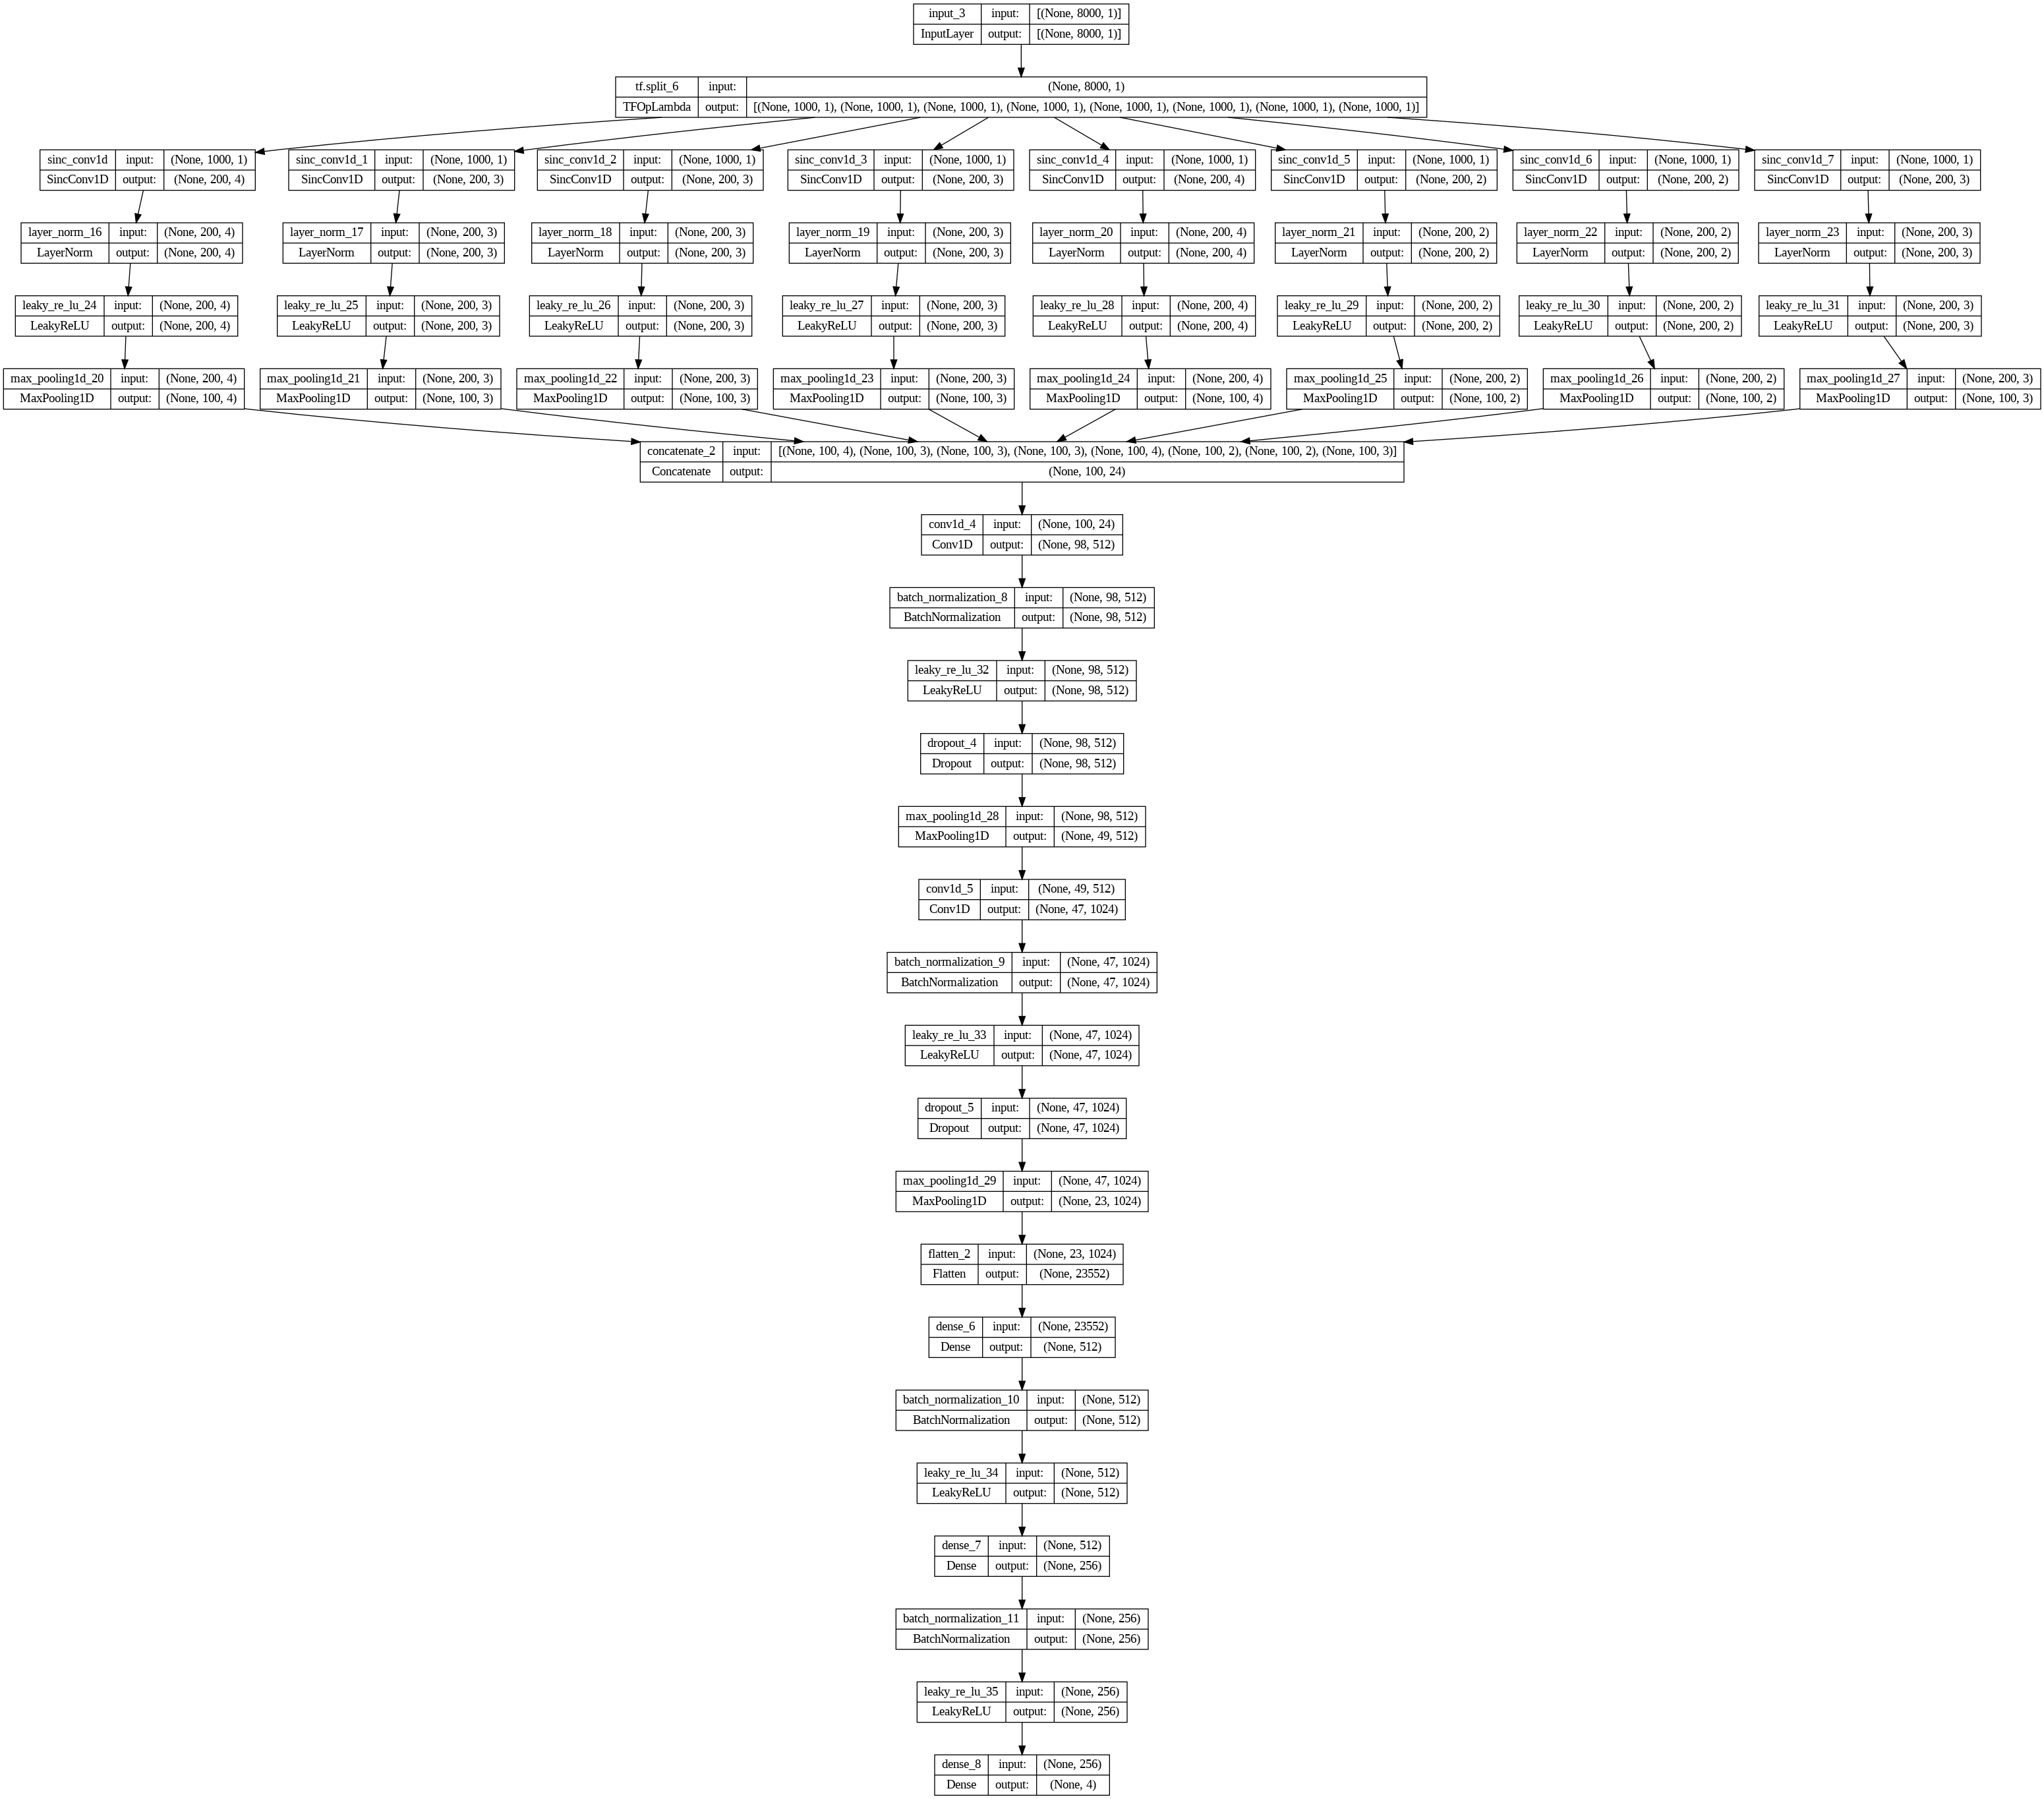

In [ ]:
new_model_sevirity.summary()
plot_model(new_model_sevirity, to_file='new_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
new_model_sevirity.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy",precision,recall])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=200, restore_best_weights=True)

new_history_sevirity = new_model_sevirity.fit(X_train_2,
                    one_hot_encoded,
                    batch_size=32,
                    epochs=1000,
                    validation_split=0.2
                    ,callbacks=[early_stopping])

# new_model_sevirity.save("model_sevirity_new")

Epoch 1/1000
73/73 [==============================] - 19s 59ms/step - loss: 58.7546 - accuracy: 0.4128 - precision: 0.5338 - recall: 0.3993 - val_loss: 6.3793 - val_accuracy: 0.4425 - val_precision: 0.4924 - val_recall: 0.3328
Epoch 2/1000
73/73 [==============================] - 2s 24ms/step - loss: 3.2970 - accuracy: 0.5318 - precision: 0.5635 - recall: 0.4515 - val_loss: 1.9178 - val_accuracy: 0.4957 - val_precision: 0.6188 - val_recall: 0.3619
Epoch 3/1000
73/73 [==============================] - 2s 23ms/step - loss: 2.1842 - accuracy: 0.5820 - precision: 0.6266 - recall: 0.5189 - val_loss: 2.6999 - val_accuracy: 0.4545 - val_precision: 0.6093 - val_recall: 0.2916
Epoch 4/1000
73/73 [==============================] - 2s 25ms/step - loss: 2.3448 - accuracy: 0.6289 - precision: 0.6813 - recall: 0.5722 - val_loss: 2.9873 - val_accuracy: 0.5283 - val_precision: 0.5590 - val_recall: 0.4957
Epoch 5/1000
73/73 [==============================] - 2s 30ms/step - loss: 2.4666 - accuracy: 0.67

In [ ]:
results_sevirity = new_model_sevirity.evaluate(X_test_2, one_hot_encoded_test, batch_size=32)


11/11 [==============================] - 0s 15ms/step - loss: 0.3107 - accuracy: 0.9599 - precision: 0.9599 - recall: 0.9599


In [ ]:
new_model_sevirity.save("model_sevirity_new")

In [ ]:
# Load the weights of the centroids for each layer and set them as initial weights for the corresponding SincConv1D layers
for layer_index, layer_name in enumerate(['sinc_conv1d'] + [f'sinc_conv1d_{i}' for i in range(1, 8)]):
    centroids = np.load(f'{layer_name}_centroids_sevirity.npy')
    filt_b1 = centroids[:, 0].reshape(-1, 1)
    filt_band = centroids[:, 1].reshape(-1, 1)
    sinc_conv_layer = new_model.get_layer(layer_name)
    sinc_conv_layer.set_weights([filt_b1, filt_band])


In [ ]:

## do not run these cells again!!!!

plt.figure(figsize=(24, 10))

# Plot Training Accuracy 2
plt.subplot(1, 4, 1)


plt.plot(new_history_sevirity.history['accuracy'], label='Training Accuracy')
plt.plot(new_history_sevirity.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 4, 2)
plt.plot(new_history_sevirity.history['loss'][5:], label='Training Loss')
plt.plot(new_history_sevirity.history['val_loss'][5:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(1, 4, 3)
plt.plot(new_history_sevirity.history['precision'], label='Training precision')
plt.plot(new_history_sevirity.history['val_precision'], label='Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.title('Training and Validation precision')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(new_history_sevirity.history['recall'], label='Training recall')
plt.plot(new_history_sevirity.history['val_recall'], label='Validation recall')
plt.xlabel('Epoch')
plt.ylabel('recall')
plt.title('Training and Validation recall')
plt.legend()

plt.show()

#Results

In [ ]:
cd images

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score,accuracy_score

##First Model

11/11 [==============================] - 1s 99ms/step


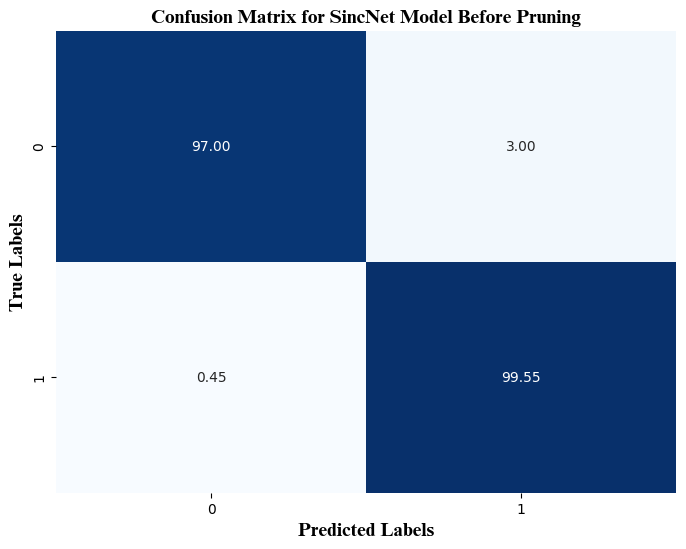

Accuracy: 0.9876543209876543
Precision: 0.9867256637168141
Recall: 0.9955357142857143
F1 Score: 0.991111111111111


In [ ]:


y_pred = model2.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy=accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


conf_matrix = confusion_matrix(y_test, y_pred_binary)

total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels',fontproperties=font_prop)
plt.ylabel('True Labels',fontproperties=font_prop)
plt.title('Confusion Matrix for SincNet Model Before Pruning',fontproperties=font_prop)
plt.savefig('confusion_matrix_Before_pruning.pdf')
plt.show()

print("Accuracy:",accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("F1 Score:",f1)

##Second Model (After Pruning)

In [ ]:
#maybe temp
new_model=load_model('sicnet_new')

11/11 [==============================] - 1s 62ms/step


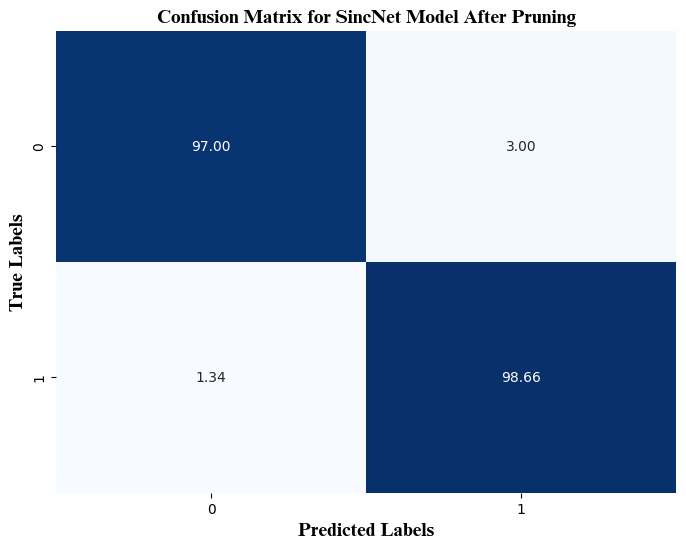

Accuracy: 0.9814814814814815
Precision: 0.9866071428571429
Recall: 0.9866071428571429
F1 Score: 0.9866071428571429


In [ ]:
y_pred = new_model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy=accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

conf_matrix = confusion_matrix(y_test, y_pred_binary)



total_samples = np.sum(conf_matrix)
#conf_matrix_percent = conf_matrix.astype('float') / total_samples * 100


conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels',fontproperties=font_prop)
plt.ylabel('True Labels',fontproperties=font_prop)
plt.title('Confusion Matrix for SincNet Model After Pruning',fontproperties=font_prop)
plt.savefig('confusion_matrix_After_pruning.pdf')
plt.show()

print("Accuracy:",accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("F1 Score:",f1)

##Severity

In [ ]:
#maybe temp
new_model_sevirity=load_model("model_sevirity_new")



results_sevirity = new_model_sevirity.evaluate(X_test_2, one_hot_encoded_test, batch_size=32)


11/11 [==============================] - 1s 60ms/step - loss: 0.3528 - accuracy: 0.9722 - precision: 0.9783 - recall: 0.9722


In [ ]:
new_model_sevirity.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8000, 1)]            0         []                            
                                                                                                  
 tf.split_7 (TFOpLambda)     [(None, 1000, 1),            0         ['input_4[0][0]']             
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                                    
                              (None, 1000, 1),                                              

11/11 [==============================] - 2s 138ms/step


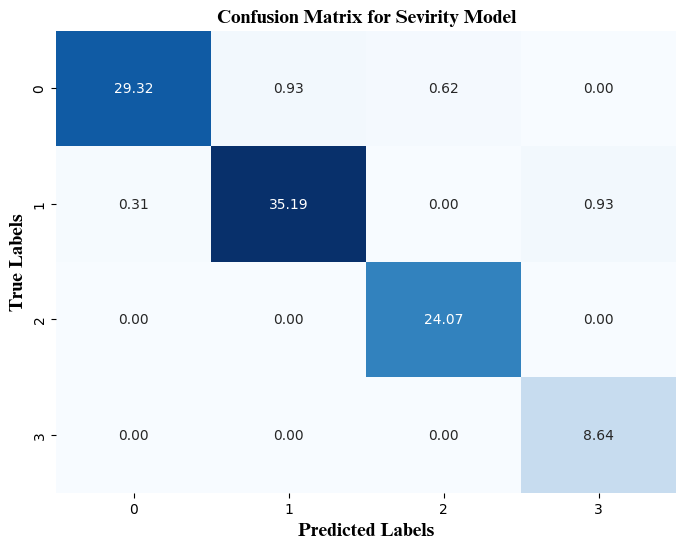

Accuracy: 0.9722222222222222
Precision: 0.9730648607664738
Recall: 0.9722222222222222
F1 Score: 0.9722617632946653


In [ ]:
y_pred = new_model_sevirity.predict(X_test_2)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred,axis=1)

# Get the true classes
y_true_classes = np.argmax(one_hot_encoded_test,axis=1)  # Assuming y_test is one-hot encoded

accuracy=accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes,average="weighted")
recall = recall_score(y_true_classes, y_pred_classes,average="weighted")
f1 = f1_score(y_true_classes, y_pred_classes,average="weighted")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

total_samples = np.sum(conf_matrix)
#conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_percent = conf_matrix.astype('float') / total_samples * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels',fontproperties=font_prop)
plt.ylabel('True Labels',fontproperties=font_prop)
plt.title('Confusion Matrix for Sevirity Model',fontproperties=font_prop)
plt.savefig('confusion_matrix_Severity.pdf')
plt.show()

print("Accuracy:",accuracy)

print('Precision:', precision)
print('Recall:', recall)
print("F1 Score:",f1)

##Shall Be Deleted

11/11 [==============================] - 0s 6ms/step


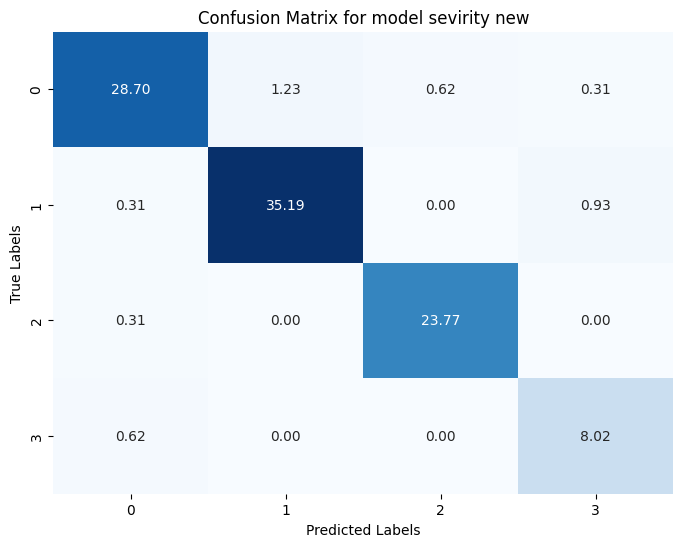

In [ ]:
# y_pred = model_sevirity_new.predict(X_test_2)

# # Get the predicted classes
# y_pred_classes = np.argmax(y_pred,axis=1)

# # Get the true classes
# y_true_classes = np.argmax(one_hot_encoded_test,axis=1)  # Assuming y_test is one-hot encoded

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# total_samples = np.sum(conf_matrix)
# conf_matrix_percent = conf_matrix.astype('float') / total_samples * 100

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for model sevirity new')
# plt.show()

In [ ]:
history=np.load("my_history.npy", allow_pickle=True).item()
!cd images

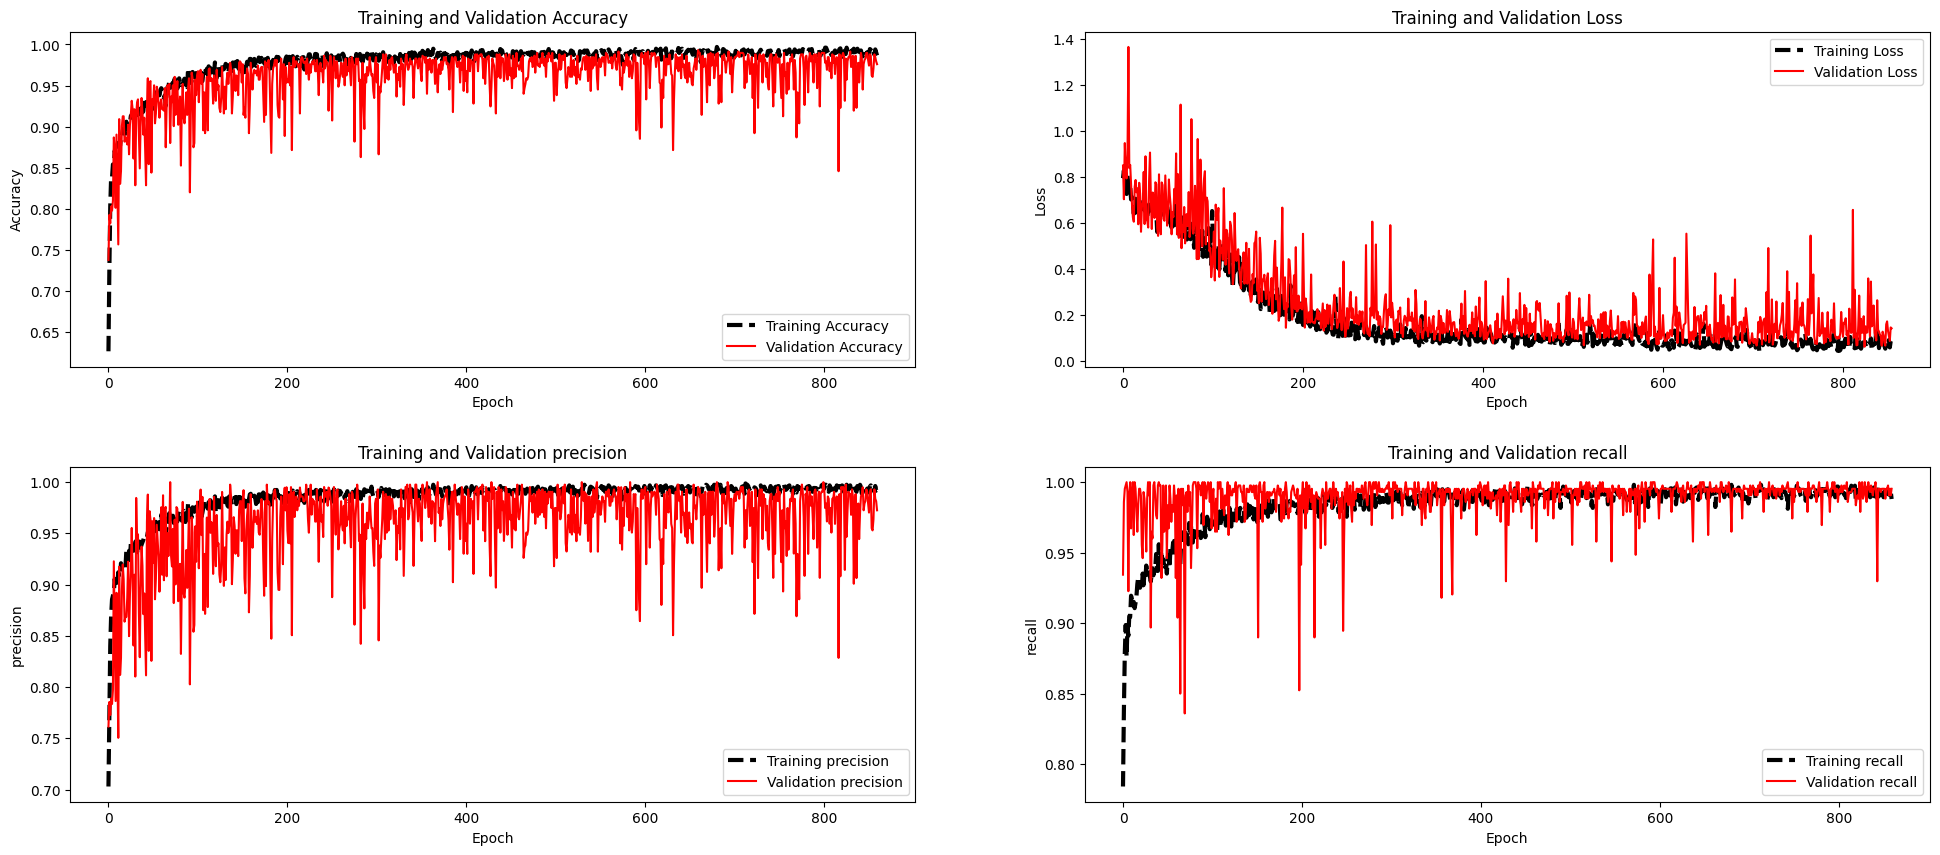

In [ ]:
plt.figure(figsize=(24, 10))

# Plot Training Accuracy 2
plt.subplot(2, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy' ,linestyle='--', color='black',linewidth=3)
plt.plot(history['val_accuracy'], label='Validation Accuracy',color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(2, 2, 2)
plt.plot(history['loss'][5:], label='Training Loss',linestyle='--', color='black',linewidth=3)
plt.plot(history['val_loss'][5:], label='Validation Loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(history['precision'], label='Training precision',linestyle='--', color='black',linewidth=3)
plt.plot(history['val_precision'], label='Validation precision',color='red')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.title('Training and Validation precision')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history['recall'], label='Training recall',linestyle='--', color='black',linewidth=3)
plt.plot(history['val_recall'], label='Validation recall',color='red')
plt.xlabel('Epoch')
plt.ylabel('recall')
plt.title('Training and Validation recall')
plt.legend()
plt.subplots_adjust(hspace=0.3)

plt.savefig('train.pdf')

plt.show()